# Import Packages and Data

In [55]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_log_error, mean_squared_error, mean_absolute_error
import warnings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

dtype_dict = {
    **{col: str for col in [
        "Year of Data", "Primary activity", "Primary sector", "Primary industry",
        "Account Numbers", "Countries", "Scope 3 Sources", 
         "Scope_3_emissions_type"
        "Third_Party_Verification", "incorporated_country"
    ]},
    **{col: float for col in [
        "Revenue_USD", 
        "Market_Cap_USD", "ebitda_USD",
        "grossProfit_USD", "netIncome_USD",
        "cashAndCashEquivalents_USD", "longTermInvestments_USD",
        "totalAssets_USD", "totalLiabilities_USD",
        "totalInvestments_USD", "totalDebt_USD",
        "totalEquity_USD", "Scope_3_emissions_amount",
        "shortTermInvestments_USD",
        "Quantile_Scope_3_emissions", "BoxCox_Scope_3_emissions", "Robust_Scope_3_emissions","country_ghg_avg","country_population_avg","country_gdp_avg"
    ]}
}



prepped_df = pd.read_csv(r"C:\Users\cliff\Downloads\Final_GHG_Data\Final_GHG_Data.csv", dtype=dtype_dict)

prepped_df = prepped_df.rename(columns={'Scope_3_emissions_amount': 'Scope 3 Amount'})
prepped_df = prepped_df.rename(columns={'incorporated_country': 'Countries'})
prepped_df = prepped_df.rename(columns={'account_name': 'Company Name'})
prepped_df = prepped_df.rename(columns={'Scope_3_emissions_type': 'Scope 3 Sources'})
prepped_df = prepped_df.rename(columns={'Year': 'Year of Data'})
prepped_df = prepped_df.rename(columns={'Third_party_verification': 'Third_Party_Verification'})

In [57]:
prepped_df.head()

Company Name  account_id  Year of Data       Countries Primary activity  \
0     3i Group          44          2018  United Kingdom   Asset managers   
1     3i Group          44          2018  United Kingdom   Asset managers   
2     3i Group          44          2018  United Kingdom   Asset managers   
3     3i Group          44          2018  United Kingdom   Asset managers   
4     3i Group          44          2018  United Kingdom   Asset managers   

       Primary sector  Market_Cap_USD  \
0  Financial services    9.548124e+09   
1  Financial services    9.548124e+09   
2  Financial services    9.548124e+09   
3  Financial services    9.548124e+09   
4  Financial services    9.548124e+09   

                                 Third_Party_Verification   Revenue_USD  \
0  Third-party verification or assurance process in place  1.728470e+09   
1  Third-party verification or assurance process in place  1.728470e+09   
2  Third-party verification or assurance process in place  1.728470e+09   
3  Third-party verification or assurance process in place  1.728470e+09   
4  Third-party verification or assurance process in place  1.728470e+09   

     ebitda_USD  grossProfit_USD  netIncome_USD  cashAndCashEquivalents_USD  \
0  1.565910e+09     1.728470e+09   1.577340e+09                1.248410e+09   
1  1.565910e+09     1.728470e+09   1.577340e+09                1.248410e+09   
2  1.565910e+09     1.728470e+09   1.577340e+09                1.248410e+09   
3  1.565910e+09     1.728470e+09   1.577340e+09                1.248410e+09   
4  1.565910e+09     1.728470e+09   1.577340e+09                1.248410e+09   

   shortTermInvestments_USD  longTermInvestments_USD  totalAssets_USD  \
0                       0.0             8.544560e+09     1.107567e+10   
1                       0.0             8.544560e+09     1.107567e+10   
2                       0.0             8.544560e+09     1.107567e+10   
3                       0.0             8.544560e+09     1.107567e+10   
4                       0.0             8.544560e+09     1.107567e+10   

   totalLiabilities_USD  totalInvestments_USD  totalDebt_USD  totalEquity_USD  \
0          1.031240e+09          8.544560e+09    730250000.0     1.004443e+10   
1          1.031240e+09          8.544560e+09    730250000.0     1.004443e+10   
2          1.031240e+09          8.544560e+09    730250000.0     1.004443e+10   
3          1.031240e+09          8.544560e+09    730250000.0     1.004443e+10   
4          1.031240e+09          8.544560e+09    730250000.0     1.004443e+10   

                                                     Scope 3 Sources  \
0                                       Purchased goods and services   
1  Fuel-and-energy-related activities (not included in Scope 1 or 2)   
2                                      Waste generated in operations   
3                                                    Business travel   
4                                                 Employee commuting   

   Scope 3 Amount  Quantile_Scope_3_emissions  BoxCox_Scope_3_emissions  \
0           17.62                   -2.078562                  2.947383   
1           61.42                   -1.767043                  4.280399   
2           57.21                   -1.781020                  4.203760   
3         2549.33                   -0.655642                  8.447919   
4            3.90                   -2.457261                  1.378441   

   Robust_Scope_3_emissions  country_ghg_avg  country_population_avg  \
0                 -0.119871       428.766726            6.734692e+07   
1                 -0.119592       428.766726            6.734692e+07   
2                 -0.119619       428.766726            6.734692e+07   
3                 -0.103714       428.766726            6.734692e+07   
4                 -0.119959       428.766726            6.734692e+07   

   country_gdp_avg  
0     3.038320e+12  
1     3.038320e+12  
2     3.038320e+12  
3     3.038320e+12  
4     3.038320e+12

In [59]:
Scope_3_df  = prepped_df.copy()

# Global Totals Visualization

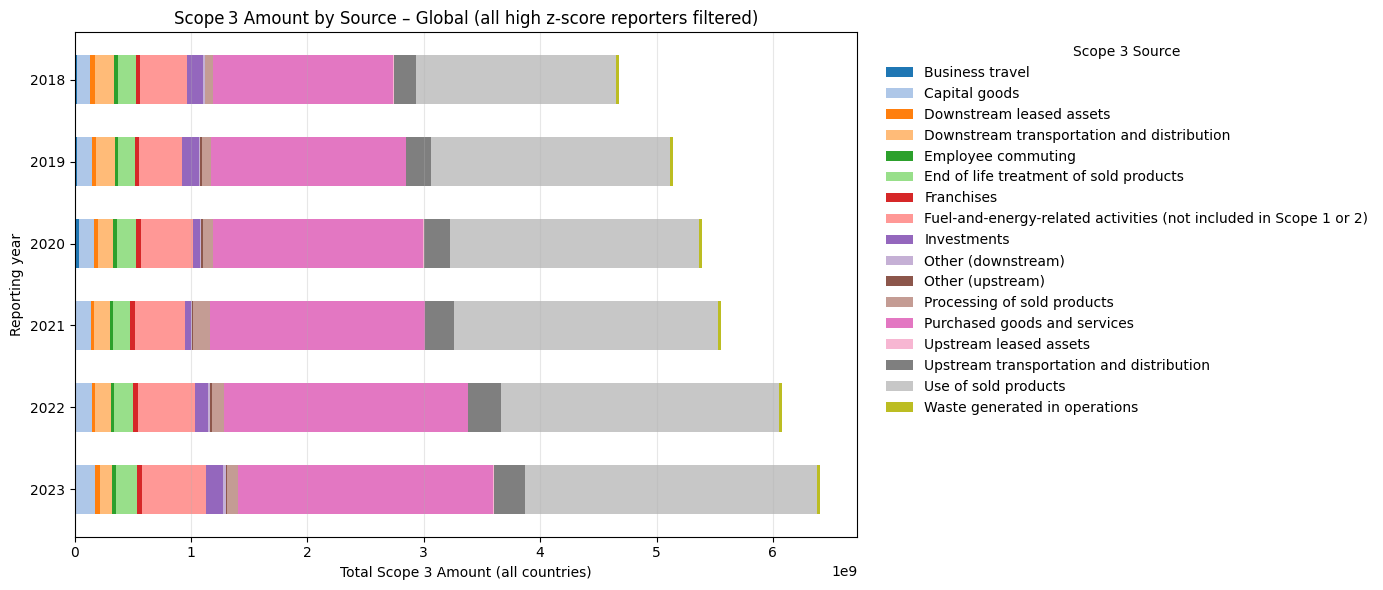

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------------------- CONFIG --------------------
DF_NAME   = "Scope_3_df"           # make sure this dataframe is loaded
YEAR_COL  = "Year of Data"
SOURCE_COL = "Scope 3 Sources"
VALUE_COL  = "Scope 3 Amount"

# -------------------- SAFETY --------------------
if DF_NAME not in globals():
    raise NameError(f"{DF_NAME} is not defined. Load it, then rerun.")
df = globals()[DF_NAME]

# -------------------- PREP THE DATA --------------------
df_agg = (
    df.groupby([YEAR_COL, SOURCE_COL])[VALUE_COL]
      .sum()
      .reset_index()
)

# pivot → one column per source, rows = years
pivot = df_agg.pivot(index=YEAR_COL, columns=SOURCE_COL, values=VALUE_COL).fillna(0)

# sort years chronologically (index may be strings)
pivot.index = pivot.index.astype(int)
pivot = pivot.sort_index()

# colours: use matplotlib default qualitative palette
source_names = pivot.columns.tolist()
colors = plt.cm.tab20.colors   # 20 distinct colours
color_cycle = [colors[i % len(colors)] for i in range(len(source_names))]
color_map   = dict(zip(source_names, color_cycle))

# -------------------- PLOT --------------------
fig, ax = plt.subplots(figsize=(14, 6))

bottom = np.zeros(len(pivot))
bar_height = 0.6

for src in source_names:
    values = pivot[src].values
    ax.barh(
        pivot.index.astype(str),  # y positions
        values,
        left=bottom,
        height=bar_height,
        color=color_map[src],
        label=src,
    )
    bottom += values   # stack

ax.set_xlabel("Total Scope 3 Amount (all countries)")
ax.set_ylabel("Reporting year")
ax.set_title("Scope 3 Amount by Source – Global (all high z-score reporters filtered)")
ax.invert_yaxis()  # most recent year on top
ax.grid(axis="x", alpha=0.3)

# Build a legend outside
ax.legend(
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    frameon=False,
    title="Scope 3 Source"
)

plt.tight_layout()
plt.show()


# Mixed‑Effects Modeling of Scope 3 Emissions by Source Category

This script builds a separate hierarchical regression for each Scope 3 source type to uncover the drivers of greenhouse‑gas emissions. After filtering out zero‐emission entries and applying a signed‐log transform to stabilize variance, it engineers log‑scaled financial and country‐level predictors. Each source group is then modeled with a linear mixed‑effects model that treats primary sector as the higher‑level grouping factor and company as a variance component. Multiple optimizers are tried to ensure convergence. For every source, the code extracts and ranks the most influential features by p‑value, computes key performance metrics (R², RMSLE, raw‐scale RMSE/MAE/MAPE), and stores financial‐feature statistics for later comparison. Visual KDEs and histograms on both log and original scales help diagnose fit, especially in the heavy right tail of high emitters.

Converged using optimizer: lbfgs for group Business travel
Variance across Primary_sector: 1.5162

Group: Business travel --- Top 10 Influential Factors
                               coef         pvalue
C(Year)[T.2022]           -1.343208  1.600688e-226
C(Year)[T.2021]           -1.134615  5.818576e-161
Company Var                2.222246   1.843903e-63
C(Year)[T.2023]           -0.479315   6.972104e-29
log_Market_Cap_USD         0.215432   1.733750e-18
C(Country)[T.China]       -1.763996   5.513042e-06
log_totalAssets_USD        0.117769   6.900037e-05
C(Country)[T.Brazil]      -1.479105   2.712765e-04
C(Country)[T.South Korea] -1.411628   3.383603e-04
C(Country)[T.Portugal]    -2.071938   6.660921e-04


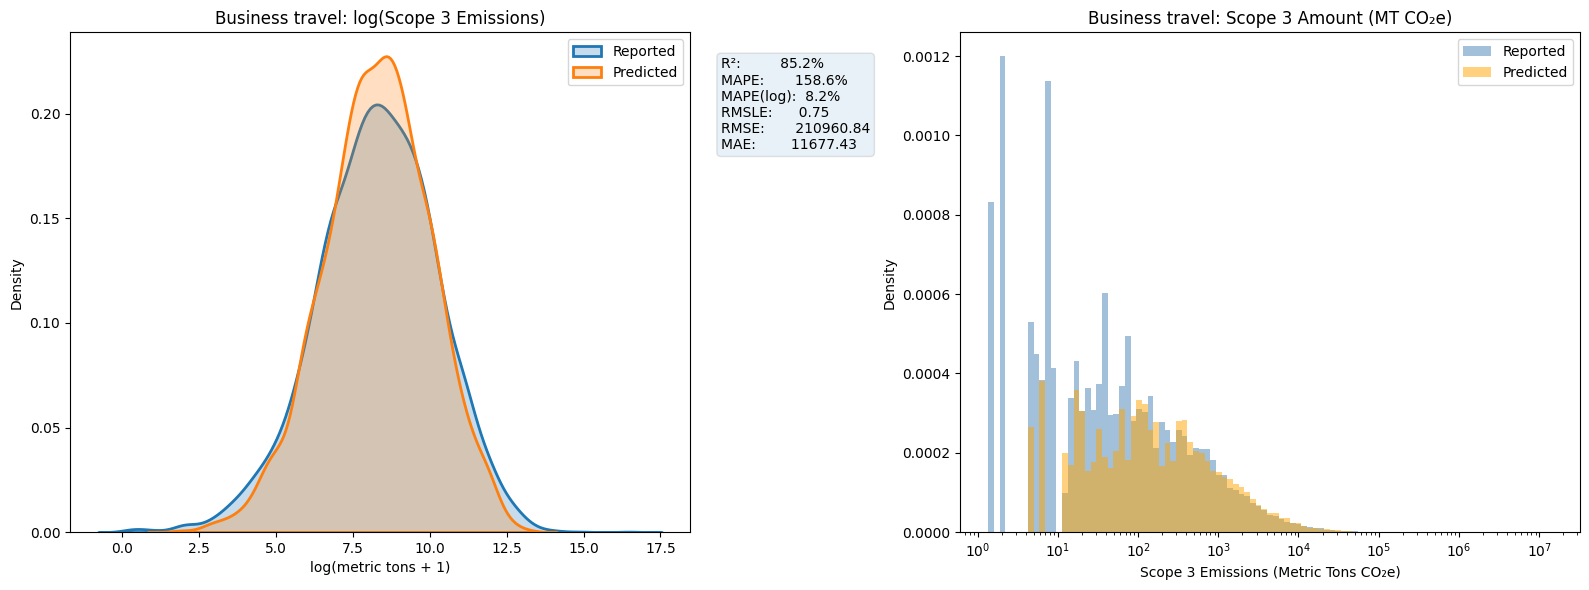

Converged using optimizer: lbfgs for group Capital goods
Variance across Primary_sector: 2.6382

Group: Capital goods --- Top 10 Influential Factors
                               coef        pvalue
Company Var                3.083384  7.777819e-43
C(Country)[T.South Korea] -4.165145  4.486482e-10
log_Revenue_USD            0.244671  7.212563e-08
log_totalLiabilities_USD   0.197495  3.957170e-04
C(Country)[T.Austria]      3.733910  1.030098e-03
C(Year)[T.2023]            0.179722  8.292393e-03
log_Market_Cap_USD         0.096846  8.573364e-03
log_ebitda_USD             0.011217  1.181757e-02
log_grossProfit_USD       -0.018001  1.226538e-02
C(Country)[T.Belgium]      2.266993  2.819466e-02


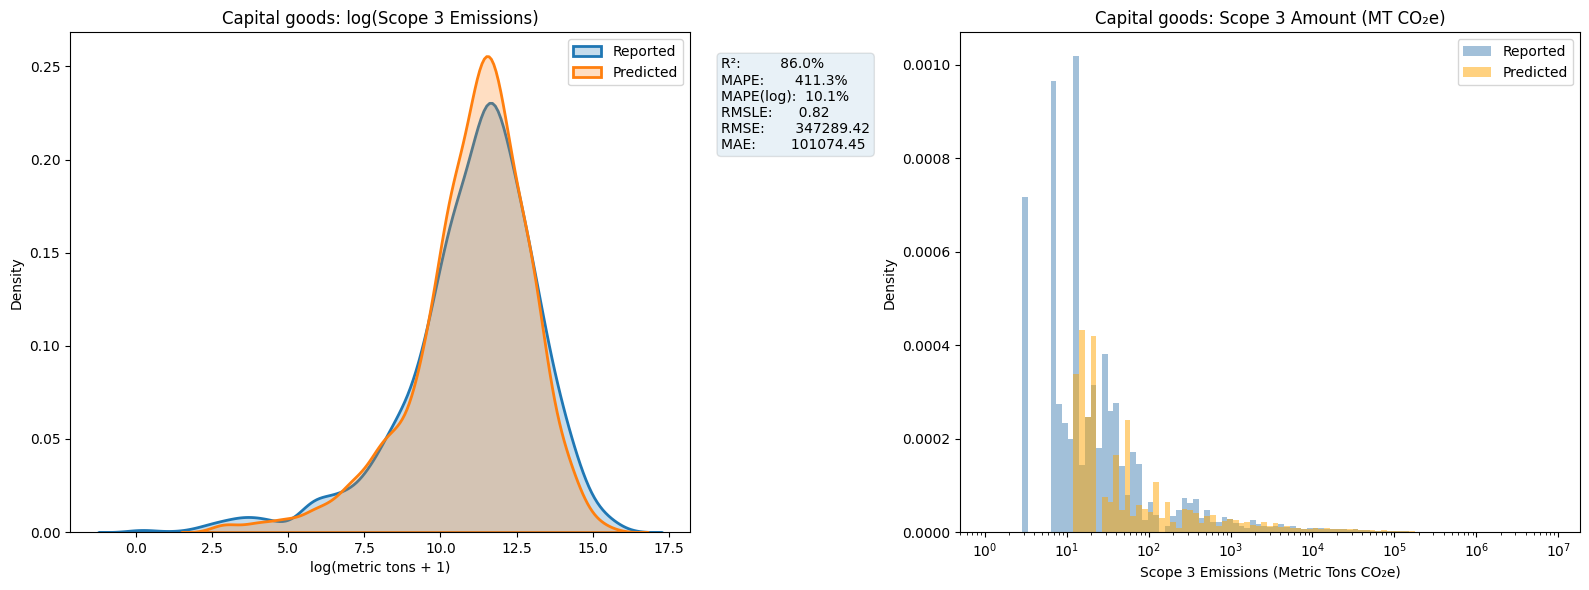

Converged using optimizer: lbfgs for group Downstream leased assets
Variance across Primary_sector: 6.4462

Group: Downstream leased assets --- Top 10 Influential Factors
                                  coef        pvalue
Company Var                  10.307804  3.096870e-21
log_totalAssets_USD           0.369272  1.577944e-02
C(Country)[T.Brazil]         -4.971037  3.003749e-02
C(Year)[T.2022]              -0.203651  4.411597e-02
C(Year)[T.2021]              -0.188029  6.566116e-02
log_grossProfit_USD           0.025257  9.727850e-02
C(Year)[T.2023]              -0.166224  1.131433e-01
C(Country)[T.Bermuda]        -4.584007  1.222834e-01
log_totalDebt_USD             0.052319  1.360666e-01
log_longTermInvestments_USD   0.008685  1.411656e-01


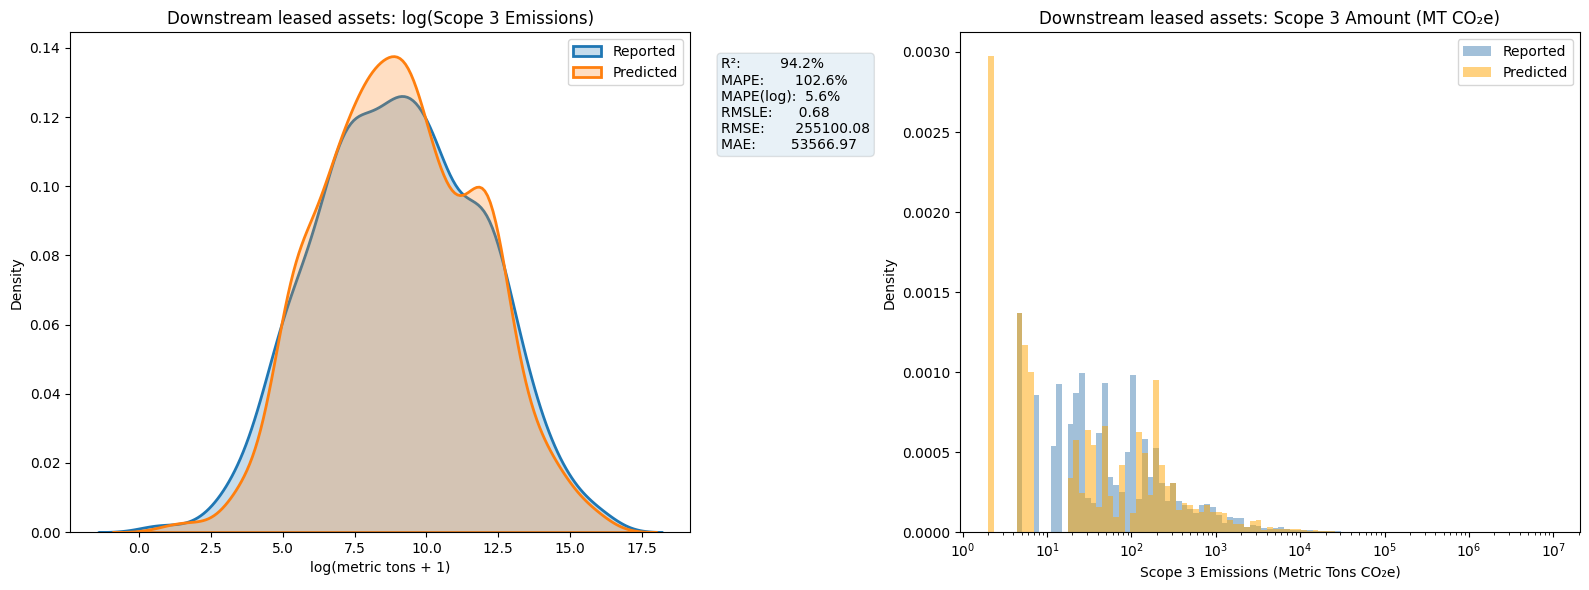

Converged using optimizer: lbfgs for group Downstream transportation and distribution
Variance across Primary_sector: 4.8271

Group: Downstream transportation and distribution --- Top 10 Influential Factors
                              coef        pvalue
Company Var               5.153638  7.011850e-36
C(Year)[T.2023]          -0.304931  3.908141e-04
C(Year)[T.2022]          -0.218871  7.855877e-03
C(Country)[T.Bermuda]    -6.331942  1.404248e-02
C(Year)[T.2021]          -0.199767  1.549188e-02
log_totalLiabilities_USD  0.164373  1.973366e-02
log_Market_Cap_USD        0.116911  2.085201e-02
C(Country)[T.Brazil]     -2.784590  2.461453e-02
C(Country)[T.Luxembourg]  4.684850  5.623081e-02
C(Country)[T.Greece]     -3.457931  6.275450e-02


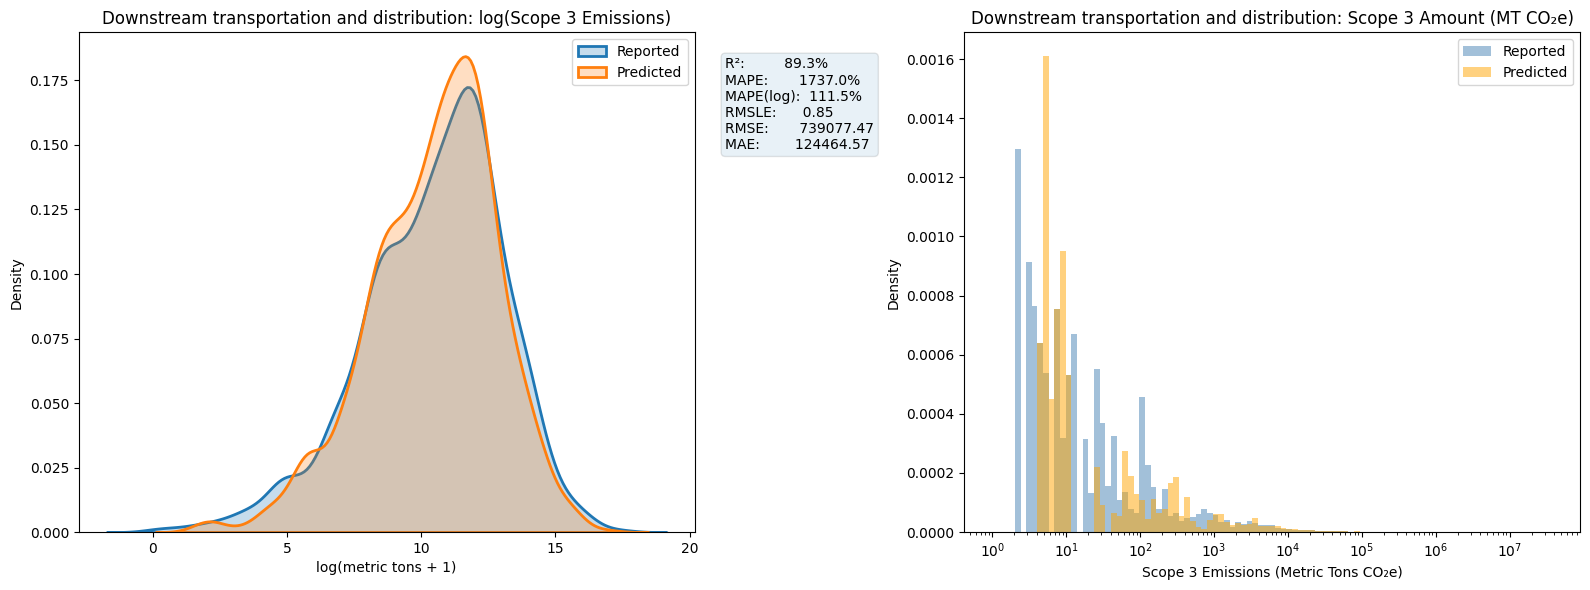

Converged using optimizer: lbfgs for group Employee commuting
Variance across Primary_sector: 2.4059

Group: Employee commuting --- Top 10 Influential Factors
                                    coef        pvalue
Company Var                     4.502053  1.081439e-60
log_totalLiabilities_USD        0.178458  4.913206e-07
C(Year)[T.2022]                -0.220328  6.320374e-07
log_Market_Cap_USD              0.116542  5.176154e-06
C(Year)[T.2021]                -0.201490  5.991776e-06
log_Revenue_USD                 0.043132  1.904485e-04
log_cashAndCashEquivalents_USD  0.054316  3.989641e-04
C(Country)[T.France]            1.260882  7.330699e-03
C(Country)[T.Turkey]           -4.401157  1.244742e-02
log_totalDebt_USD               0.029563  1.660292e-02


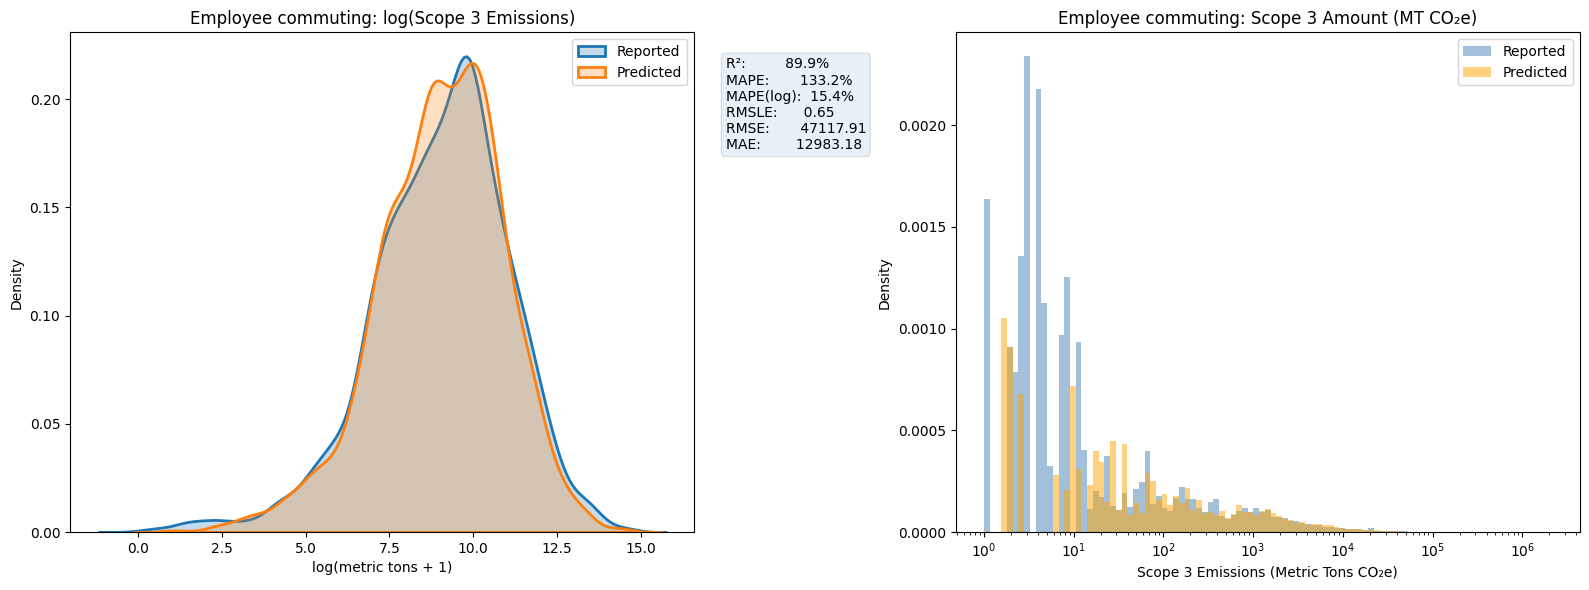

Converged using optimizer: lbfgs for group End of life treatment of sold products
Variance across Primary_sector: 6.4265

Group: End of life treatment of sold products --- Top 10 Influential Factors
                                 coef        pvalue
Company Var                  6.500819  2.481085e-35
log_Revenue_USD              1.443206  2.447648e-16
log_grossProfit_USD         -0.374421  1.409311e-03
C(Country)[T.Germany]        3.472857  9.779506e-03
C(Country)[T.Chile]          6.485729  2.323921e-02
C(Country)[T.Thailand]       4.210867  2.787007e-02
C(Country)[T.France]         2.688307  3.536396e-02
C(Country)[T.India]          3.984511  4.278583e-02
log_longTermInvestments_USD -0.008397  4.753290e-02
C(Country)[T.Israel]         5.751954  5.250856e-02


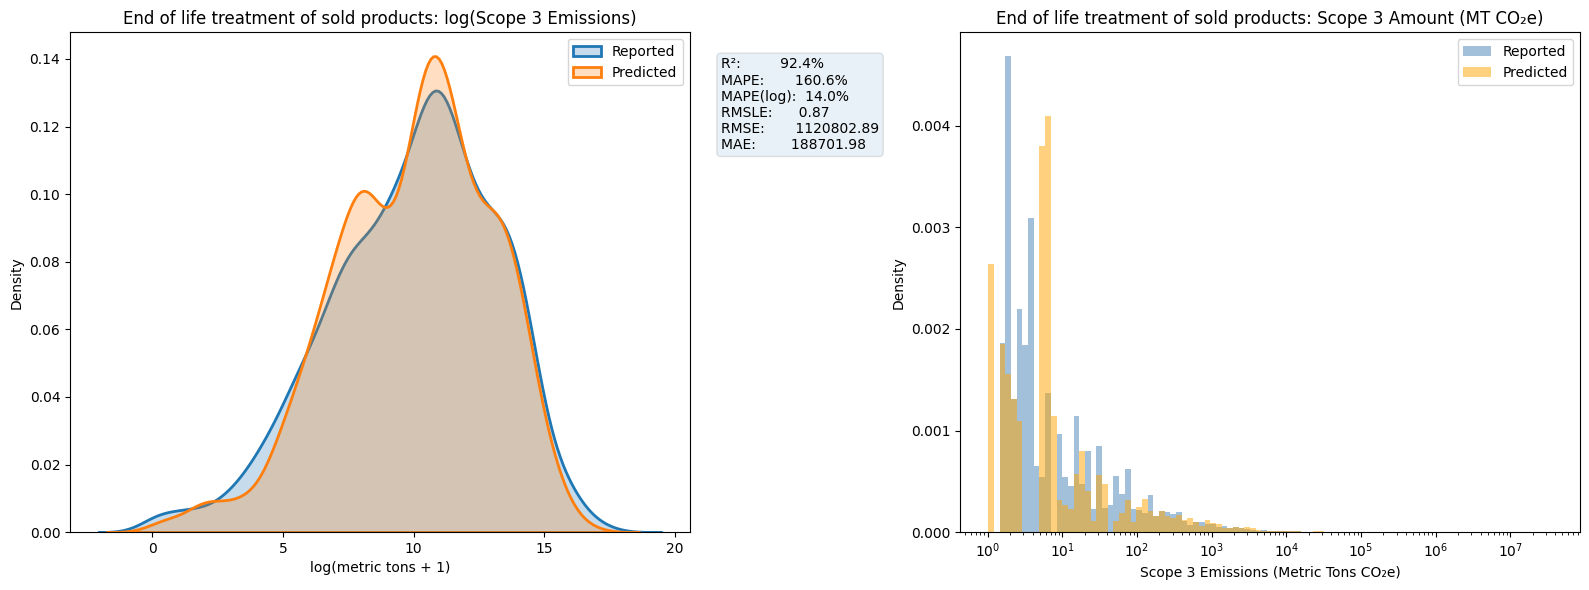

Converged using optimizer: lbfgs for group Franchises
Variance across Primary_sector: 4.8684

Group: Franchises --- Top 10 Influential Factors
                                    coef        pvalue
Company Var                     8.611453  1.185516e-07
log_totalEquity_USD            -0.034375  1.025403e-03
log_netIncome_USD               0.010786  4.539453e-02
log_cashAndCashEquivalents_USD  0.224431  7.283239e-02
C(Year)[T.2023]                -0.336933  7.367769e-02
C(Year)[T.2021]                -0.330275  7.819583e-02
C(Country)[T.South Africa]      4.053833  1.167894e-01
C(Country)[T.Norway]            5.095112  1.176425e-01
C(Country)[T.Denmark]           4.816145  1.337314e-01
C(Year)[T.2022]                -0.267313  1.377498e-01


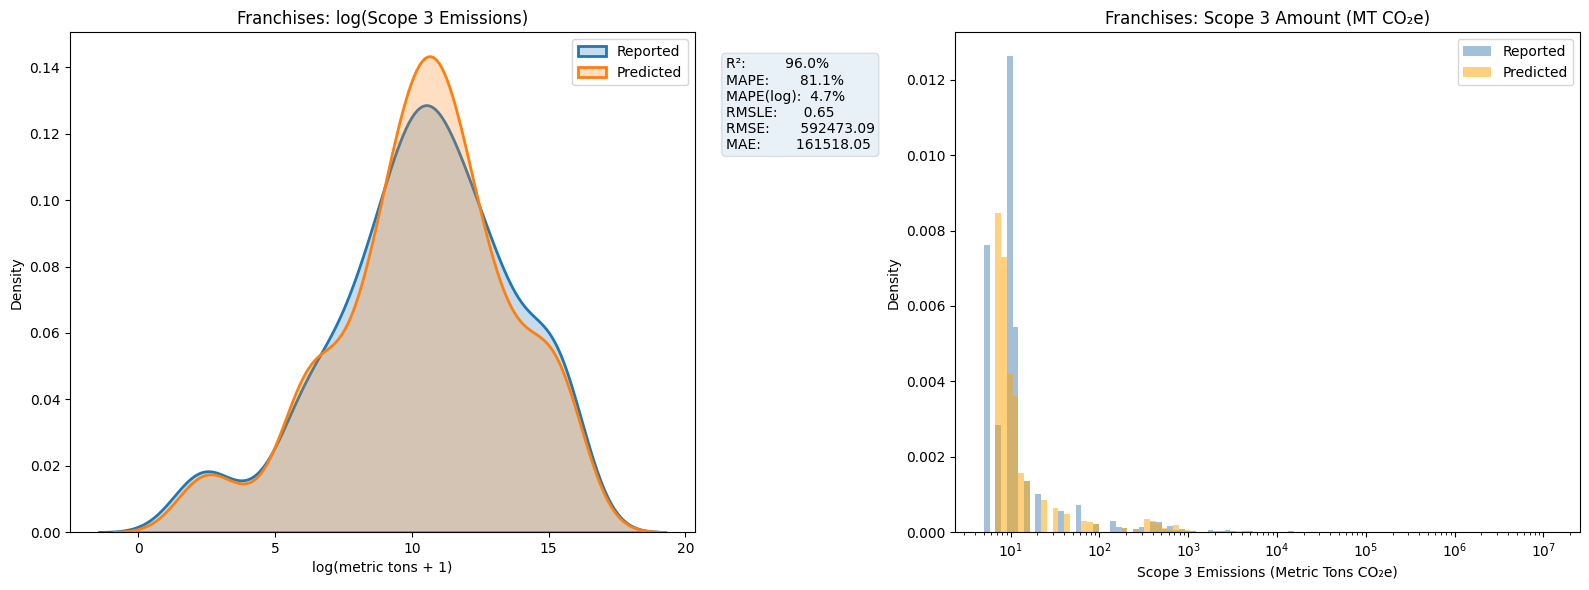

Converged using optimizer: lbfgs for group Fuel-and-energy-related activities (not included in Scope 1 or 2)
Variance across Primary_sector: 4.5544

Group: Fuel-and-energy-related activities (not included in Scope 1 or 2) --- Top 10 Influential Factors
                              coef        pvalue
Company Var               5.028640  1.243130e-64
C(Year)[T.2023]           0.246244  2.050679e-05
log_grossProfit_USD      -0.023902  7.669751e-05
log_Market_Cap_USD        0.127151  9.724544e-05
log_netIncome_USD        -0.005712  1.332243e-03
log_Revenue_USD           0.037510  1.559241e-03
C(Year)[T.2022]           0.175960  1.686611e-03
log_totalLiabilities_USD  0.081532  2.058709e-02
C(Country)[T.Bermuda]    -3.580085  2.656673e-02
log_ebitda_USD            0.006897  2.843359e-02


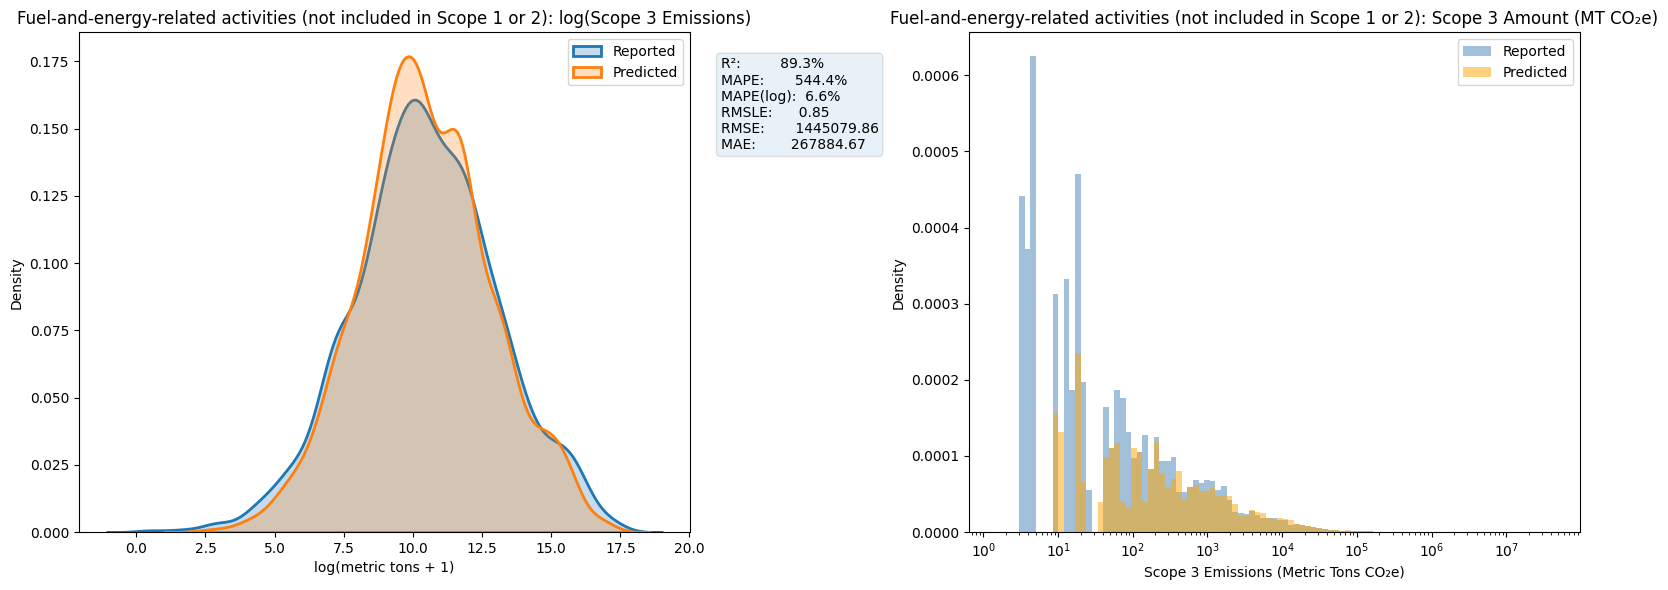

Converged using optimizer: lbfgs for group Investments
Variance across Primary_sector: 6.4528

Group: Investments --- Top 10 Influential Factors
                                    coef        pvalue
Company Var                     5.284538  3.867014e-17
C(Country)[T.Luxembourg]        6.747963  1.987177e-02
log_ebitda_USD                 -0.027463  4.003713e-02
log_cashAndCashEquivalents_USD  0.191473  5.315848e-02
C(Country)[T.China]             2.085610  5.642944e-02
C(Country)[T.South Africa]      2.305695  7.660335e-02
C(Country)[T.Thailand]          4.853643  7.720867e-02
C(Country)[T.Mexico]            3.081912  7.755481e-02
C(Country)[T.Italy]             2.251115  9.753252e-02
C(Country)[T.Canada]            2.112903  1.043117e-01


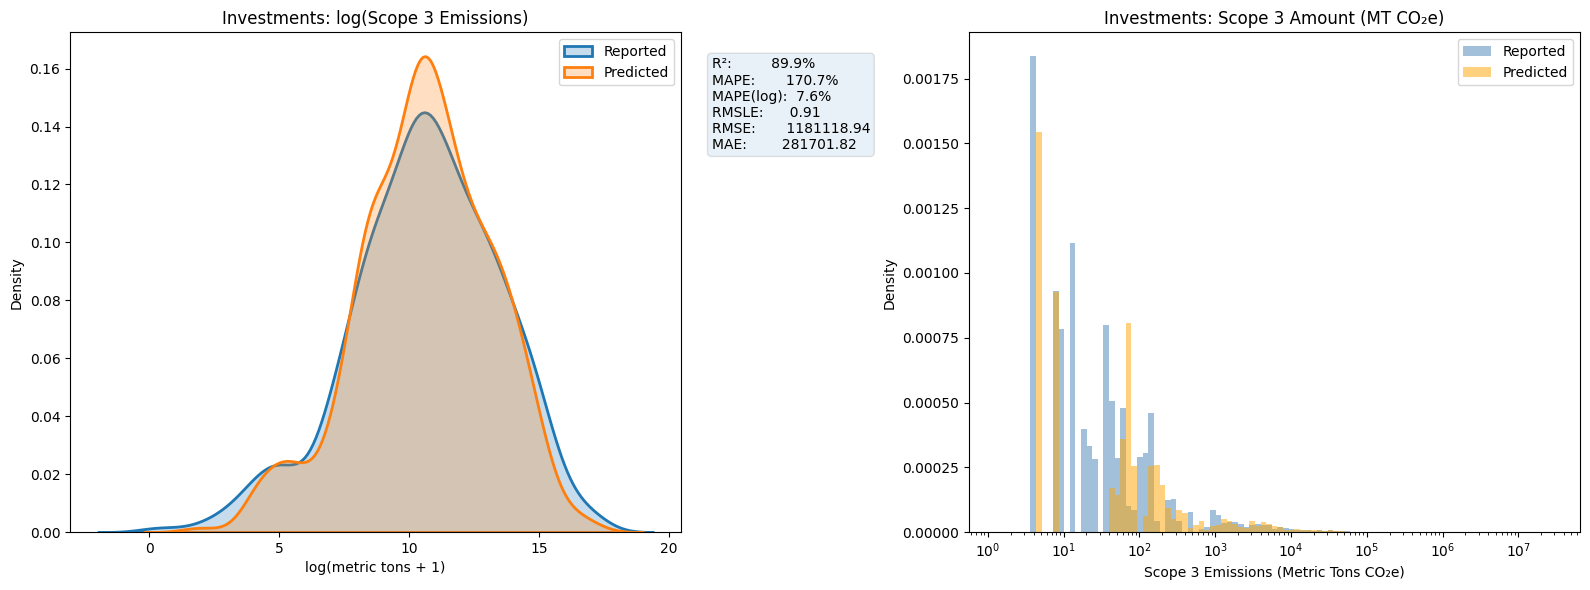

Converged using optimizer: lbfgs for group Other (downstream)
Variance across Primary_sector: 5.5452

Group: Other (downstream) --- Top 10 Influential Factors
                                coef    pvalue
Company Var                13.577138  0.000716
log_totalDebt_USD           1.103266  0.002591
C(Country)[T.Austria]       8.111844  0.008409
C(Country)[T.South Korea]   5.830553  0.019634
C(Country)[T.Sweden]        6.969346  0.026922
C(Year)[T.2021]            -0.606762  0.045558
C(Country)[T.France]        3.843332  0.047701
C(Country)[T.Portugal]      5.882438  0.058130
C(Country)[T.Finland]       5.656035  0.060630
C(Year)[T.2023]            -0.574245  0.063043


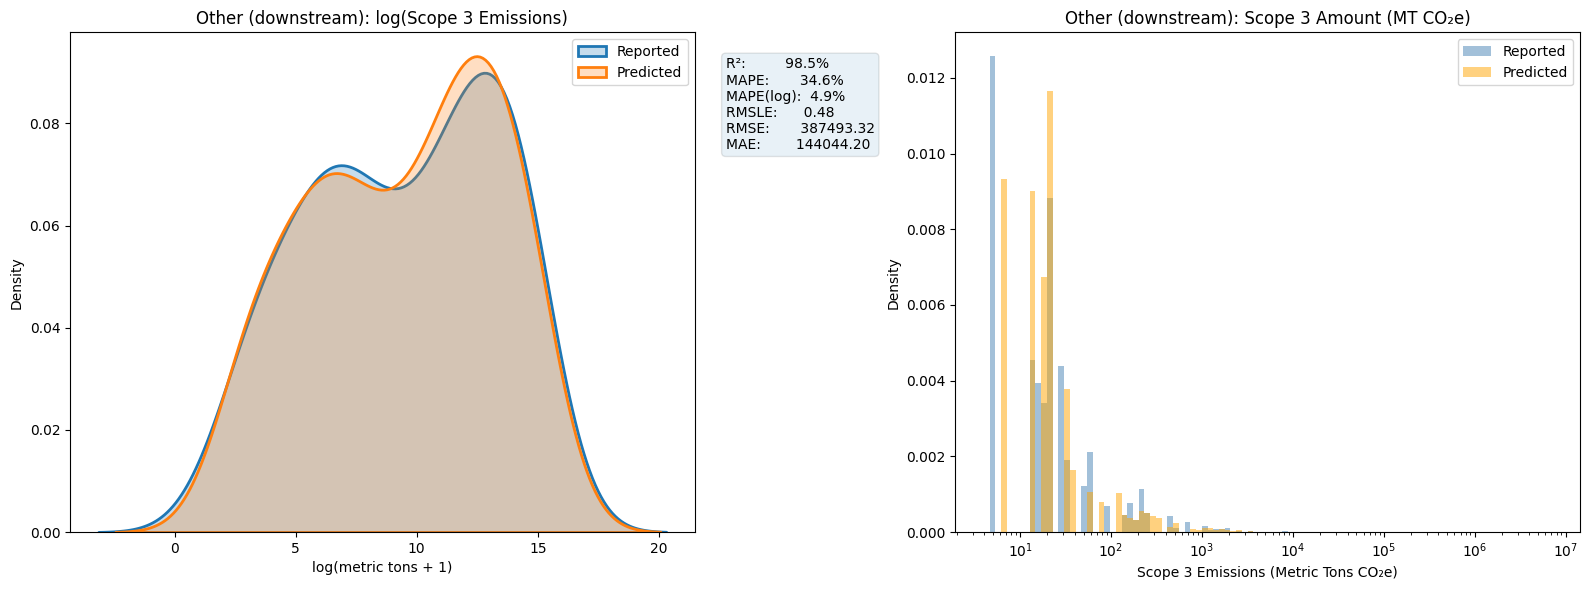

Converged using optimizer: lbfgs for group Other (upstream)
Variance across Primary_sector: 6.2705

Group: Other (upstream) --- Top 10 Influential Factors
                                     coef    pvalue
Company Var                     23.428428  0.000007
C(Year)[T.2023]                 -0.653980  0.000704
C(Year)[T.2022]                 -0.447193  0.007794
C(Year)[T.2021]                 -0.387661  0.011754
log_cashAndCashEquivalents_USD   0.340684  0.019650
C(Year)[T.2020]                 -0.279169  0.076927
C(Country)[T.Netherlands]        3.600800  0.084925
C(Country)[T.Germany]            3.002018  0.096341
C(Country)[T.South Africa]       2.443867  0.101649
C(Country)[T.Spain]             -2.629392  0.109488


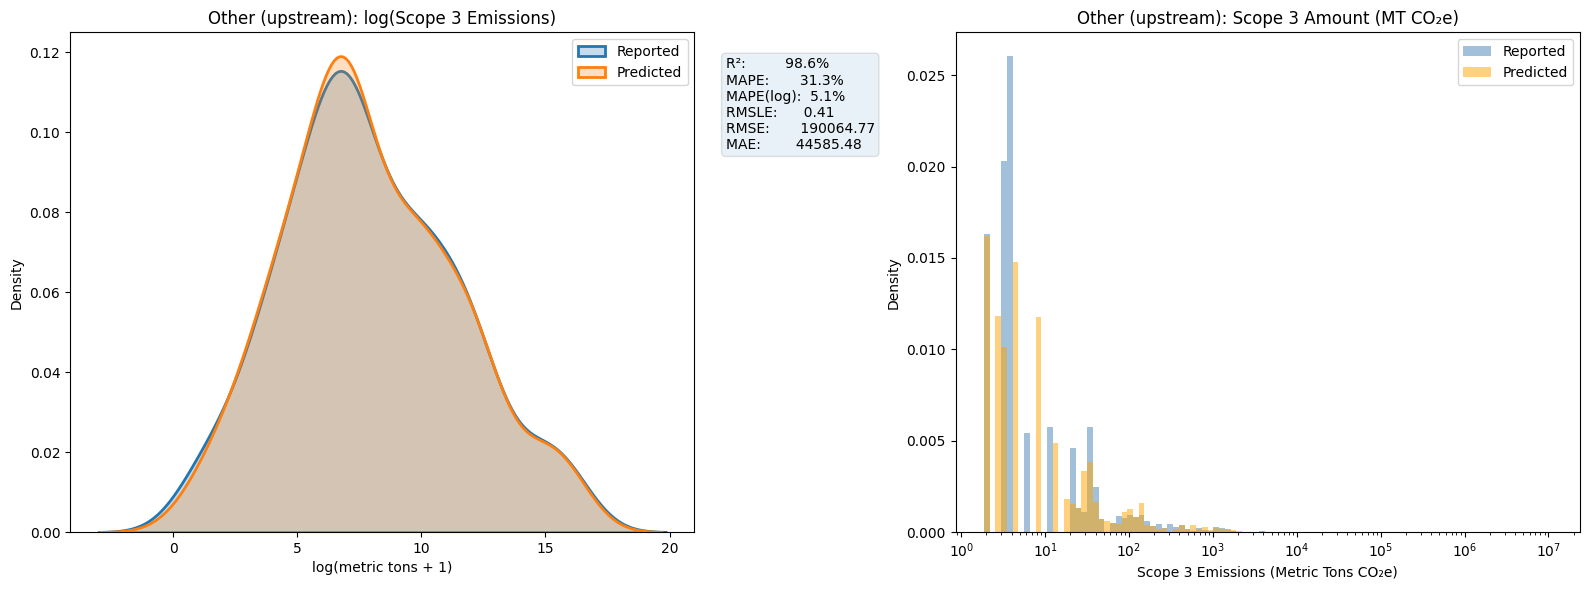

Converged using optimizer: lbfgs for group Processing of sold products
Variance across Primary_sector: 7.4083

Group: Processing of sold products --- Top 10 Influential Factors
                            coef        pvalue
Company Var            10.690554  2.514047e-12
log_netIncome_USD      -0.010465  1.635688e-02
C(Country)[T.Denmark]  -5.921946  8.017776e-02
C(Year)[T.2020]         0.248570  9.854023e-02
log_totalAssets_USD     0.951487  1.007597e-01
C(Year)[T.2021]         0.207020  1.537792e-01
C(Country)[T.Belgium]   3.797706  1.744247e-01
log_Market_Cap_USD     -0.143062  1.855455e-01
C(Country)[T.France]   -2.869103  2.024012e-01
C(Country)[T.Spain]    -4.289031  2.122096e-01


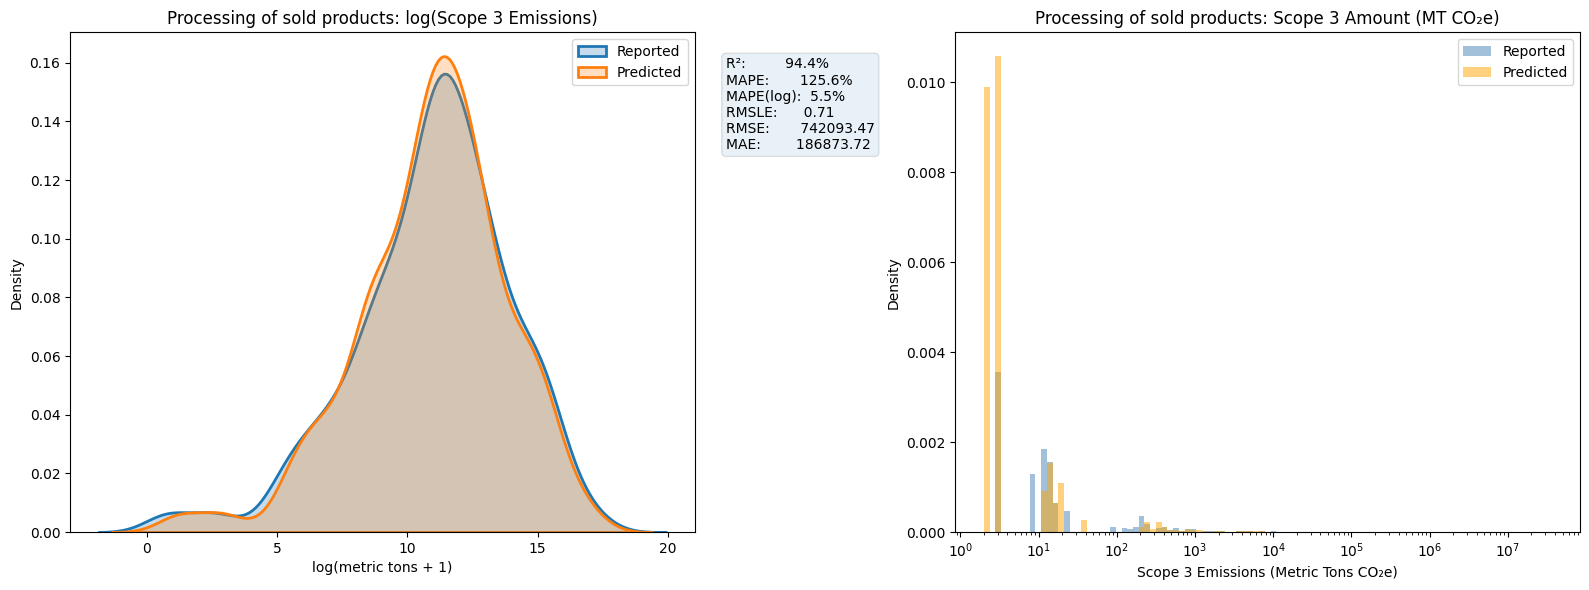

Converged using optimizer: lbfgs for group Purchased goods and services
Variance across Primary_sector: 6.7420

Group: Purchased goods and services --- Top 10 Influential Factors
                                coef        pvalue
Company Var                 6.342587  4.654249e-70
C(Year)[T.2023]             0.558688  1.105701e-20
C(Year)[T.2022]             0.421077  4.499695e-13
log_Revenue_USD             0.063060  1.004745e-04
C(Country)[T.South Africa] -2.715642  3.691257e-04
C(Country)[T.Brazil]       -2.683651  2.110978e-03
C(Country)[T.USA]           1.848819  4.020973e-03
C(Country)[T.Japan]         1.769589  6.151986e-03
C(Year)[T.2021]             0.157947  6.951581e-03
C(Country)[T.Bermuda]      -4.987905  1.147372e-02


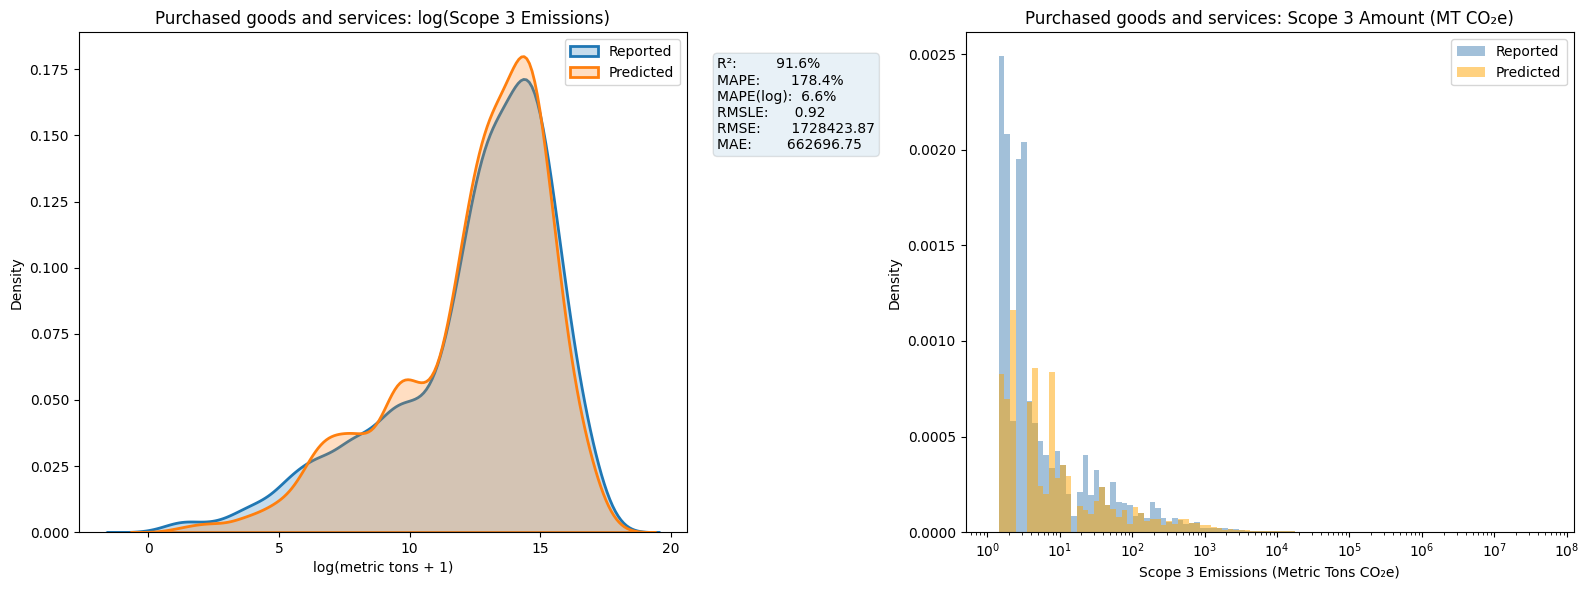

Converged using optimizer: lbfgs for group Upstream leased assets
Variance across Primary_sector: 3.7497

Group: Upstream leased assets --- Top 10 Influential Factors
                           coef        pvalue
Company Var            4.807554  7.468823e-21
log_Revenue_USD        0.676214  2.046561e-08
C(Year)[T.2022]       -0.461181  4.892915e-05
C(Country)[T.Japan]   -2.341022  9.212848e-04
C(Country)[T.Finland] -4.418034  1.527958e-03
C(Country)[T.China]   -2.593908  4.328947e-03
C(Year)[T.2023]       -0.326242  4.681534e-03
C(Country)[T.USA]     -1.940441  5.139059e-03
C(Country)[T.Canada]  -2.319337  5.576363e-03
C(Country)[T.Brazil]  -3.127914  1.070695e-02


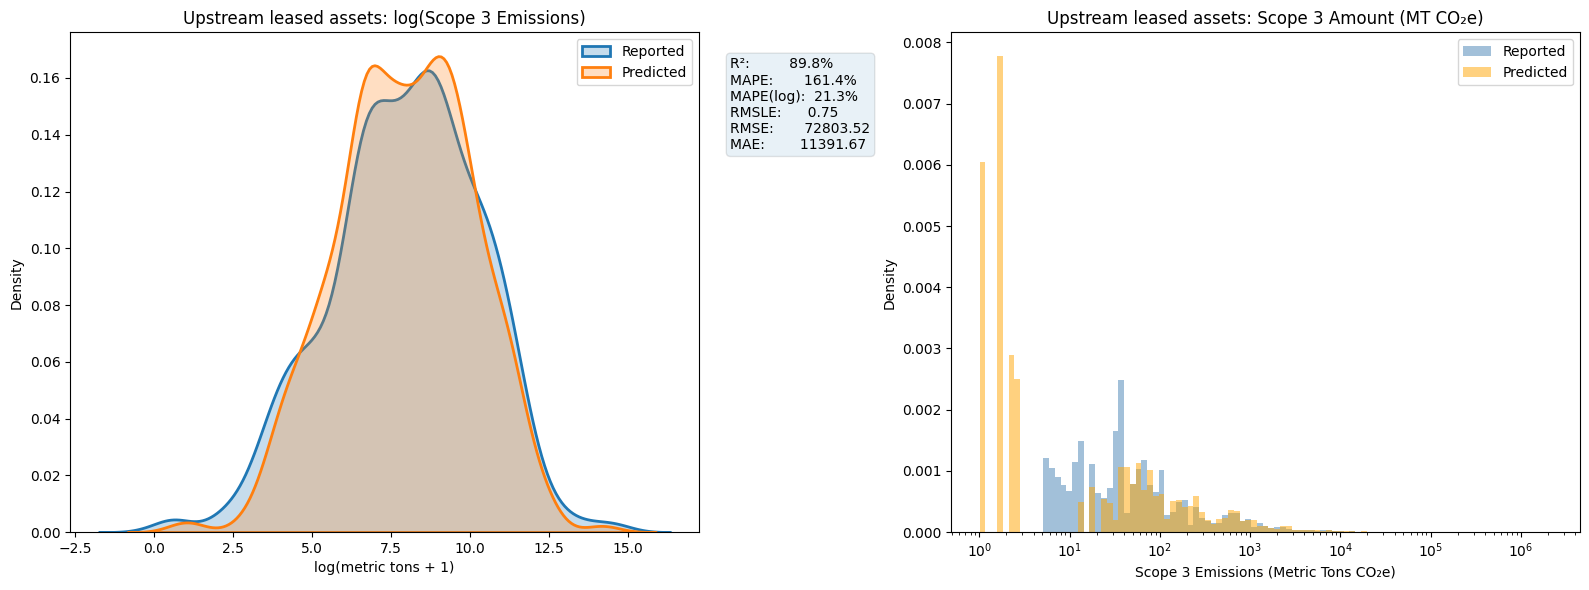

Converged using optimizer: lbfgs for group Upstream transportation and distribution
Variance across Primary_sector: 4.8722

Group: Upstream transportation and distribution --- Top 10 Influential Factors
                             coef        pvalue
Company Var              6.131317  1.518627e-55
C(Year)[T.2023]          0.462407  2.091405e-14
C(Year)[T.2022]          0.293306  6.187662e-07
log_Revenue_USD          0.092692  1.402181e-05
C(Country)[T.Singapore] -4.485689  2.983487e-03
log_totalDebt_USD        0.039699  1.810324e-02
log_Market_Cap_USD       0.084116  2.020789e-02
C(Country)[T.Bermuda]   -5.318384  2.431715e-02
C(Country)[T.Canada]    -1.857832  2.481403e-02
C(Country)[T.Peru]      -5.217798  2.586136e-02


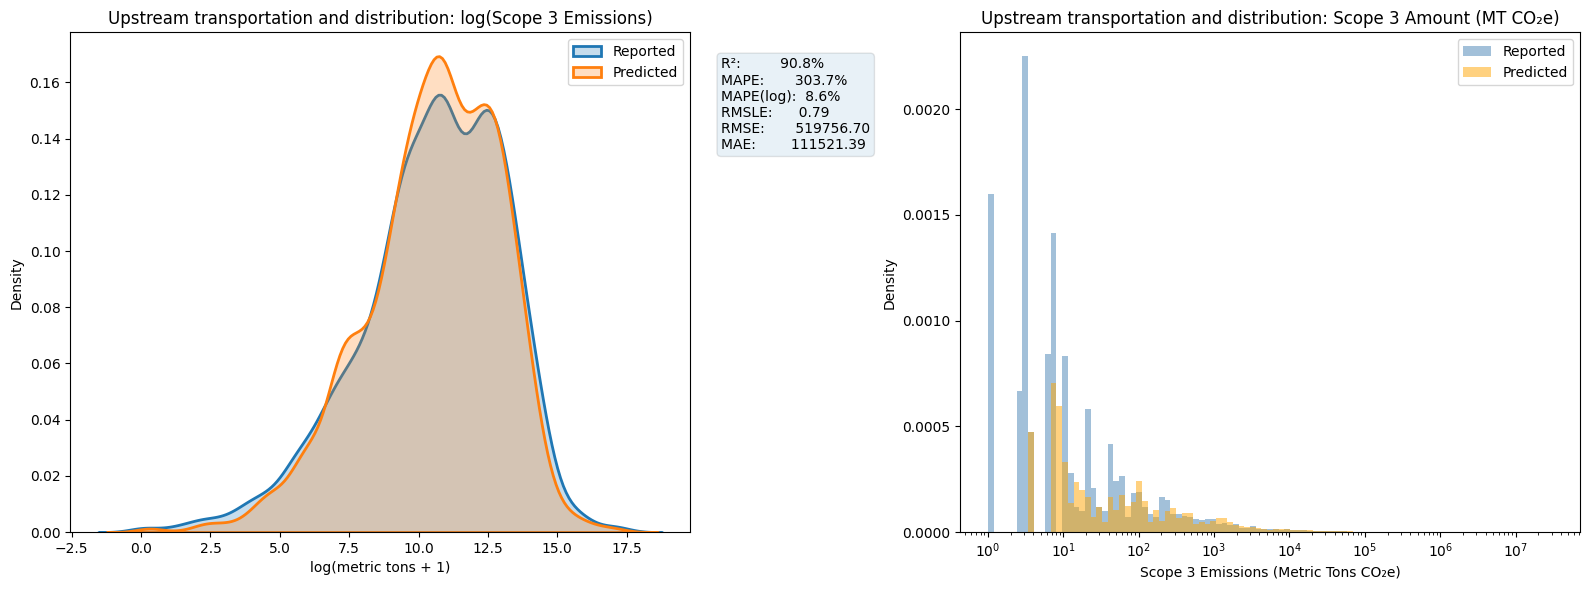

Converged using optimizer: lbfgs for group Use of sold products
Variance across Primary_sector: 7.5985

Group: Use of sold products --- Top 10 Influential Factors
                                     coef        pvalue
Company Var                     12.308696  3.076632e-39
C(Country)[T.South Korea]       -2.299618  5.658774e-02
C(Country)[T.Hungary]           -4.981351  9.156655e-02
C(Country)[T.Spain]             -2.034181  1.035776e-01
C(Country)[T.United Kingdom]    -1.705505  1.117133e-01
C(Country)[T.Netherlands]       -2.287936  1.306326e-01
log_cashAndCashEquivalents_USD   0.071858  1.420878e-01
C(Country)[T.Finland]           -1.851787  1.564472e-01
log_totalAssets_USD              0.221634  1.652251e-01
C(Country)[T.Switzerland]       -1.768448  1.760915e-01


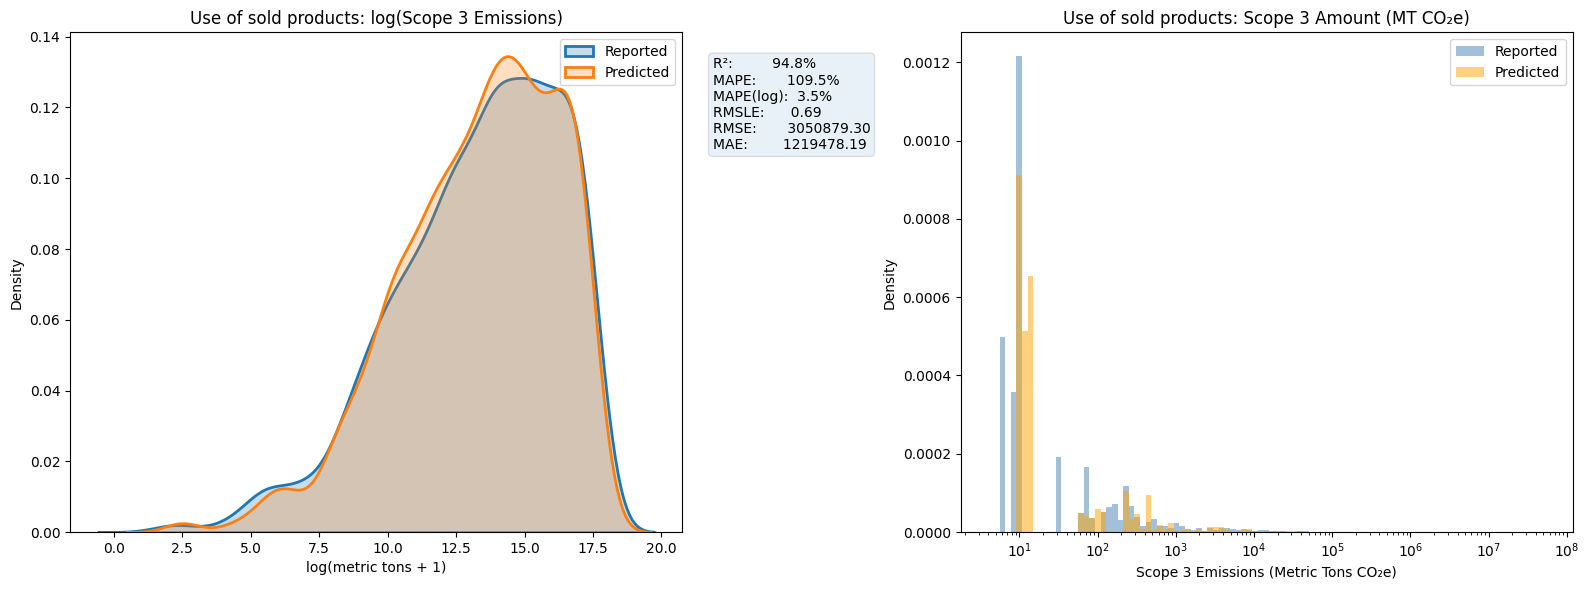

Converged using optimizer: lbfgs for group Waste generated in operations
Variance across Primary_sector: 4.4218

Group: Waste generated in operations --- Top 10 Influential Factors
                                  coef        pvalue
Company Var                   5.569820  1.928721e-66
log_Revenue_USD               0.040618  3.407561e-04
log_Market_Cap_USD            0.110401  3.871142e-04
C(Country)[T.Bermuda]        -4.900255  2.096856e-03
C(Country)[T.Norway]         -2.135598  2.584951e-03
C(Year)[T.2023]               0.148647  5.689582e-03
log_grossProfit_USD          -0.016266  8.461423e-03
C(Country)[T.India]          -1.878834  2.018936e-02
log_totalDebt_USD             0.033719  2.899388e-02
C(Country)[T.United Kingdom] -1.130016  3.315041e-02


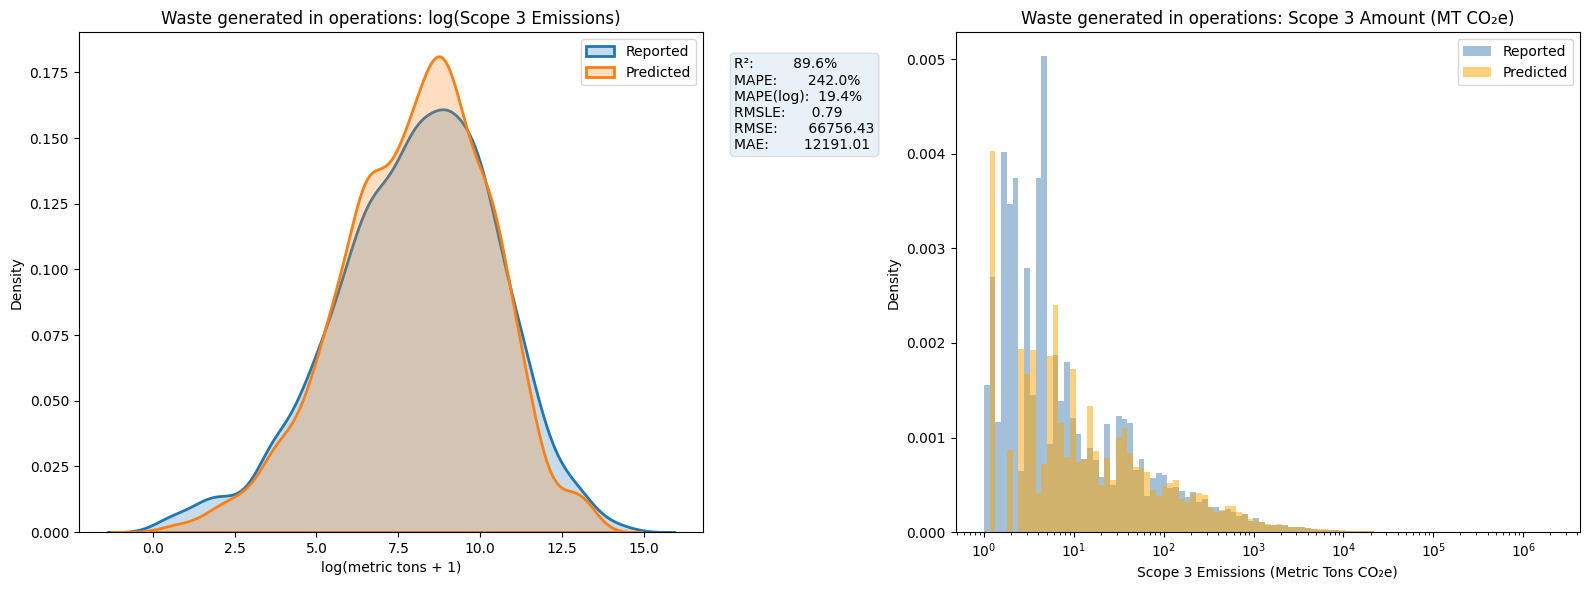


Summary of Model Performance Metrics by Scope-3 Source:



R²(log)%  \
financial_feature_stats                                                 NaN   
Business travel                                                        85.2   
Capital goods                                                          86.0   
Downstream leased assets                                               94.2   
Downstream transportation and distribution                             89.3   
Employee commuting                                                     89.9   
End of life treatment of sold products                                 92.4   
Franchises                                                             96.0   
Fuel-and-energy-related activities (not included in Scope 1 or 2)      89.3   
Investments                                                            89.9   
Other (downstream)                                                     98.5   
Other (upstream)                                                       98.6   
Processing of sold products                                            94.4   
Purchased goods and services                                           91.6   
Upstream leased assets                                                 89.8   
Upstream transportation and distribution                               90.8   
Use of sold products                                                   94.8   
Waste generated in operations                                          89.6   

                                                                   MAPE_orig%  \
financial_feature_stats                                                   NaN   
Business travel                                                         158.6   
Capital goods                                                           411.3   
Downstream leased assets                                                102.6   
Downstream transportation and distribution                             1737.0   
Employee commuting                                                      133.2   
End of life treatment of sold products                                  160.6   
Franchises                                                               81.1   
Fuel-and-energy-related activities (not included in Scope 1 or 2)       544.4   
Investments                                                             170.7   
Other (downstream)                                                       34.6   
Other (upstream)                                                         31.3   
Processing of sold products                                             125.6   
Purchased goods and services                                            178.4   
Upstream leased assets                                                  161.4   
Upstream transportation and distribution                                303.7   
Use of sold products                                                    109.5   
Waste generated in operations                                           242.0   

                                                                   MAPE_log%  \
financial_feature_stats                                                  NaN   
Business travel                                                          8.2   
Capital goods                                                           10.1   
Downstream leased assets                                                 5.6   
Downstream transportation and distribution                             111.5   
Employee commuting                                                      15.4   
End of life treatment of sold products                                  14.0   
Franchises                                                               4.7   
Fuel-and-energy-related activities (not included in Scope 1 or 2)        6.6   
Investments                                                              7.6   
Other (downstream)                                                       4.9   
Other (upstream)                                                 

In [21]:
#Code Reference: https://www.pythonfordatascience.org/mixed-effects-regression-python/

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Remove zero values BEFORE log transformation and create a log target column.
prepped_df = prepped_df[prepped_df["Scope 3 Amount"] > 0].copy()
prepped_df["log_Scope_3_Amount"] = np.log1p(prepped_df["Scope 3 Amount"])

# Then group by "Scope 3 Sources" to create the dictionary of dataframes.
grouped_dfs = {
    group_name: group_df.copy()
    for group_name, group_df in prepped_df.groupby('Scope 3 Sources')
}

# Define the list of continuous variables.
numeric_cols = ['Scope 3 Amount', 'Revenue_USD', 'Market_Cap_USD', 
                'ebitda_USD', 'grossProfit_USD', 'netIncome_USD', 'cashAndCashEquivalents_USD', 
                'longTermInvestments_USD', 'totalAssets_USD', 'totalLiabilities_USD', 
                'totalInvestments_USD', 'totalDebt_USD', 'totalEquity_USD', 'country_ghg_avg', 'country_population_avg']

# Signed log transformation function.
def signed_log(x):
    return np.sign(x) * np.log(np.abs(x) + 1)

# Dictionary to collect metrics for each group.
metrics_results = {}

feature_pvals = {}
feature_coefs = {}

# Only the “financial” predictors from numeric_cols (exclude Scope 3 Amount and country averages)
fin_cols = [col for col in numeric_cols 
            if col not in ('Scope 3 Amount', 'country_ghg_avg', 'country_population_avg')]

# Build the list of model feature names
all_feats = [f'log_{col.replace(" ", "_").replace("/", "_")}' for col in fin_cols]


# Loop over each group in the dictionary.
for group_name, df in grouped_dfs.items():
    for col in numeric_cols:
        new_col = f'log_{col.replace(" ", "_").replace("/", "_")}'
        df[new_col] = df[col].apply(signed_log)

    df['Year'] = df['Year of Data'].astype(str)
    df['Scope3_Source'] = df['Scope 3 Sources'].astype(str)
    df['Country'] = df['Countries'].astype(str)
    df['Company'] = df['Company Name'].astype(str)
    
    df['ThirdParty_Verification'] = df['Third_Party_Verification'].astype(str)
    df['Primary_activity'] = df['Primary activity'].astype(str)
    df['Primary_sector'] = df['Primary sector'].astype(str)

        # Drop rows with NA after transformations
    df = df.dropna(subset=[  # Include all needed predictors here
        'log_Revenue_USD', 'log_Market_Cap_USD', 'log_ebitda_USD', 
        'log_grossProfit_USD', 'log_netIncome_USD', 'log_cashAndCashEquivalents_USD',
        'log_longTermInvestments_USD', 'log_totalAssets_USD', 'log_totalLiabilities_USD',
        'log_totalInvestments_USD', 'log_totalDebt_USD', 'log_totalEquity_USD',
        'log_Scope_3_Amount'
    ]).copy()


    formula = (
        "log_Scope_3_Amount ~ log_Revenue_USD + "
        "log_Market_Cap_USD + log_ebitda_USD + log_grossProfit_USD + log_netIncome_USD + "
        "log_cashAndCashEquivalents_USD + log_longTermInvestments_USD + log_totalAssets_USD + "
        "log_totalLiabilities_USD + log_totalInvestments_USD + log_totalDebt_USD + log_totalEquity_USD + "
        "C(Year) + C(Country)"  
    )

    model = smf.mixedlm(formula, df, groups=df["Primary_sector"],
                        vc_formula={"Company": "0 + C(Company)"})

    
    result = None



    # Try multiple optimizers
    optimizers = ['lbfgs', 'cg', 'bfgs', 'nm']
    for opt in optimizers:
        try:
            with warnings.catch_warnings():
                warnings.filterwarnings("ignore")
                result = model.fit(method=opt, reml=False)
            if result.converged:
                print(f"Converged using optimizer: {opt} for group {group_name}")
                break
        except Exception as e:
            print(f"Failed with optimizer {opt} for group {group_name}: {e}")

    if result is None or not result.converged:
        print(f"Model did not converge for group {group_name}.")
        continue
    # Store p-values and coefficients
    coef_df = pd.DataFrame({
        'coef': result.params,
        'pvalue': result.pvalues
    })

        # Extract p-values and coefficients for each feature
    pvals = {feat: result.pvalues.get(feat, np.nan) for feat in all_feats}
    coefs = {feat: result.params.get(feat, np.nan)  for feat in all_feats}
    
    feature_pvals[group_name] = pvals
    feature_coefs[group_name] = coefs
    # Remove intercept for ranking
    if "Intercept" in coef_df.index:
        coef_df = coef_df.drop(index="Intercept")

    # Collect only financial feature results
    financial_vars = [f'log_{col.replace(" ", "_").replace("/", "_")}' for col in numeric_cols if 'Scope' not in col]
    financial_pvals = coef_df.loc[coef_df.index.isin(financial_vars)][['coef', 'pvalue']]

    # Store in dictionary
    if 'financial_feature_stats' not in metrics_results:
        metrics_results['financial_feature_stats'] = {}

    for var in financial_pvals.index:
        if var not in metrics_results['financial_feature_stats']:
            metrics_results['financial_feature_stats'][var] = []
        metrics_results['financial_feature_stats'][var].append({
            'group': group_name,
            'coef': financial_pvals.loc[var, 'coef'],
            'pvalue': financial_pvals.loc[var, 'pvalue']
        })

    # Print the top 10 most influential overall (based on p-value)
    coef_df = coef_df.sort_values(by='pvalue')
    top10 = coef_df.head(10)


    try:
        group_var = result.vcomp[0]  # Primary_sector
        company_var = result.vcomp[1] if len(result.vcomp) > 1 else np.nan
        residual_var = result.vcomp[-1]
        print(f"Variance across Primary_sector: {group_var:.4f}")

    except Exception as e:
        print(f"Could not extract variance components for group {group_name}: {e}")

    print(f"\nGroup: {group_name} --- Top 10 Influential Factors")
    print(top10)

    df['Predicted_log_Scope_3'] = result.fittedvalues
    df['Reported_log_Scope_3'] = df["log_Scope_3_Amount"]
    df['Predicted_Scope_3'] = np.expm1(df['Predicted_log_Scope_3'])
    df['Reported_Scope_3'] = np.expm1(df['Reported_log_Scope_3'])

    
    # ── METRICS ──────────────────────────────────────────────────────────────
    y_true_mt = df['Reported_Scope_3']
    y_pred_mt = df['Predicted_Scope_3']
    
    r2_pct      = r2_score(df['Reported_log_Scope_3'], df['Predicted_log_Scope_3']) * 100        # %
    mape_log    = np.mean(np.abs((df['Reported_log_Scope_3'] - df['Predicted_log_Scope_3'])
                                 / df['Reported_log_Scope_3'])) * 100                            # %
    mape_orig   = np.mean(np.abs((y_true_mt - y_pred_mt) / y_true_mt)) * 100                     # %
    rmsle       = np.sqrt(mean_squared_log_error(y_true_mt, y_pred_mt))                          # 2-dec
    rmse_orig   = np.sqrt(mean_squared_error(y_true_mt, y_pred_mt))                              # 2-dec
    mae_orig    = mean_absolute_error(y_true_mt, y_pred_mt)                                      # 2-dec

    # store for summary
    metrics_results[group_name] = {
        "R²(log)%":   f"{r2_pct:.1f}",
        "MAPE_orig%": f"{mape_orig:.1f}",
        "MAPE_log%":  f"{mape_log:.1f}",
        "RMSLE":      f"{rmsle:.2f}",
        "RMSE_orig":  f"{rmse_orig:.2f}",
        "MAE_orig":   f"{mae_orig:.2f}",
    }
    


    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    sns.kdeplot(df['Reported_log_Scope_3'], label='Reported', linewidth=2, fill=True, ax=axes[0])
    sns.kdeplot(df['Predicted_log_Scope_3'], label='Predicted', linewidth=2, fill=True, ax=axes[0])
    axes[0].set_title(f"{group_name}: log(Scope 3 Emissions)")
    axes[0].set_xlabel("log(metric tons + 1)")
    axes[0].set_ylabel("Density")
    axes[0].legend()

    metrics_text = (
        f"R²:         {r2_pct:.1f}%\n"
        f"MAPE:       {mape_orig:.1f}%\n"
        f"MAPE(log):  {mape_log:.1f}%\n"
        f"RMSLE:      {rmsle:.2f}\n"
        f"RMSE:       {rmse_orig:.2f}\n"
        f"MAE:        {mae_orig:.2f}"
    )

    axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                 verticalalignment='top', fontsize=10, bbox=dict(boxstyle='round', alpha=0.1))

    y_test_exp = df['Reported_Scope_3']
    y_pred_exp = df['Predicted_Scope_3']
    min_val = min(y_test_exp.min(), y_pred_exp.min())
    max_val = max(y_test_exp.max(), y_pred_exp.max())
    log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)

    sns.histplot(y_test_exp, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported", ax=axes[1])
    sns.histplot(y_pred_exp, bins=log_bins, stat="density", color="orange", alpha=0.5, label="Predicted", ax=axes[1])
    axes[1].set_xscale("log")
    axes[1].set_title(f"{group_name}: Scope 3 Amount (MT CO₂e)")
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    axes[1].set_ylabel("Density")
    axes[1].legend()

    plt.tight_layout()
    plt.show()





# Convert to DataFrames
pvals_df = pd.DataFrame(feature_pvals)
coefs_df = pd.DataFrame(feature_coefs)

# Convert the nested metrics_results dictionary to a DataFrame
metrics_df = pd.DataFrame.from_dict(metrics_results, orient='index')

# Optionally, sort the index for readability
metrics_df = metrics_df.sort_index()

# drop the 'financial_feature_stats' row if it exists
metrics_df = metrics_df.drop(index='financial_feature_stats', errors='ignore')


# Display the full table of metrics
import pandas as pd
from IPython.display import display


summary_cols = ["R²(log)%","MAPE_orig%","MAPE_log%","RMSLE","RMSE_orig","MAE_orig"]
print("\nSummary of Model Performance Metrics by Scope-3 Source:\n")
display(pd.DataFrame(metrics_results).T[summary_cols].astype(float).round(2))
ghg_df = metrics_df[summary_cols].copy()

In [22]:
ghg_df.to_csv(
    r"C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\Corporate_Data\ghg_HLM.csv"
)

In [23]:
ghg_df.head()

R²(log)% MAPE_orig% MAPE_log%  \
Business travel                                85.2      158.6       8.2   
Capital goods                                  86.0      411.3      10.1   
Downstream leased assets                       94.2      102.6       5.6   
Downstream transportation and distribution     89.3     1737.0     111.5   
Employee commuting                             89.9      133.2      15.4   

                                           RMSLE  RMSE_orig   MAE_orig  
Business travel                             0.75  210960.84   11677.43  
Capital goods                               0.82  347289.42  101074.45  
Downstream leased assets                    0.68  255100.08   53566.97  
Downstream transportation and distribution  0.85  739077.47  124464.57  
Employee commuting                          0.65   47117.91   12983.18

# Feature importance

In these paired heatmaps, **feature importance** is communicated through two complementary lenses:

1. **P‑Value Heatmap (left):**  
   - **Darker (lower) p‑values** signal that a feature’s effect on Scope 3 emissions is statistically significant within that source category.  
   - **Lighter (higher) p‑values** indicate weak or non‑significant relationships.  
   - By scanning down each column (source) you can quickly see which financial predictors consistently “pass” the significance threshold across multiple emission types.

2. **Coefficient Heatmap (right):**  
   - **Color intensity** reflects the magnitude of each feature’s estimated effect: bright reds for strong positive associations, deep blues for strong negative associations, and near‑white for negligible effects.  
   - The **sign** (red vs. blue) tells you whether increasing the predictor drives emissions up or down.  
   - Together with the p‑value map, you can focus on features that not only have large coefficients but also reliably low p‑values—those are your most impactful, trustworthy drivers for each Scope 3 source.

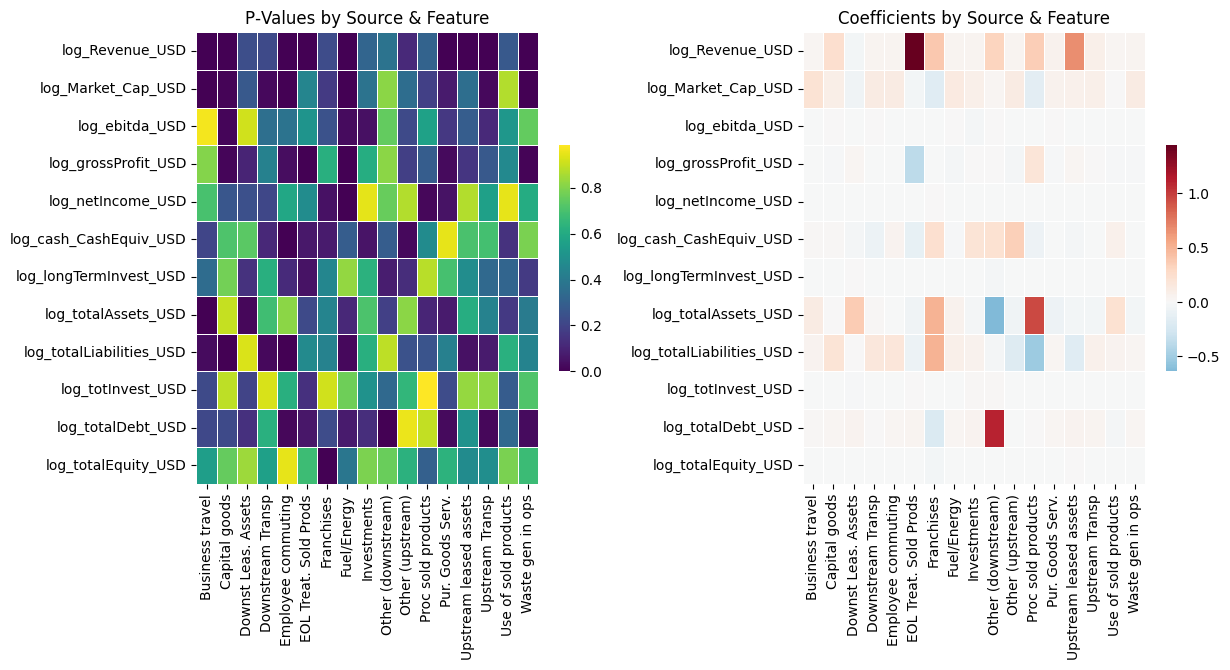

In [51]:


import matplotlib.pyplot as plt
import seaborn as sns

rename_cols = {
    'Fuel-and-energy-related activities (not included in Scope 1 or 2)': 'Fuel/Energy',
    'Upstream transportation and distribution': 'Upstream Transp',
    'Downstream transportation and distribution': 'Downst. Transp',
    'End of life treatment of sold products': 'EOL Treat. Sold Prods',
    'Downstream leased assets': 'Downst Leas. Assets',
    'Purchased goods and services': 'Pur. Goods Serv.',
    'Waste generated in operations': 'Waste gen in ops',
    'Processing of sold products': 'Proc sold products',
}

# Rename columns in both DataFrames
pvals_df = pvals_df.rename(columns=rename_cols)
coefs_df = coefs_df.rename(columns=rename_cols)

rename_rows = {
    'log_cashAndCashEquivalents_USD': 'log_cash_CashEquiv_USD',
    'log_longTermInvestments_USD': 'log_longTermInv_USD',
    'log_totalInvestments_USD': 'log_totInvest_USD',
}

# Rename indexes in both DataFrames
pvals_df = pvals_df.rename(index=rename_rows)
coefs_df = coefs_df.rename(index=rename_rows)

# Number of features & groups
n_feats = pvals_df.shape[0]
n_groups = pvals_df.shape[1]

# Dynamically set figure size
height = n_feats * 0.4 + 2     # 0.4" per feature + 2" padding
width  = n_groups * 0.5 + 4    # 0.5" per group + 4" padding

fig, axes = plt.subplots(1, 2, figsize=(width, height))

# Plot with seaborn.heatmap for automatic cell sizing
sns.heatmap(
    pvals_df, ax=axes[0], cmap='viridis', cbar_kws={'shrink':0.5},
    linewidths=0.5, linecolor='white'
)
axes[0].set_title('P‑Values by Source & Feature')
axes[0].set_xlabel('')
axes[0].set_ylabel('')

sns.heatmap(
    coefs_df, ax=axes[1], cmap='RdBu_r', center=0, cbar_kws={'shrink':0.5},
    linewidths=0.5, linecolor='white'
)
axes[1].set_title('Coefficients by Source & Feature')
axes[1].set_xlabel('')
axes[1].set_ylabel('')

# Rotate tick labels for readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()



# Feature Reduced Model

Here we run the same model but with the less significant features not included.

In [ ]:


# Remove zero values BEFORE log transformation and create a log target column.
prepped_df = prepped_df[prepped_df["Scope 3 Amount"] > 0].copy()
prepped_df["log_Scope_3_Amount"] = np.log1p(prepped_df["Scope 3 Amount"])

# Then group by "Scope 3 Sources" to create the dictionary of dataframes.
grouped_dfs = {
    group_name: group_df.copy()
    for group_name, group_df in prepped_df.groupby('Scope 3 Sources')
}

# Define the list of continuous variables.
numeric_cols = ['Scope 3 Amount', 'Revenue_USD', 'Market_Cap_USD', 
                'ebitda_USD', 'grossProfit_USD', 'netIncome_USD', 'cashAndCashEquivalents_USD', 
                'longTermInvestments_USD', 'totalAssets_USD', 'totalLiabilities_USD', 
                'totalInvestments_USD', 'totalDebt_USD', 'totalEquity_USD', 'country_ghg_avg', 'country_population_avg']

# Signed log transformation function.
def signed_log(x):
    return np.sign(x) * np.log(np.abs(x) + 1)

# Dictionary to collect metrics for each group.
metrics_results = {}

feature_pvals = {}
feature_coefs = {}

# Only the “financial” predictors from numeric_cols (exclude Scope 3 Amount and country averages)
fin_cols = [col for col in numeric_cols 
            if col not in ('Scope 3 Amount', 'country_ghg_avg', 'country_population_avg')]

# Build the list of model feature names
all_feats = [f'log_{col.replace(" ", "_").replace("/", "_")}' for col in fin_cols]


# Loop over each group in the dictionary.
for group_name, df in grouped_dfs.items():
    for col in numeric_cols:
        new_col = f'log_{col.replace(" ", "_").replace("/", "_")}'
        df[new_col] = df[col].apply(signed_log)

    df['Year'] = df['Year of Data'].astype(str)
    df['Scope3_Source'] = df['Scope 3 Sources'].astype(str)
    df['Country'] = df['Countries'].astype(str)
    df['Company'] = df['Company Name'].astype(str)
    
    df['ThirdParty_Verification'] = df['Third_Party_Verification'].astype(str)
    df['Primary_activity'] = df['Primary activity'].astype(str)
    df['Primary_sector'] = df['Primary sector'].astype(str)

        # Drop rows with NA after transformations
    df = df.dropna(subset=[  # Include all needed predictors here
        'log_Revenue_USD', 'log_Market_Cap_USD', 'log_ebitda_USD', 
        'log_grossProfit_USD', 'log_netIncome_USD', 'log_cashAndCashEquivalents_USD',
        'log_longTermInvestments_USD', 'log_totalAssets_USD', 'log_totalLiabilities_USD',
        'log_totalInvestments_USD', 'log_totalDebt_USD', 'log_totalEquity_USD',
        'log_Scope_3_Amount'
    ]).reset_index(drop=True)


    formula = (
        "log_Scope_3_Amount ~ log_Revenue_USD + "
        "log_Market_Cap_USD + log_grossProfit_USD + " #log_netIncome_USD + "   # + log_ebitda_USD
        "log_cashAndCashEquivalents_USD + log_totalAssets_USD + "  # + log_longTermInvestments_USD
        "log_totalLiabilities_USD + log_totalDebt_USD + "  # + log_totalInvestments_USD log_totalEquity_USD + 
        "C(Year) + C(Country)"  #+ C(Primary_activity) 
    )

    model = smf.mixedlm(formula, df, groups=df["Primary_sector"],
                        vc_formula={"Company": "0 + C(Company)"})
    result = None



    # Try multiple optimizers
    optimizers = ['lbfgs', 'cg', 'bfgs', 'nm']
    for opt in optimizers:
        try:
            with warnings.catch_warnings():
                warnings.filterwarnings("ignore")
                result = model.fit(method=opt, reml=False)
            if result.converged:
                print(f"Converged using optimizer: {opt} for group {group_name}")
                break
        except Exception as e:
            print(f"Failed with optimizer {opt} for group {group_name}: {e}")

    if result is None or not result.converged:
        print(f"Model did not converge for group {group_name}.")
        continue
    # Store p-values and coefficients
    coef_df = pd.DataFrame({
        'coef': result.params,
        'pvalue': result.pvalues
    })

        # Extract p-values and coefficients for each feature
    pvals = {feat: result.pvalues.get(feat, np.nan) for feat in all_feats}
    coefs = {feat: result.params.get(feat, np.nan)  for feat in all_feats}
    
    feature_pvals[group_name] = pvals
    feature_coefs[group_name] = coefs
    # Remove intercept for ranking
    if "Intercept" in coef_df.index:
        coef_df = coef_df.drop(index="Intercept")

    # Collect only financial feature results
    financial_vars = [f'log_{col.replace(" ", "_").replace("/", "_")}' for col in numeric_cols if 'Scope' not in col]
    financial_pvals = coef_df.loc[coef_df.index.isin(financial_vars)][['coef', 'pvalue']]

    # Store in dictionary
    if 'financial_feature_stats' not in metrics_results:
        metrics_results['financial_feature_stats'] = {}

    for var in financial_pvals.index:
        if var not in metrics_results['financial_feature_stats']:
            metrics_results['financial_feature_stats'][var] = []
        metrics_results['financial_feature_stats'][var].append({
            'group': group_name,
            'coef': financial_pvals.loc[var, 'coef'],
            'pvalue': financial_pvals.loc[var, 'pvalue']
        })

    # Print the top 10 most influential overall (based on p-value)
    coef_df = coef_df.sort_values(by='pvalue')
    top10 = coef_df.head(10)


    try:
        group_var = result.vcomp[0]  # Primary_sector
        company_var = result.vcomp[1] if len(result.vcomp) > 1 else np.nan
        residual_var = result.vcomp[-1]
        print(f"Variance across Primary_sector: {group_var:.4f}")

    except Exception as e:
        print(f"Could not extract variance components for group {group_name}: {e}")

    print(f"\nGroup: {group_name} --- Top 10 Influential Factors")
    print(top10)

    df['Predicted_log_Scope_3'] = result.fittedvalues
    df['Reported_log_Scope_3'] = df["log_Scope_3_Amount"]
    df['Predicted_Scope_3'] = np.expm1(df['Predicted_log_Scope_3'])
    df['Reported_Scope_3'] = np.expm1(df['Reported_log_Scope_3'])


    r2_log = r2_score(df['Reported_log_Scope_3'], df['Predicted_log_Scope_3'])
    rmsle_log = np.sqrt(((df['Reported_log_Scope_3'] - df['Predicted_log_Scope_3']) ** 2).mean())
    epsilon = 1e-10
    mape_log = np.mean(np.abs((df['Reported_log_Scope_3'] - df['Predicted_log_Scope_3']) / (df['Reported_log_Scope_3'] + epsilon))) * 100
    rmse_orig = np.sqrt(mean_squared_error(df['Reported_Scope_3'], df['Predicted_Scope_3']))
    mae_orig = mean_absolute_error(df['Reported_Scope_3'], df['Predicted_Scope_3'])
    mape_orig = np.mean(np.abs((df['Reported_Scope_3'] - df['Predicted_Scope_3']) / df['Reported_Scope_3'])) * 100

    metrics_results[group_name] = {
        "R2_log": r2_log,
        "RMSLE_log": rmsle_log,
        "MAPE_log": mape_log,
        "RMSE_orig": rmse_orig,
        "MAE_orig": mae_orig,
        "MAPE_orig": mape_orig,
    }

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    sns.kdeplot(df['Reported_log_Scope_3'], label='Reported', linewidth=2, fill=True, ax=axes[0])
    sns.kdeplot(df['Predicted_log_Scope_3'], label='Predicted', linewidth=2, fill=True, ax=axes[0])
    axes[0].set_title(f"{group_name}: log(Scope 3 Emissions)")
    axes[0].set_xlabel("log(metric tons + 1)")
    axes[0].set_ylabel("Density")
    axes[0].legend()

    metrics_text = (
        f"R² (log):     {r2_log:.3f}\n"
        f"RMSLE (log):  {rmsle_log:.3f}\n"
        f"MAPE (log):   {mape_log:.2f}%\n\n"
        f"RMSE:         {rmse_orig:.0f}\n"
        f"MAE:          {mae_orig:.0f}\n"
        f"MAPE:         {mape_orig:.2f}%"
    )
    axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                 verticalalignment='top', fontsize=10, bbox=dict(boxstyle='round', alpha=0.1))

    y_test_exp = df['Reported_Scope_3']
    y_pred_exp = df['Predicted_Scope_3']
    min_val = min(y_test_exp.min(), y_pred_exp.min())
    max_val = max(y_test_exp.max(), y_pred_exp.max())
    log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)

    sns.histplot(y_test_exp, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported", ax=axes[1])
    sns.histplot(y_pred_exp, bins=log_bins, stat="density", color="orange", alpha=0.5, label="Predicted", ax=axes[1])
    axes[1].set_xscale("log")
    axes[1].set_title(f"{group_name}: Scope 3 Amount (MT CO₂e)")
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    axes[1].set_ylabel("Density")
    axes[1].legend()

    plt.tight_layout()
    plt.show()

# Convert to DataFrames
pvals_df = pd.DataFrame(feature_pvals)
coefs_df = pd.DataFrame(feature_coefs)

# Convert the nested metrics_results dictionary to a DataFrame
metrics_df = pd.DataFrame.from_dict(metrics_results, orient='index')

# Optionally, sort the index for readability
metrics_df = metrics_df.sort_index()

# drop the 'financial_feature_stats' row if it exists
metrics_df = metrics_df.drop(index='financial_feature_stats', errors='ignore')


# Display the full table of metrics
import pandas as pd
from IPython.display import display

print("\n📊 Summary of Model Performance Metrics by Scope 3 Source:\n")
display(metrics_df[['R2_log','RMSLE_log',	'MAPE_log',	'RMSE_orig',	'MAE_orig',	'MAPE_orig']].round(2))  

ghg_df_feature_red = metrics_df[['R2_log','RMSLE_log',	'MAPE_log',	'RMSE_orig',	'MAE_orig',	'MAPE_orig']].copy()

# Feature Reduced with Residual Modeling

The residual modeling approach in this code serves as a corrective layer to improve emission predictions—particularly for underrepresented low-emission companies—by learning and adjusting for systematic prediction errors. After fitting a mixed-effects model to forecast log-transformed Scope 3 emissions using financial and categorical features, the residuals (differences between actual and predicted emissions) are calculated. A separate Random Forest model is then trained specifically on the lower 25% of reported emissions, using financial predictors and weighting errors inversely by emission size to prioritize accuracy in this tail segment. The predicted residuals from this model are added back to the original predictions to produce an "adjusted prediction" that better accounts for patterns the main model missed—especially for small emitters. This two-stage strategy enhances overall accuracy, reduces bias in low-end predictions, and leads to more balanced model performance across the emission spectrum.


In [ ]:
# Remove zero values BEFORE log transformation and create a log target column.
prepped_df = prepped_df[prepped_df["Scope 3 Amount"] > 0].copy()
prepped_df["log_Scope_3_Amount"] = np.log1p(prepped_df["Scope 3 Amount"])

# Then group by "Scope 3 Sources" to create the dictionary of dataframes.
grouped_dfs = {
    group_name: group_df.copy()
    for group_name, group_df in prepped_df.groupby('Scope 3 Sources')
}

# Define the list of continuous variables.
numeric_cols = ['Scope 3 Amount', 'Revenue_USD', 'Market_Cap_USD', 
                'ebitda_USD', 'grossProfit_USD', 'netIncome_USD', 'cashAndCashEquivalents_USD', 
                'longTermInvestments_USD', 'totalAssets_USD', 'totalLiabilities_USD', 
                'totalInvestments_USD', 'totalDebt_USD', 'totalEquity_USD', 'country_ghg_avg', 'country_population_avg']

# Signed log transformation function.
def signed_log(x):
    return np.sign(x) * np.log(np.abs(x) + 1)

# Dictionary to collect metrics for each group.
metrics_results = {}

feature_pvals = {}
feature_coefs = {}

# Only the “financial” predictors from numeric_cols (exclude Scope 3 Amount and country averages)
fin_cols = [col for col in numeric_cols 
            if col not in ('Scope 3 Amount', 'country_ghg_avg', 'country_population_avg')]

# Build the list of model feature names
all_feats = [f'log_{col.replace(" ", "_").replace("/", "_")}' for col in fin_cols]


# Loop over each group in the dictionary.
for group_name, df in grouped_dfs.items():
    for col in numeric_cols:
        new_col = f'log_{col.replace(" ", "_").replace("/", "_")}'
        df[new_col] = df[col].apply(signed_log)

    df['Year'] = df['Year of Data'].astype(str)
    df['Scope3_Source'] = df['Scope 3 Sources'].astype(str)
    df['Country'] = df['Countries'].astype(str)
    df['Company'] = df['Company Name'].astype(str)
    
    df['ThirdParty_Verification'] = df['Third_Party_Verification'].astype(str)
    df['Primary_activity'] = df['Primary activity'].astype(str)
    df['Primary_sector'] = df['Primary sector'].astype(str)

        # Drop rows with NA after transformations
    df = df.dropna(subset=[  # Include all needed predictors here
        'log_Revenue_USD', 'log_Market_Cap_USD', 'log_ebitda_USD', 
        'log_grossProfit_USD', 'log_netIncome_USD', 'log_cashAndCashEquivalents_USD',
        'log_longTermInvestments_USD', 'log_totalAssets_USD', 'log_totalLiabilities_USD',
        'log_totalInvestments_USD', 'log_totalDebt_USD', 'log_totalEquity_USD',
        'log_Scope_3_Amount'
    ]).reset_index(drop=True)


    formula = (
        "log_Scope_3_Amount ~ log_Revenue_USD + "
        "log_Market_Cap_USD + log_grossProfit_USD + " #log_netIncome_USD + "   # + log_ebitda_USD
        "log_cashAndCashEquivalents_USD + log_totalAssets_USD + "  # + log_longTermInvestments_USD
        "log_totalLiabilities_USD + log_totalDebt_USD + "  # + log_totalInvestments_USD log_totalEquity_USD + 
        "C(Year) + C(Country)"  #+ C(Primary_activity) 
    )

    model = smf.mixedlm(formula, df, groups=df["Primary_sector"],
                        vc_formula={"Company": "0 + C(Company)"})
    result = None



    # Try multiple optimizers
    optimizers = ['lbfgs', 'cg', 'bfgs', 'nm']
    for opt in optimizers:
        try:
            with warnings.catch_warnings():
                warnings.filterwarnings("ignore")
                result = model.fit(method=opt, reml=False)
            if result.converged:
                print(f"Converged using optimizer: {opt} for group {group_name}")
                break
        except Exception as e:
            print(f"Failed with optimizer {opt} for group {group_name}: {e}")

    if result is None or not result.converged:
        print(f"Model did not converge for group {group_name}.")
        continue
    # Store p-values and coefficients
    coef_df = pd.DataFrame({
        'coef': result.params,
        'pvalue': result.pvalues
    })

        # Extract p-values and coefficients for each feature
    pvals = {feat: result.pvalues.get(feat, np.nan) for feat in all_feats}
    coefs = {feat: result.params.get(feat, np.nan)  for feat in all_feats}
    
    feature_pvals[group_name] = pvals
    feature_coefs[group_name] = coefs
    # Remove intercept for ranking
    if "Intercept" in coef_df.index:
        coef_df = coef_df.drop(index="Intercept")

    # Collect only financial feature results
    financial_vars = [f'log_{col.replace(" ", "_").replace("/", "_")}' for col in numeric_cols if 'Scope' not in col]
    financial_pvals = coef_df.loc[coef_df.index.isin(financial_vars)][['coef', 'pvalue']]

    # Store in dictionary
    if 'financial_feature_stats' not in metrics_results:
        metrics_results['financial_feature_stats'] = {}

    for var in financial_pvals.index:
        if var not in metrics_results['financial_feature_stats']:
            metrics_results['financial_feature_stats'][var] = []
        metrics_results['financial_feature_stats'][var].append({
            'group': group_name,
            'coef': financial_pvals.loc[var, 'coef'],
            'pvalue': financial_pvals.loc[var, 'pvalue']
        })

    # Print the top 10 most influential overall (based on p-value)
    coef_df = coef_df.sort_values(by='pvalue')
    top10 = coef_df.head(10)


    try:
        group_var = result.vcomp[0]  # Primary_sector
        company_var = result.vcomp[1] if len(result.vcomp) > 1 else np.nan
        residual_var = result.vcomp[-1]
        print(f"Variance across Primary_sector: {group_var:.4f}")

    except Exception as e:
        print(f"Could not extract variance components for group {group_name}: {e}")

    print(f"\nGroup: {group_name} --- Top 10 Influential Factors")
    print(top10)

    df['Predicted_log_Scope_3'] = result.fittedvalues
    df['Reported_log_Scope_3'] = df["log_Scope_3_Amount"]
    df['Predicted_Scope_3'] = np.expm1(df['Predicted_log_Scope_3'])
    df['Reported_Scope_3'] = np.expm1(df['Reported_log_Scope_3'])

    

    # ── METRICS ──────────────────────────────────────────────────────────────
    y_true_mt = df['Reported_Scope_3']
    y_pred_mt = df['Predicted_Scope_3']
    
    r2_pct      = r2_score(df['Reported_log_Scope_3'], df['Predicted_log_Scope_3']) * 100   # %
    mape_log    = np.mean(np.abs((df['Reported_log_Scope_3'] - df['Predicted_log_Scope_3'])
                                 / df['Reported_log_Scope_3'])) * 100                       # %
    mape_orig   = np.mean(np.abs((y_true_mt - y_pred_mt) / y_true_mt)) * 100                # %
    rmsle       = np.sqrt(mean_squared_log_error(y_true_mt, y_pred_mt))                     # 2-dec
    rmse_orig   = np.sqrt(mean_squared_error(y_true_mt, y_pred_mt))                         # 2-dec
    mae_orig    = mean_absolute_error(y_true_mt, y_pred_mt)                                 # 2-dec
    

    # text box for left KDE
    metrics_text = (
        f"R²: {r2_pct:.1f}%\n"
        f"MAPE: {mape_orig:.1f}%\n"
        f"MAPE(log): {mape_log:.1f}%\n"
        f"RMSLE: {rmsle:.2f}\n"
        f"RMSE:  {rmse_orig:.2f}\n"
        f"MAE:   {mae_orig:.2f}"
    )
    axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                 va='top', fontsize=10, bbox=dict(boxstyle='round', alpha=.1))
    
    # store in results dict
    metrics_results[group_name] = {
        "R²(log)%":   f"{r2_pct:.1f}",
        "MAPE_orig%": f"{mape_orig:.1f}",
        "MAPE_log%":  f"{mape_log:.1f}",
        "RMSLE":      f"{rmsle:.2f}",
        "RMSE_orig":  f"{rmse_orig:.2f}",
        "MAE_orig":   f"{mae_orig:.2f}",
    }
            

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    sns.kdeplot(df['Reported_log_Scope_3'], label='Reported', linewidth=2, fill=True, ax=axes[0])
    sns.kdeplot(df['Predicted_log_Scope_3'], label='Predicted', linewidth=2, fill=True, ax=axes[0])
    axes[0].set_title(f"{group_name}: log(Scope 3 Emissions)")
    axes[0].set_xlabel("log(metric tons + 1)")
    axes[0].set_ylabel("Density")
    axes[0].legend()

    metrics_text = (
        f"R² (log):     {r2_log:.3f}\n"
        f"RMSLE (log):  {rmsle_log:.3f}\n"
        f"MAPE (log):   {mape_log:.2f}%\n\n"
        f"RMSE:         {rmse_orig:.0f}\n"
        f"MAE:          {mae_orig:.0f}\n"
        f"MAPE:         {mape_orig:.2f}%"
    )
    axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                 verticalalignment='top', fontsize=10, bbox=dict(boxstyle='round', alpha=0.1))

    y_test_exp = df['Reported_Scope_3']
    y_pred_exp = df['Predicted_Scope_3']
    min_val = min(y_test_exp.min(), y_pred_exp.min())
    max_val = max(y_test_exp.max(), y_pred_exp.max())
    log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)

    sns.histplot(y_test_exp, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported", ax=axes[1])
    sns.histplot(y_pred_exp, bins=log_bins, stat="density", color="orange", alpha=0.5, label="Predicted", ax=axes[1])
    axes[1].set_xscale("log")
    axes[1].set_title(f"{group_name}: Scope 3 Amount (MT CO₂e)")
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    axes[1].set_ylabel("Density")
    axes[1].legend()

    plt.tight_layout()
    plt.show()



    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_absolute_error, mean_squared_log_error
    import numpy as np
    
    # Compute residuals
    df['residual'] = df['Reported_Scope_3'] - df['Predicted_Scope_3']
    
    #  Select features for residual modeling
    features_for_resid = [
        'log_Revenue_USD', 'log_Market_Cap_USD', 'log_ebitda_USD',
        'log_grossProfit_USD', 'log_cashAndCashEquivalents_USD',
        'log_totalAssets_USD', 'log_totalLiabilities_USD', 'log_totalDebt_USD'
    ]

    #  focus on lower 25% of true values for training residual model
    q25 = df['Reported_Scope_3'].quantile(0.25)
    tail_df = df[df['Reported_Scope_3'] < q25]
    
    # Compute weights: inverse of actual values to downweight large emitters
    tail_df['weight'] = 1 / (tail_df['Reported_Scope_3'] + 1)
    
    #Train residual model
    residual_model = RandomForestRegressor(n_estimators=100, random_state=0)
    residual_model.fit(tail_df[features_for_resid], tail_df['residual'], sample_weight=tail_df['weight'])
    
    #Predict residuals for all data
    df['residual_adjustment'] = residual_model.predict(df[features_for_resid])
    
    #Adjust the original predictions
    df['adjusted_prediction'] = df['Predicted_Scope_3'] + df['residual_adjustment']
    df['adjusted_prediction'] = df['adjusted_prediction'].clip(lower=0)  # Avoid negatives
    
    #Evaluation metrics
    mae_before = mean_absolute_error(df['Reported_Scope_3'], df['Predicted_Scope_3'])
    mae_after = mean_absolute_error(df['Reported_Scope_3'], df['adjusted_prediction'])
    
    mape_safe = lambda y_true, y_pred: np.mean(
        np.abs((y_true - y_pred) / np.clip(y_true, 1e-10, None))) * 100
    
    mape_before = mape_safe(df['Reported_Scope_3'], df['Predicted_Scope_3'])
    mape_after = mape_safe(df['Reported_Scope_3'], df['adjusted_prediction'])
    
    rmsle_before = np.sqrt(mean_squared_log_error(df['Reported_Scope_3'], df['Predicted_Scope_3']))
    rmsle_after = np.sqrt(mean_squared_log_error(df['Reported_Scope_3'], df['adjusted_prediction']))


    # update results dict
    metrics_results[group_name] = {
       "R²(log)%":   f"{r2_pct:.1f}",
        "MAPE_orig%": f"{mape_after:.1f}",
       "MAPE_log%":  f"{mape_log:.1f}",
        "RMSLE":      f"{rmsle_after:.2f}",
       "RMSE_orig":  f"{rmse_orig:.2f}",
        "MAE_orig":   f"{mae_after:.2f}",
    }  

    #Print results
    print(f" MAE Before:  {mae_before:,.2f}")
    print(f" MAE After:   {mae_after:,.2f}")
    print(f" MAPE Before: {mape_before:.2f}%")
    print(f" MAPE After:  {mape_after:.2f}%")
    print(f" RMSLE Before: {rmsle_before:.4f}")
    print(f" RMSLE After:  {rmsle_after:.4f}")

    # Histogram comparison styled like your reference
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    
    y_pred_exp = df['Predicted_Scope_3']
    y_adj_exp = df['adjusted_prediction']
    min_val = min(y_pred_exp.min(), y_adj_exp.min())
    max_val = max(y_pred_exp.max(), y_adj_exp.max())
    log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)
    
    sns.histplot(y_pred_exp, bins=log_bins, stat="density", color="orange", alpha=0.5, label="Original Prediction", ax=ax)
    sns.histplot(y_adj_exp, bins=log_bins, stat="density", color="green", alpha=0.5, label="Adjusted Prediction", ax=ax)
    
    ax.set_xscale("log")
    ax.set_title(f"Scope 3 Prediction Distribution (Log Scale)")
    ax.set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    ax.set_ylabel("Density")
    ax.legend()
    
    plt.tight_layout()
    plt.show()

# Convert to DataFrames
pvals_df = pd.DataFrame(feature_pvals)
coefs_df = pd.DataFrame(feature_coefs)

# Convert the nested metrics_results dictionary to a DataFrame
metrics_df = pd.DataFrame.from_dict(metrics_results, orient='index')

# Optionally, sort the index for readability
metrics_df = metrics_df.sort_index()

# drop the 'financial_feature_stats' row if it exists
metrics_df = metrics_df.drop(index='financial_feature_stats', errors='ignore')


# Display the full table of metrics
import pandas as pd
from IPython.display import display


# ───────────────── summary display ───────────────────────────────────────
summary_cols = ["R²(log)%","MAPE_orig%","MAPE_log%","RMSLE","RMSE_orig","MAE_orig"]
print("\nSummary of Model Performance Metrics by Scope-3 Source:\n")
display(pd.DataFrame(metrics_results).T[summary_cols].astype(float).round(2))

ghg_df_feature_red = pd.DataFrame(metrics_results).T[summary_cols].astype(float).round(2)
ghg_df_feature_red = metrics_df[summary_cols].copy()

In [ ]:
ghg_df_feature_red = pd.DataFrame(metrics_results).T[summary_cols].astype(float).round(2)
ghg_df_feature_red = metrics_df[summary_cols].copy()

In [ ]:


ghg_df_feature_red.to_csv(
    r"C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\Corporate_Data\ghg_HLM_feat_reduced_w_resid_mod.csv"
)

Converged using optimizer: lbfgs for group Business travel
Variance across Primary_sector: 1.5253

Group: Business travel --- Top 10 Influential Factors
                               coef         pvalue
C(Year)[T.2022]           -1.348848  1.416302e-229
C(Year)[T.2021]           -1.135300  1.347653e-161
Company Var                2.235551   5.247911e-64
C(Year)[T.2023]           -0.484196   8.631648e-30
log_Market_Cap_USD         0.213812   1.067444e-18
C(Country)[T.China]       -1.758296   6.169267e-06
log_totalAssets_USD        0.109027   1.922835e-04
C(Country)[T.Brazil]      -1.450893   3.541709e-04
C(Country)[T.South Korea] -1.405077   3.701006e-04
C(Country)[T.Portugal]    -2.059254   7.399791e-04


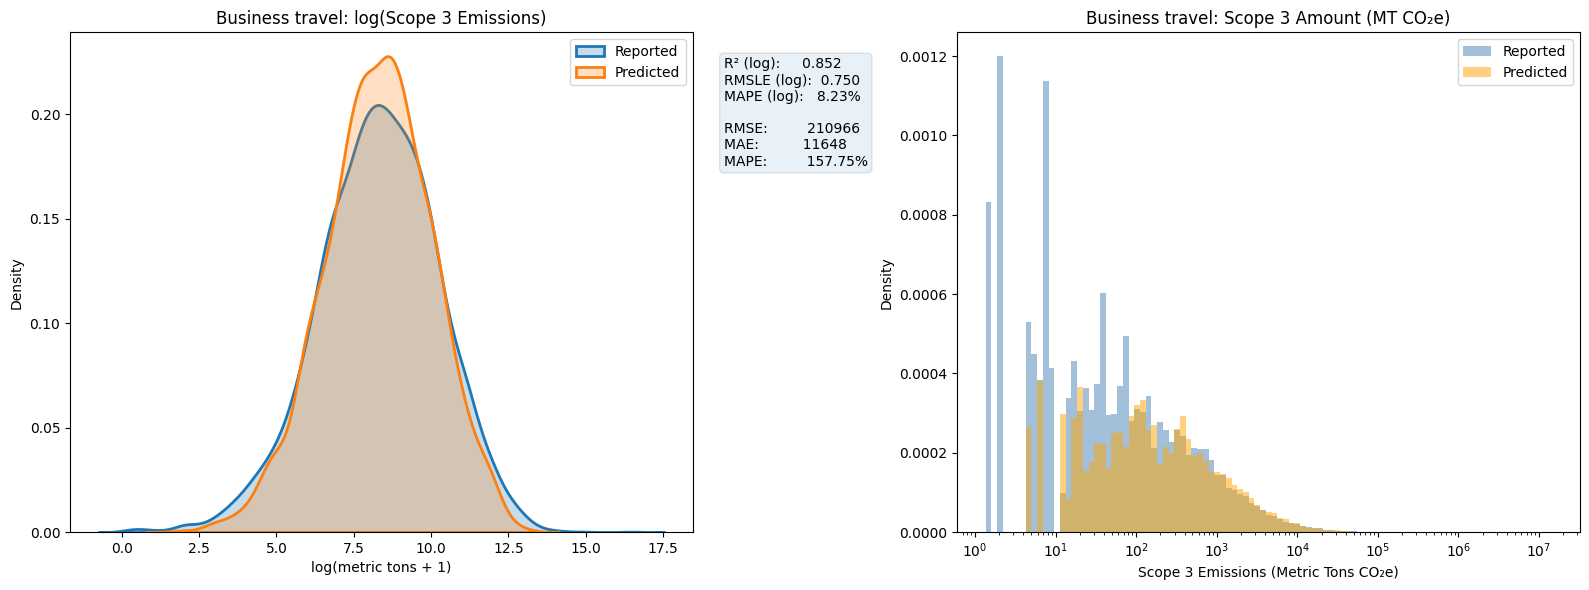

C:\Users\cliff\AppData\Local\Temp\ipykernel_11024\932212720.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tail_df.loc[:, "weight"] = 1 / (tail_df["Reported_Scope_3"] + 1)


 MAE Before:  11,648.30
 MAE After:   12,465.74
 MAPE Before: 157.75%
 MAPE After:  61.62%
 RMSLE Before: 0.7498
 RMSLE After:  2.0112


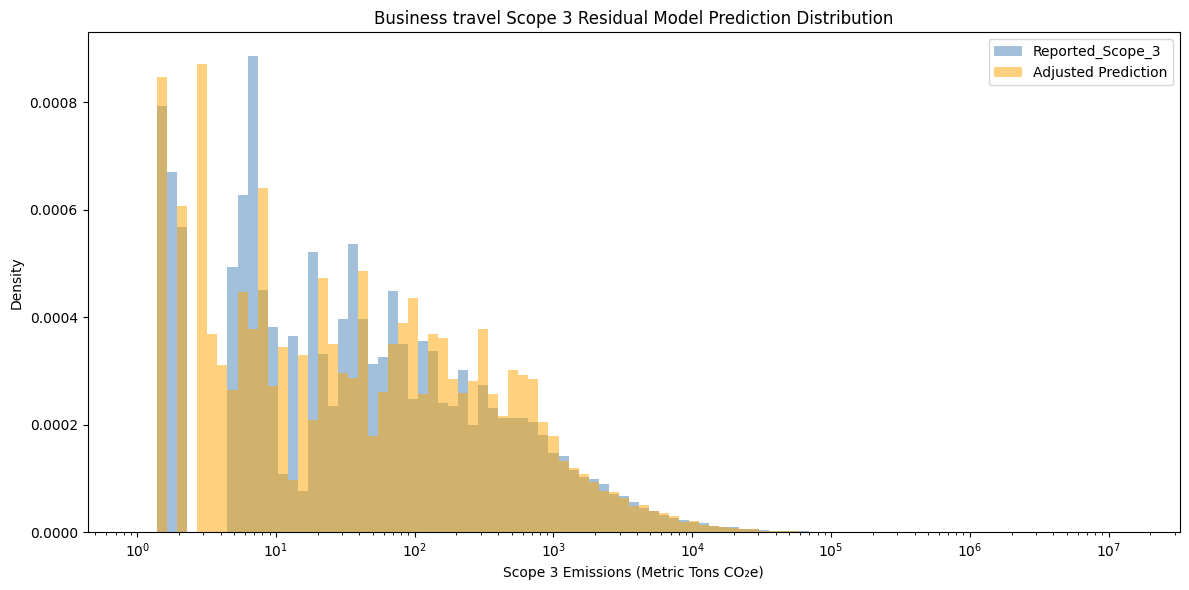

Converged using optimizer: lbfgs for group Capital goods
Variance across Primary_sector: 2.6767

Group: Capital goods --- Top 10 Influential Factors
                               coef        pvalue
Company Var                3.131302  2.768060e-43
C(Country)[T.South Korea] -4.162287  5.877347e-10
log_Revenue_USD            0.254103  2.126068e-08
log_totalLiabilities_USD   0.190309  6.252371e-04
C(Country)[T.Austria]      3.840676  7.821410e-04
C(Year)[T.2023]            0.176049  9.336050e-03
log_Market_Cap_USD         0.093054  1.081057e-02
C(Country)[T.Belgium]      2.297973  2.703713e-02
log_grossProfit_USD       -0.012969  4.857259e-02
C(Year)[T.2019]            0.132066  5.407895e-02


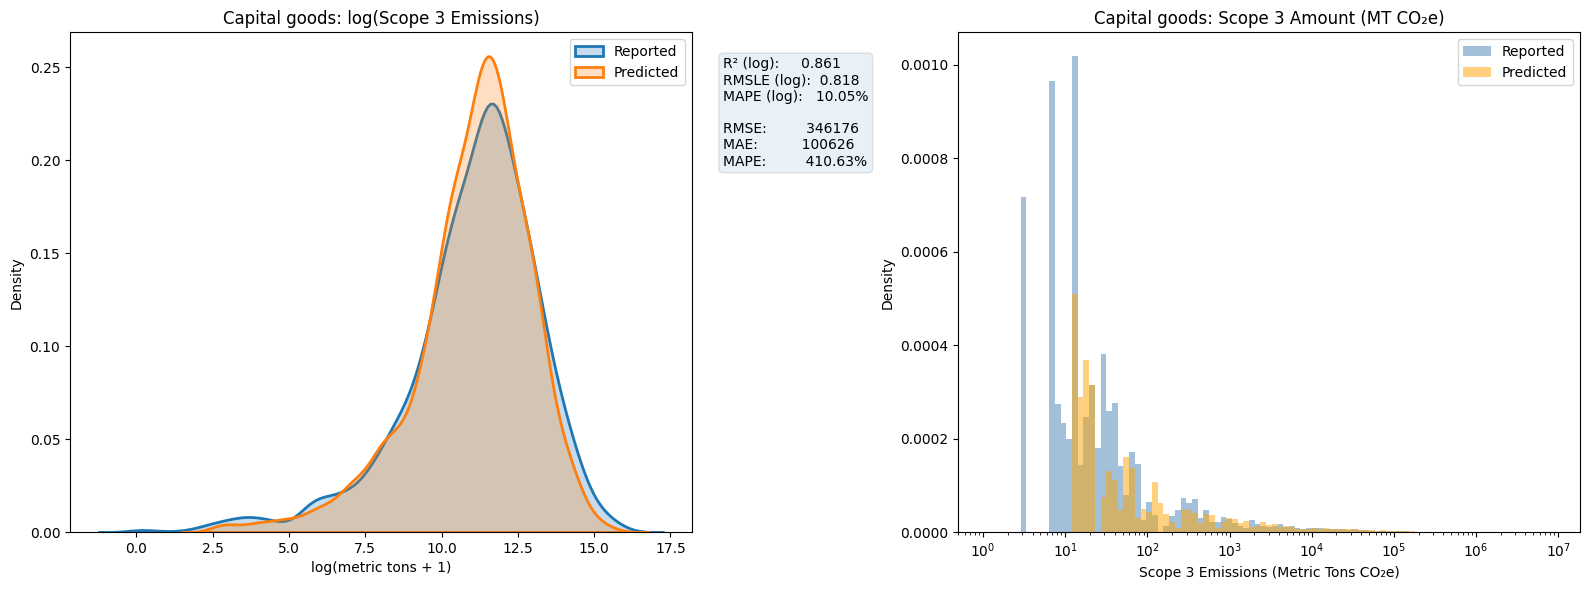

C:\Users\cliff\AppData\Local\Temp\ipykernel_11024\932212720.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tail_df.loc[:, "weight"] = 1 / (tail_df["Reported_Scope_3"] + 1)


 MAE Before:  100,625.84
 MAE After:   103,202.71
 MAPE Before: 410.63%
 MAPE After:  147.23%
 RMSLE Before: 0.8181
 RMSLE After:  1.8196


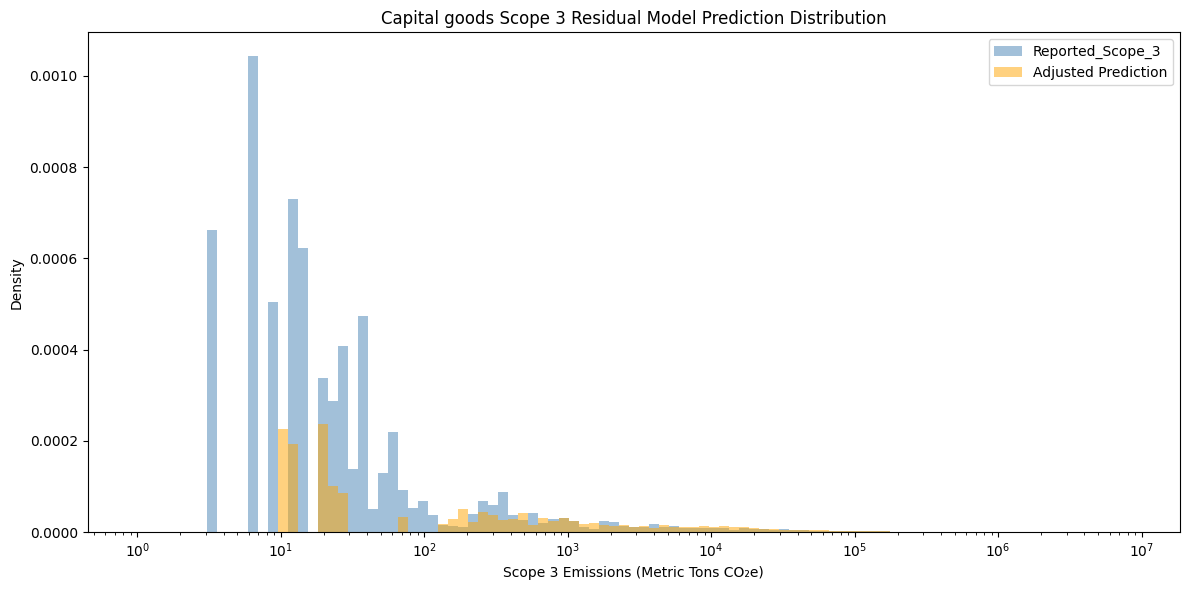

Converged using optimizer: lbfgs for group Downstream leased assets
Variance across Primary_sector: 6.4684

Group: Downstream leased assets --- Top 10 Influential Factors
                            coef        pvalue
Company Var            10.298750  3.171191e-21
log_totalAssets_USD     0.338398  2.471155e-02
C(Country)[T.Brazil]   -5.033770  2.826953e-02
C(Year)[T.2022]        -0.186052  6.430977e-02
log_grossProfit_USD     0.023953  8.369778e-02
C(Year)[T.2021]        -0.172538  9.000529e-02
log_totalDebt_USD       0.056513  1.074563e-01
C(Country)[T.Bermuda]  -4.593611  1.220211e-01
C(Year)[T.2023]        -0.134772  1.932109e-01
log_Market_Cap_USD     -0.071771  2.129722e-01


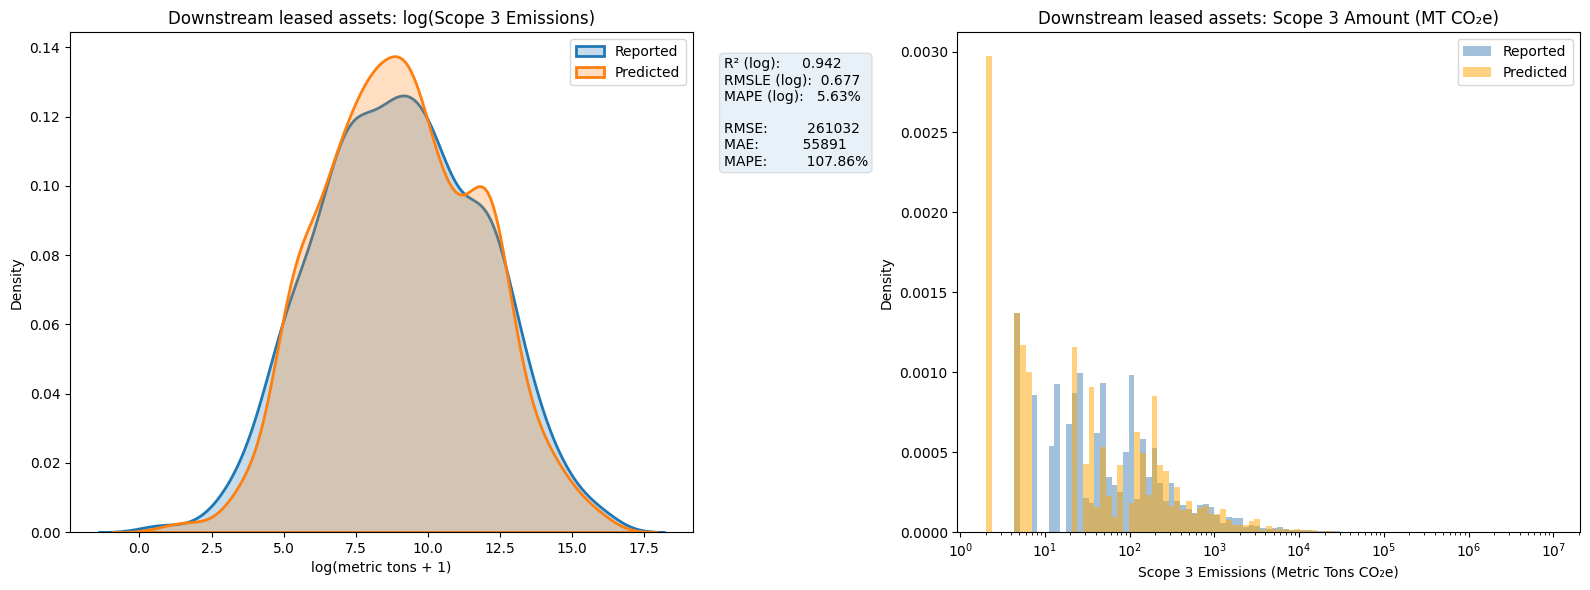

C:\Users\cliff\AppData\Local\Temp\ipykernel_11024\932212720.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tail_df.loc[:, "weight"] = 1 / (tail_df["Reported_Scope_3"] + 1)


 MAE Before:  55,890.96
 MAE After:   56,128.97
 MAPE Before: 107.86%
 MAPE After:  57.83%
 RMSLE Before: 0.6775
 RMSLE After:  1.3587


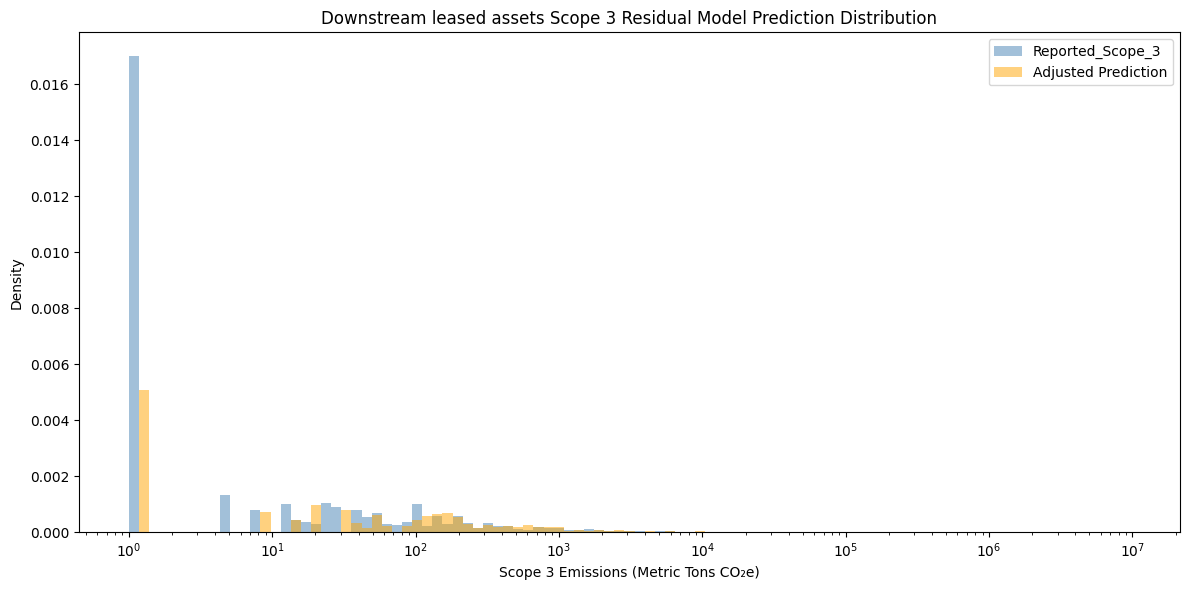

Converged using optimizer: lbfgs for group Downstream transportation and distribution
Variance across Primary_sector: 4.8131

Group: Downstream transportation and distribution --- Top 10 Influential Factors
                              coef        pvalue
Company Var               5.121974  5.260947e-36
C(Year)[T.2023]          -0.306077  3.488433e-04
log_Market_Cap_USD        0.132278  7.958651e-03
C(Year)[T.2022]          -0.213467  9.400457e-03
C(Country)[T.Bermuda]    -6.320579  1.411577e-02
C(Year)[T.2021]          -0.196210  1.750706e-02
log_totalLiabilities_USD  0.160866  2.242280e-02
C(Country)[T.Brazil]     -2.768070  2.527374e-02
C(Country)[T.Luxembourg]  4.696928  5.528845e-02
C(Country)[T.Greece]     -3.524184  5.731864e-02


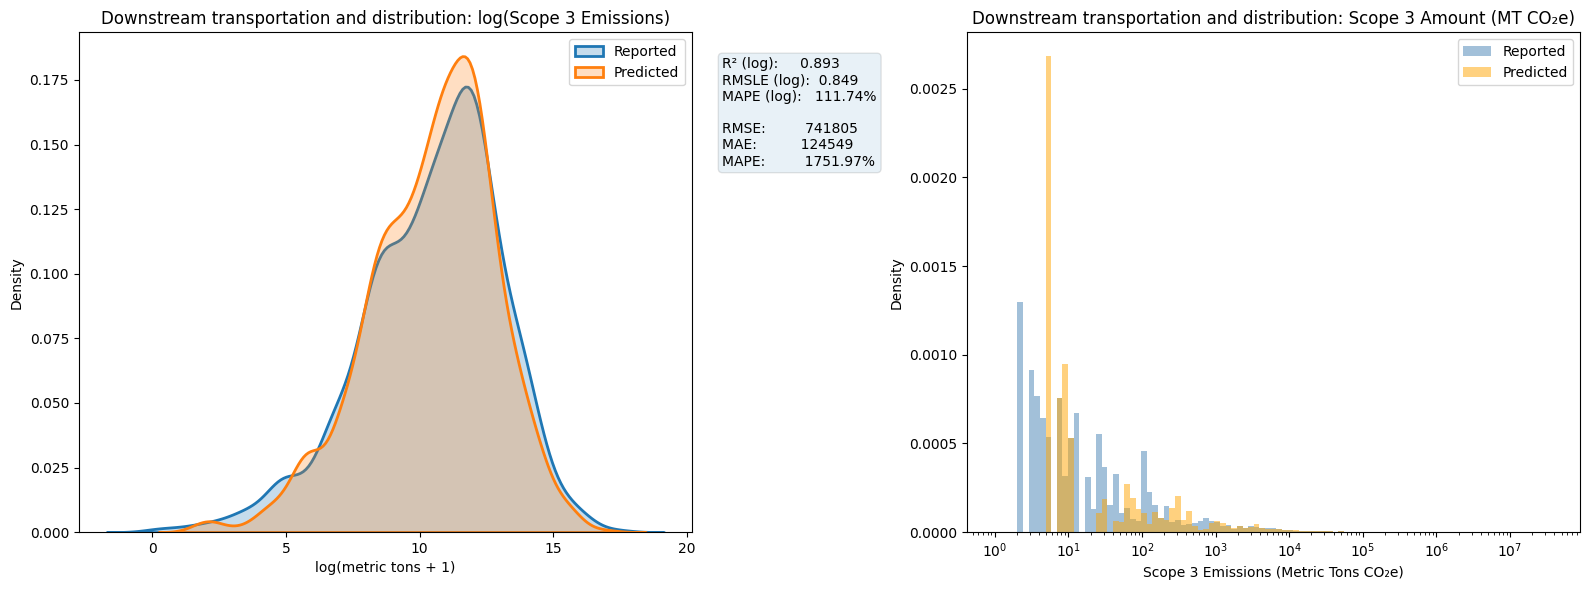

C:\Users\cliff\AppData\Local\Temp\ipykernel_11024\932212720.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tail_df.loc[:, "weight"] = 1 / (tail_df["Reported_Scope_3"] + 1)


 MAE Before:  124,548.58
 MAE After:   125,269.30
 MAPE Before: 1751.97%
 MAPE After:  74.91%
 RMSLE Before: 0.8490
 RMSLE After:  1.9992


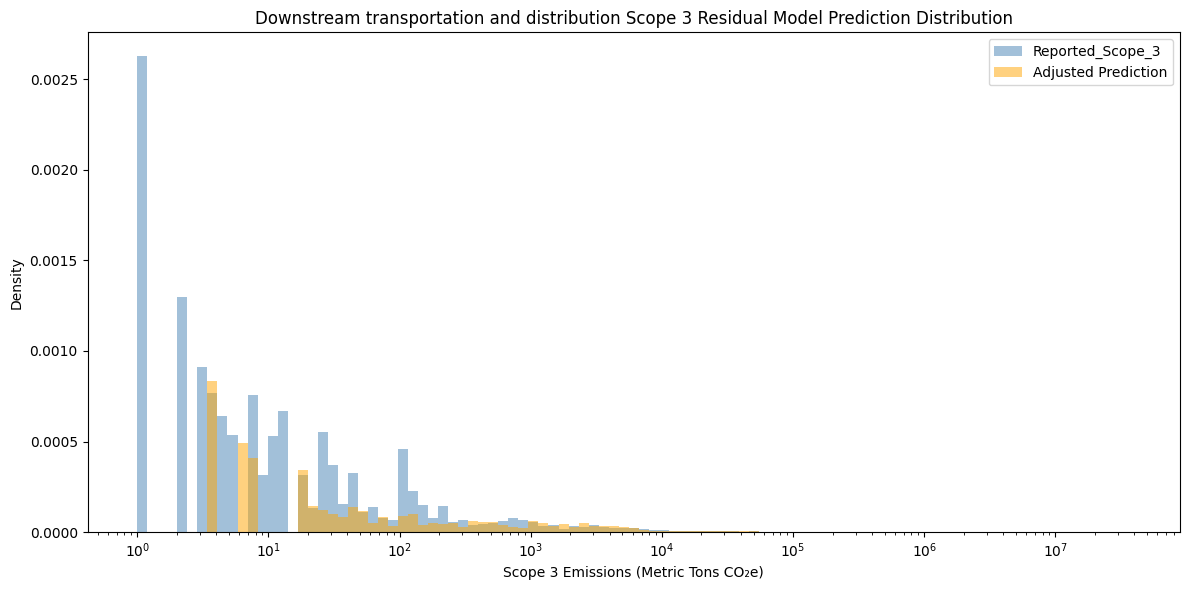

Converged using optimizer: lbfgs for group Employee commuting
Variance across Primary_sector: 2.4131

Group: Employee commuting --- Top 10 Influential Factors
                                    coef        pvalue
Company Var                     4.513868  3.689044e-61
C(Year)[T.2022]                -0.224703  3.517208e-07
log_totalLiabilities_USD        0.176087  6.674849e-07
log_Market_Cap_USD              0.116539  3.969929e-06
C(Year)[T.2021]                -0.204079  4.463809e-06
log_Revenue_USD                 0.042771  2.126307e-04
log_cashAndCashEquivalents_USD  0.052618  5.763593e-04
C(Country)[T.France]            1.257182  7.565533e-03
C(Country)[T.Turkey]           -4.407781  1.242437e-02
log_grossProfit_USD            -0.011530  1.510053e-02


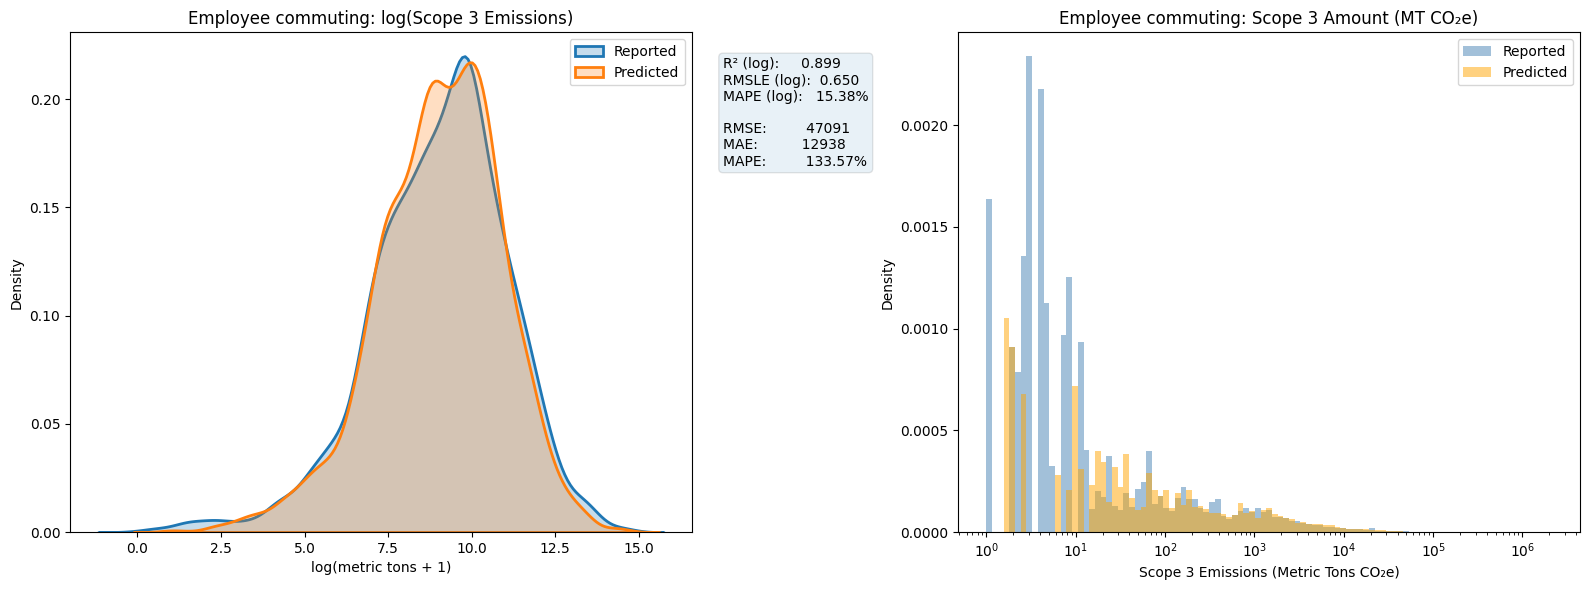

C:\Users\cliff\AppData\Local\Temp\ipykernel_11024\932212720.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tail_df.loc[:, "weight"] = 1 / (tail_df["Reported_Scope_3"] + 1)


 MAE Before:  12,938.06
 MAE After:   13,293.34
 MAPE Before: 133.57%
 MAPE After:  50.48%
 RMSLE Before: 0.6497
 RMSLE After:  1.1868


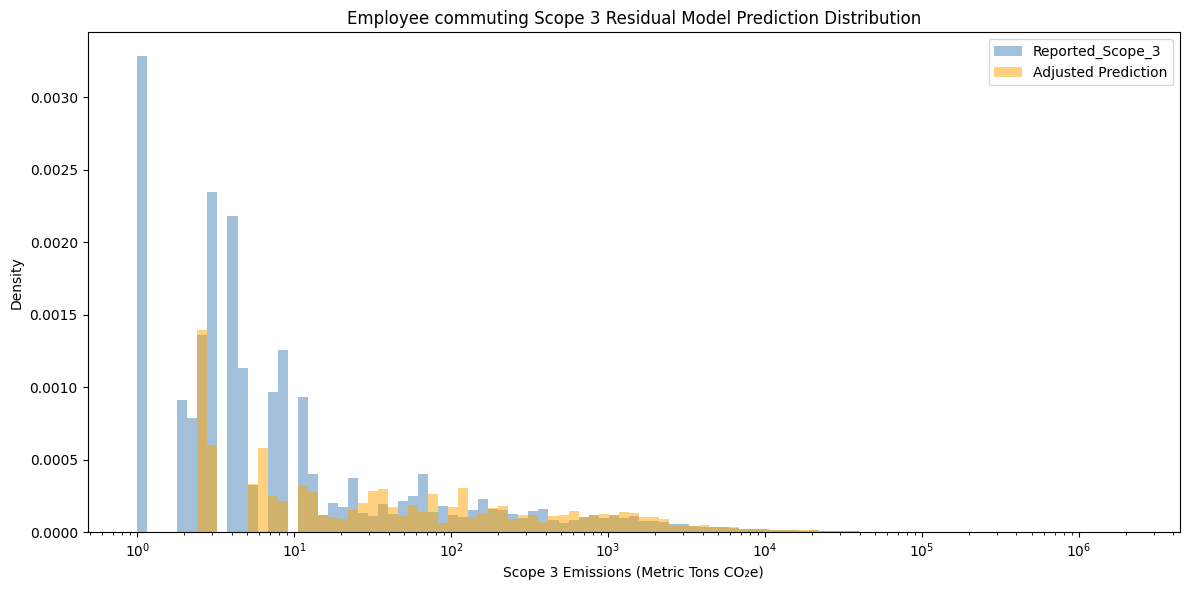

Converged using optimizer: lbfgs for group End of life treatment of sold products
Variance across Primary_sector: 6.4429

Group: End of life treatment of sold products --- Top 10 Influential Factors
                            coef        pvalue
Company Var             6.499790  1.875681e-35
log_Revenue_USD         1.426266  4.044726e-16
log_grossProfit_USD    -0.355440  1.700522e-03
C(Country)[T.Germany]   3.511700  9.058565e-03
C(Country)[T.Chile]     6.501062  2.305615e-02
C(Country)[T.Thailand]  4.198528  2.851953e-02
C(Country)[T.France]    2.690522  3.541564e-02
C(Country)[T.India]     3.951856  4.471995e-02
C(Country)[T.Israel]    5.759659  5.249181e-02
C(Country)[T.Finland]   2.637644  5.465145e-02


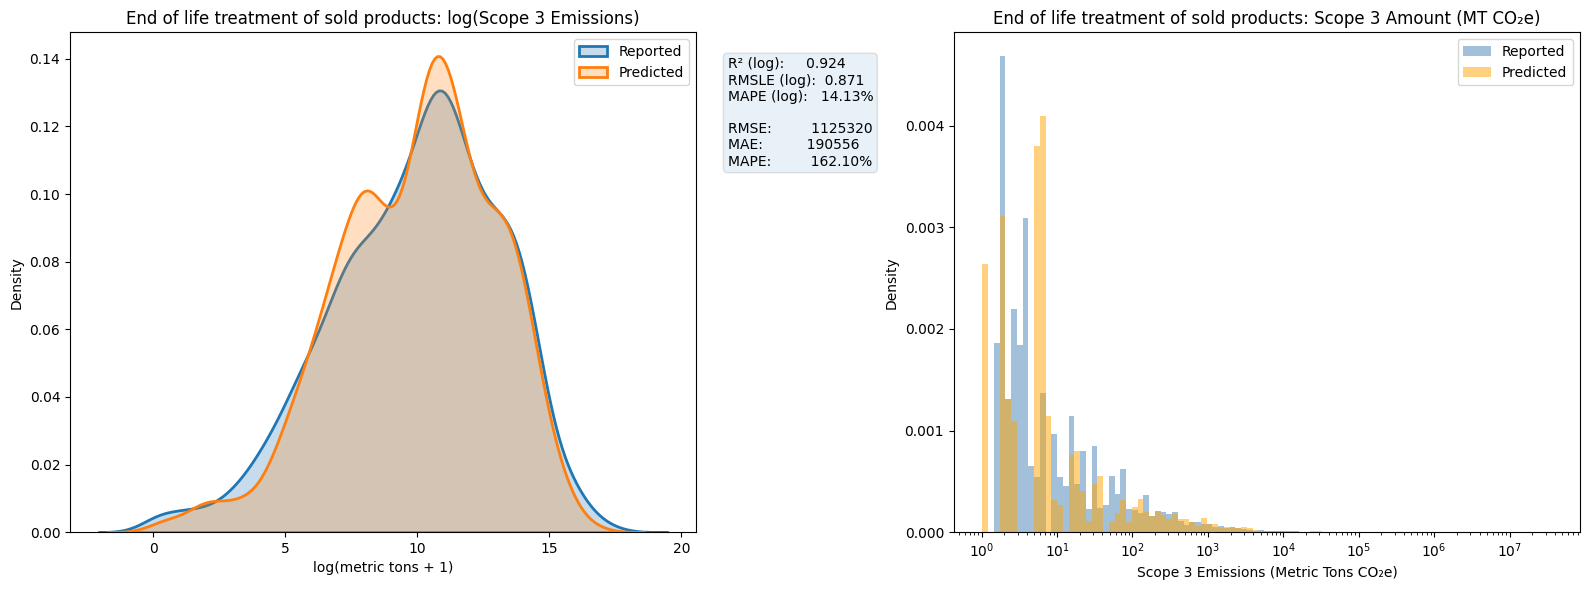

C:\Users\cliff\AppData\Local\Temp\ipykernel_11024\932212720.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tail_df.loc[:, "weight"] = 1 / (tail_df["Reported_Scope_3"] + 1)


 MAE Before:  190,556.45
 MAE After:   191,369.10
 MAPE Before: 162.10%
 MAPE After:  94.29%
 RMSLE Before: 0.8709
 RMSLE After:  2.0399


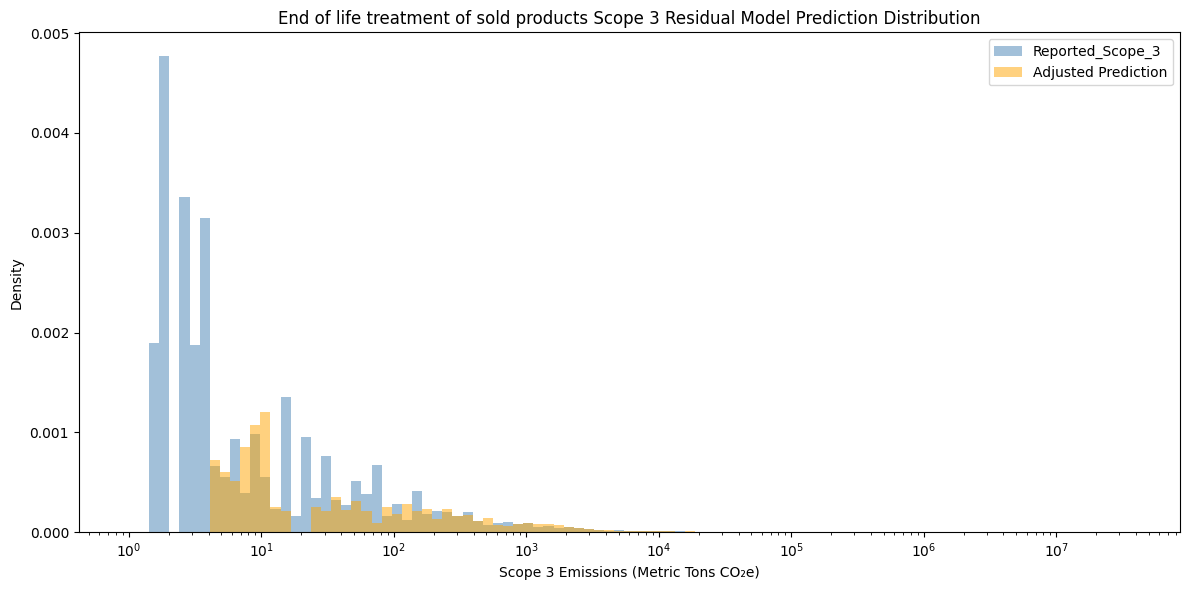

Converged using optimizer: lbfgs for group Franchises
Variance across Primary_sector: 5.3626

Group: Franchises --- Top 10 Influential Factors
                                    coef        pvalue
Company Var                     9.229322  8.231650e-08
log_cashAndCashEquivalents_USD  0.225093  7.482953e-02
log_totalLiabilities_USD        1.036989  8.955207e-02
log_totalDebt_USD              -0.299035  9.126399e-02
C(Year)[T.2021]                -0.290289  1.240584e-01
C(Country)[T.Norway]            5.202048  1.269038e-01
C(Country)[T.South Africa]      4.014950  1.375950e-01
C(Country)[T.Denmark]           4.953839  1.404574e-01
log_Market_Cap_USD             -0.178913  1.565554e-01
log_Revenue_USD                 0.403035  1.752518e-01


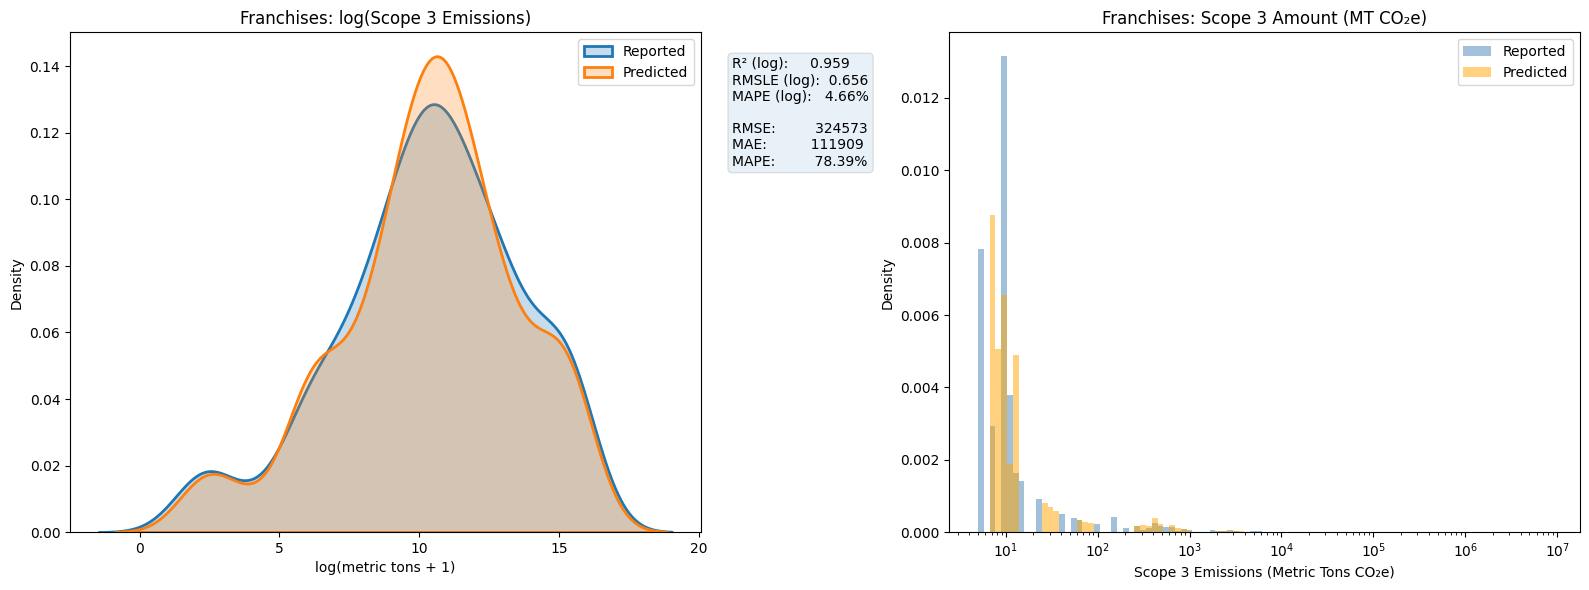

C:\Users\cliff\AppData\Local\Temp\ipykernel_11024\932212720.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tail_df.loc[:, "weight"] = 1 / (tail_df["Reported_Scope_3"] + 1)


 MAE Before:  111,909.15
 MAE After:   114,713.35
 MAPE Before: 78.39%
 MAPE After:  70.01%
 RMSLE Before: 0.6560
 RMSLE After:  1.8455


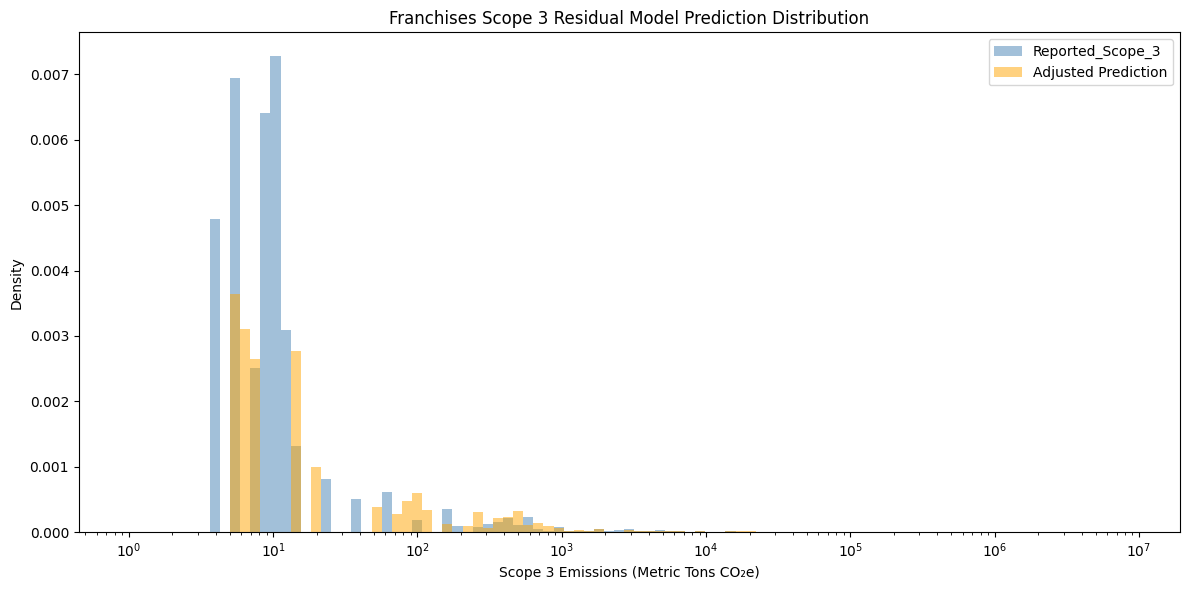

Converged using optimizer: lbfgs for group Fuel-and-energy-related activities (not included in Scope 1 or 2)
Variance across Primary_sector: 4.5992

Group: Fuel-and-energy-related activities (not included in Scope 1 or 2) --- Top 10 Influential Factors
                              coef        pvalue
Company Var               5.069934  3.340746e-65
log_grossProfit_USD      -0.024753  1.356579e-05
C(Year)[T.2023]           0.249643  1.440828e-05
log_Market_Cap_USD        0.111897  5.333524e-04
log_Revenue_USD           0.039057  9.736650e-04
C(Year)[T.2022]           0.178113  1.451405e-03
C(Country)[T.Bermuda]    -3.628768  2.524141e-02
log_totalLiabilities_USD  0.077178  2.843674e-02
C(Country)[T.Italy]       1.564624  3.011624e-02
C(Country)[T.USA]         0.985677  4.422564e-02


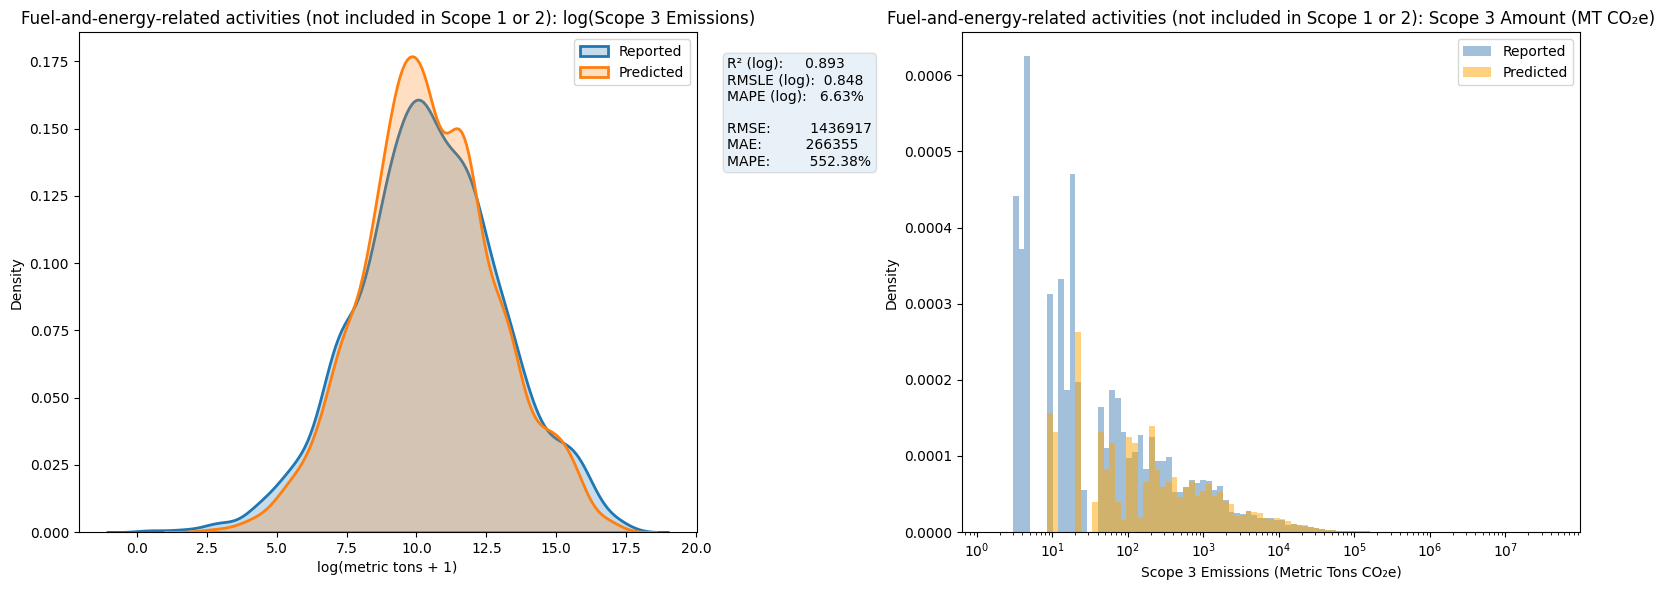

C:\Users\cliff\AppData\Local\Temp\ipykernel_11024\932212720.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tail_df.loc[:, "weight"] = 1 / (tail_df["Reported_Scope_3"] + 1)


 MAE Before:  266,354.86
 MAE After:   268,424.11
 MAPE Before: 552.38%
 MAPE After:  156.67%
 RMSLE Before: 0.8479
 RMSLE After:  1.9353


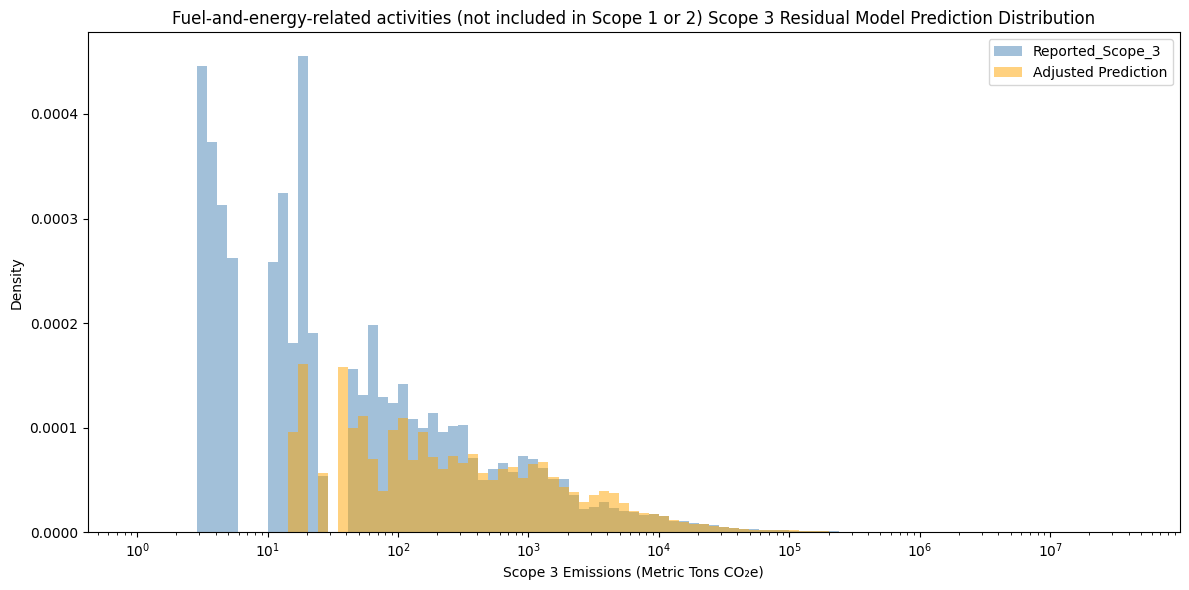

Converged using optimizer: lbfgs for group Investments
Variance across Primary_sector: 6.4991

Group: Investments --- Top 10 Influential Factors
                                    coef        pvalue
Company Var                     5.285424  3.071634e-17
C(Country)[T.Luxembourg]        6.619100  2.280411e-02
log_cashAndCashEquivalents_USD  0.187530  5.878722e-02
C(Country)[T.China]             1.955620  7.407580e-02
C(Country)[T.Thailand]          4.731773  8.592632e-02
C(Country)[T.South Africa]      2.216321  8.956747e-02
C(Country)[T.Mexico]            2.973129  8.961878e-02
C(Country)[T.Canada]            2.000064  1.251974e-01
C(Country)[T.Italy]             2.070984  1.281142e-01
C(Country)[T.Singapore]         3.117306  1.367490e-01


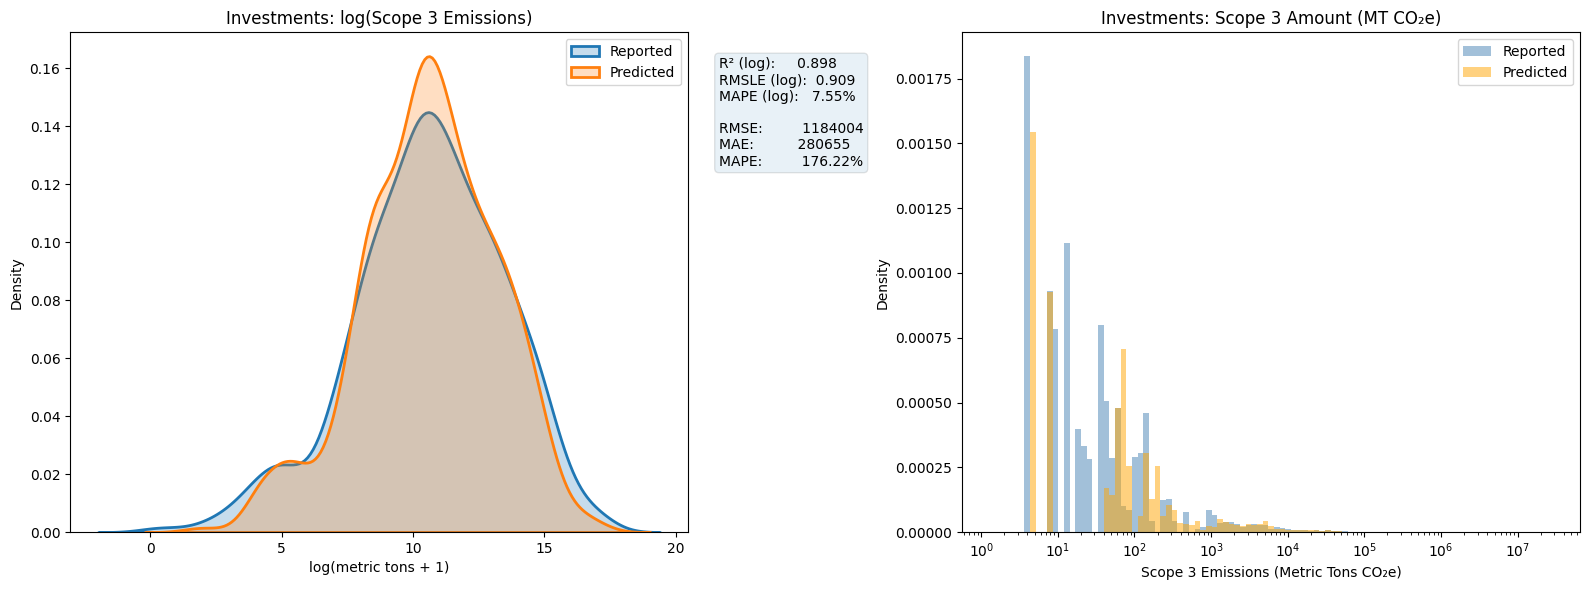

C:\Users\cliff\AppData\Local\Temp\ipykernel_11024\932212720.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tail_df.loc[:, "weight"] = 1 / (tail_df["Reported_Scope_3"] + 1)


 MAE Before:  280,654.50
 MAE After:   282,452.96
 MAPE Before: 176.22%
 MAPE After:  85.66%
 RMSLE Before: 0.9088
 RMSLE After:  2.2236


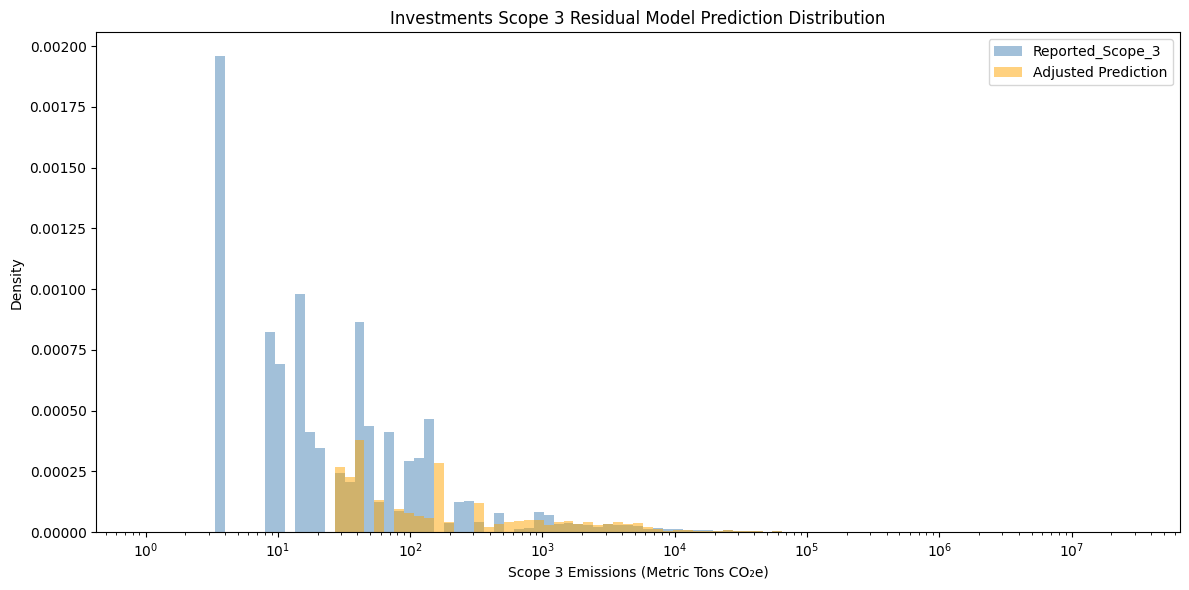

Converged using optimizer: lbfgs for group Other (downstream)
Variance across Primary_sector: 5.4292

Group: Other (downstream) --- Top 10 Influential Factors
                                coef    pvalue
log_totalDebt_USD           1.172267  0.000703
Company Var                12.311698  0.000753
C(Country)[T.Austria]       8.187800  0.007243
C(Country)[T.South Korea]   6.064288  0.013830
C(Country)[T.Sweden]        7.169077  0.021697
C(Country)[T.France]        4.008189  0.035236
C(Country)[T.Portugal]      6.023413  0.050295
C(Country)[T.Finland]       5.773050  0.052750
C(Country)[T.Canada]        5.970335  0.075266
log_totalAssets_USD        -0.740832  0.092363


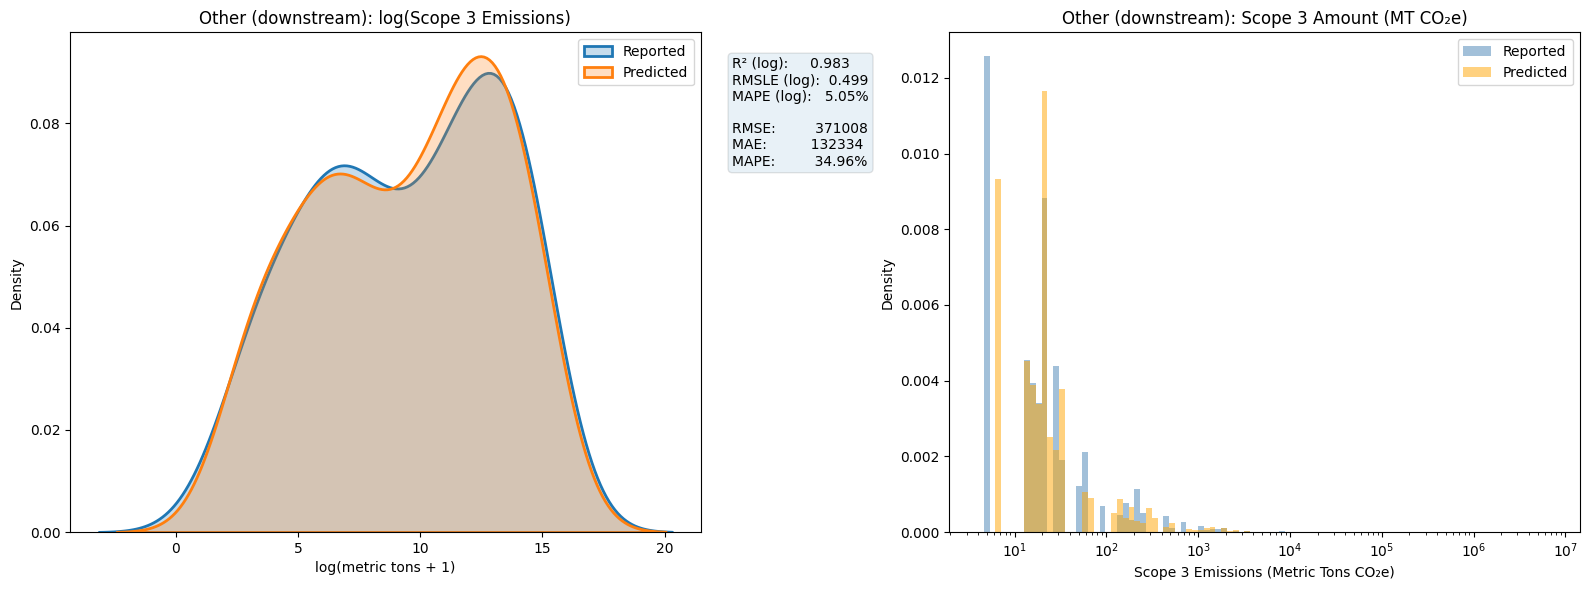

C:\Users\cliff\AppData\Local\Temp\ipykernel_11024\932212720.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tail_df.loc[:, "weight"] = 1 / (tail_df["Reported_Scope_3"] + 1)


 MAE Before:  132,334.00
 MAE After:   132,328.01
 MAPE Before: 34.96%
 MAPE After:  32.43%
 RMSLE Before: 0.4990
 RMSLE After:  0.4752


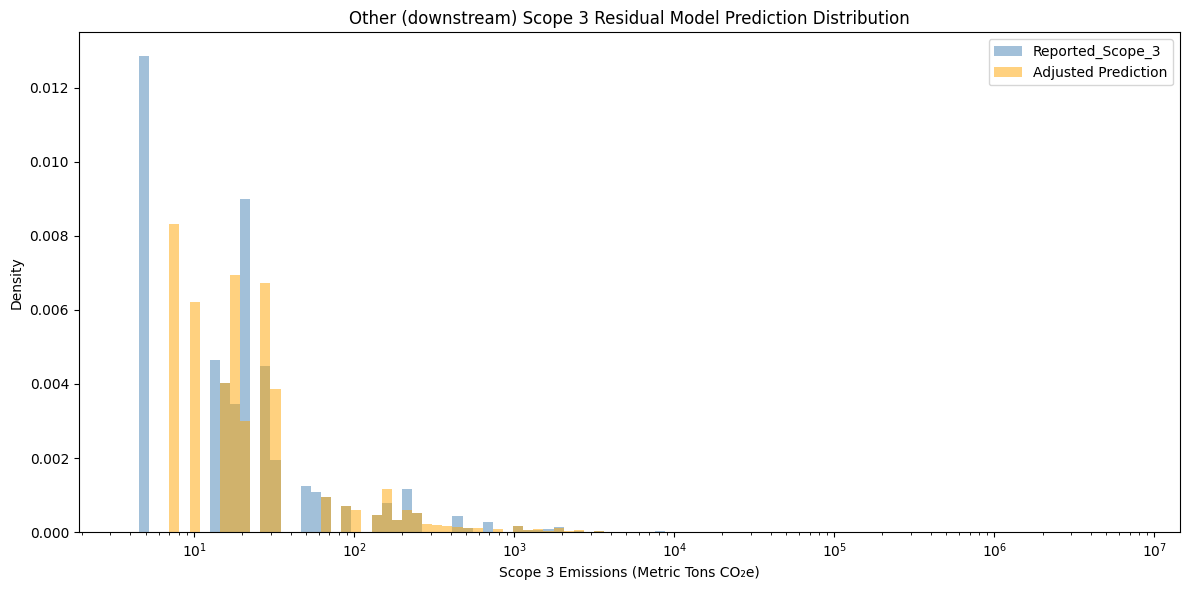

Converged using optimizer: lbfgs for group Other (upstream)
Variance across Primary_sector: 6.3473

Group: Other (upstream) --- Top 10 Influential Factors
                                     coef    pvalue
Company Var                     22.939396  0.000006
C(Year)[T.2023]                 -0.628227  0.001010
C(Year)[T.2022]                 -0.426175  0.010854
C(Year)[T.2021]                 -0.374870  0.015406
log_cashAndCashEquivalents_USD   0.301164  0.030492
log_Revenue_USD                  0.048133  0.058377
log_grossProfit_USD             -0.031580  0.073767
C(Country)[T.Netherlands]        3.752648  0.073971
C(Country)[T.Germany]            3.053330  0.092670
C(Year)[T.2020]                 -0.242367  0.114783


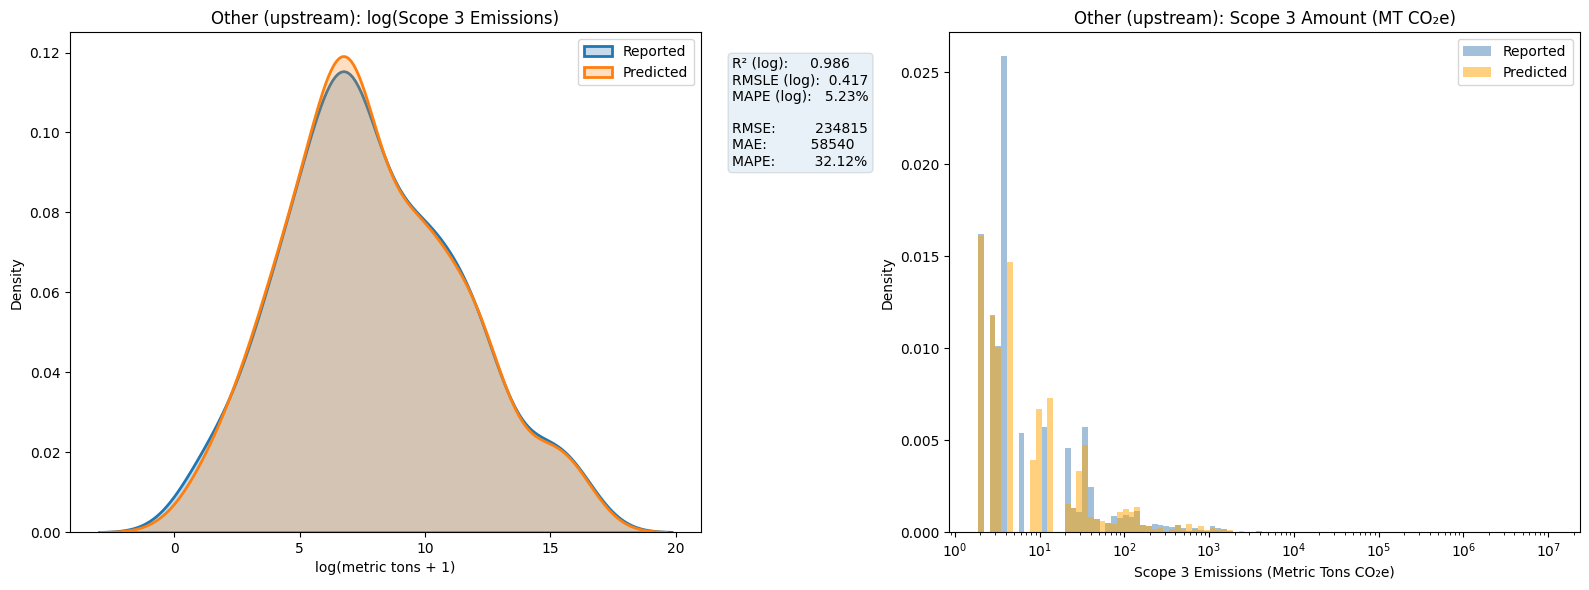

C:\Users\cliff\AppData\Local\Temp\ipykernel_11024\932212720.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tail_df.loc[:, "weight"] = 1 / (tail_df["Reported_Scope_3"] + 1)


 MAE Before:  58,540.39
 MAE After:   58,542.77
 MAPE Before: 32.12%
 MAPE After:  26.22%
 RMSLE Before: 0.4175
 RMSLE After:  0.4234


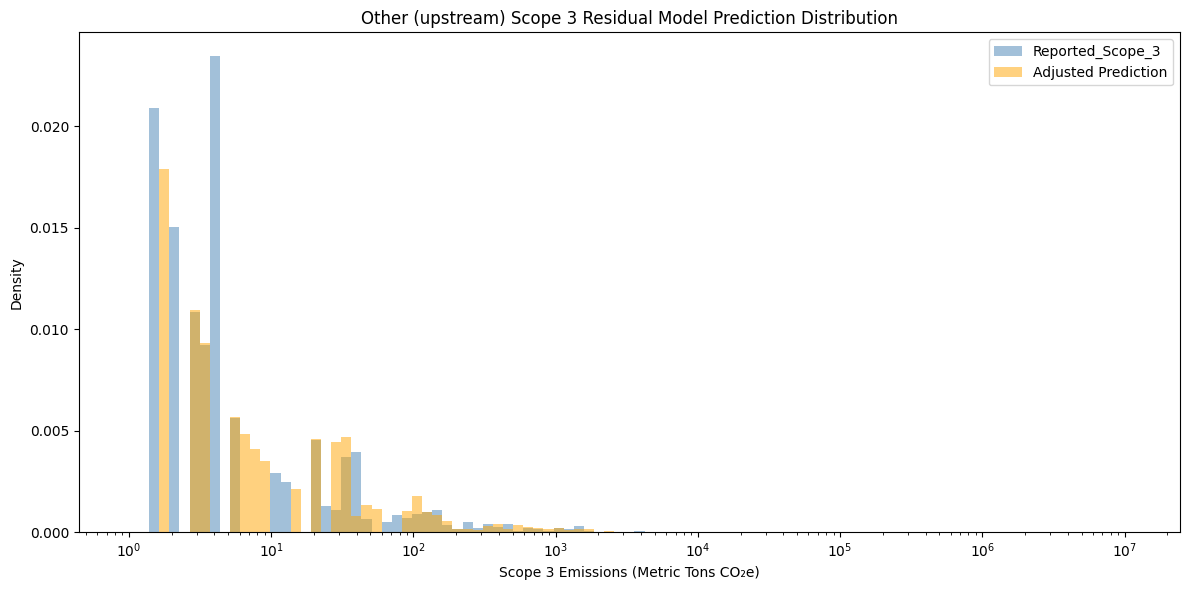

Converged using optimizer: lbfgs for group Processing of sold products
Variance across Primary_sector: 7.4159

Group: Processing of sold products --- Top 10 Influential Factors
                            coef        pvalue
Company Var            10.495943  2.451149e-12
C(Year)[T.2020]         0.278940  6.441003e-02
C(Country)[T.Denmark]  -5.845439  8.435010e-02
C(Country)[T.Belgium]   3.920677  1.611614e-01
log_totalAssets_USD     0.799394  1.616806e-01
log_Market_Cap_USD     -0.148584  1.690154e-01
C(Year)[T.2021]         0.195073  1.797953e-01
C(Country)[T.France]   -2.728415  2.253870e-01
C(Country)[T.Chile]     4.072671  2.361499e-01
C(Country)[T.Norway]   -2.856788  2.399863e-01


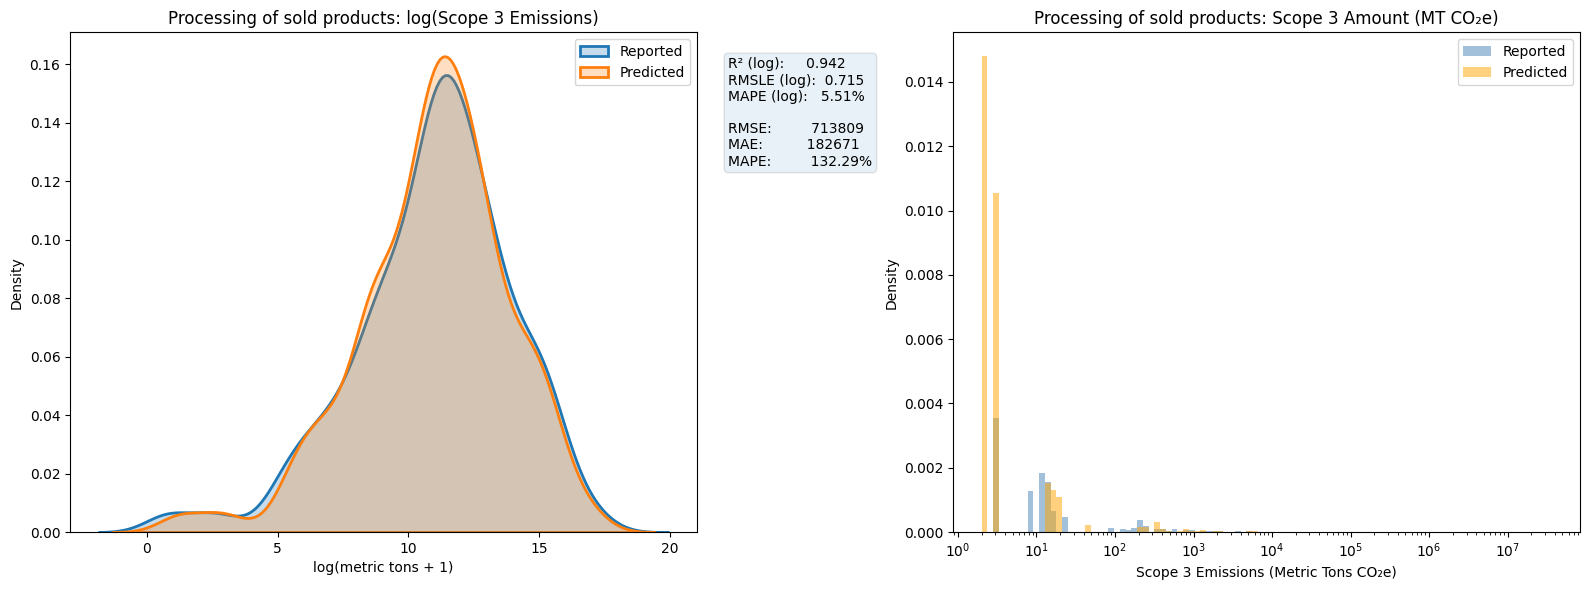

C:\Users\cliff\AppData\Local\Temp\ipykernel_11024\932212720.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tail_df.loc[:, "weight"] = 1 / (tail_df["Reported_Scope_3"] + 1)


 MAE Before:  182,671.38
 MAE After:   182,921.13
 MAPE Before: 132.29%
 MAPE After:  56.11%
 RMSLE Before: 0.7152
 RMSLE After:  1.2914


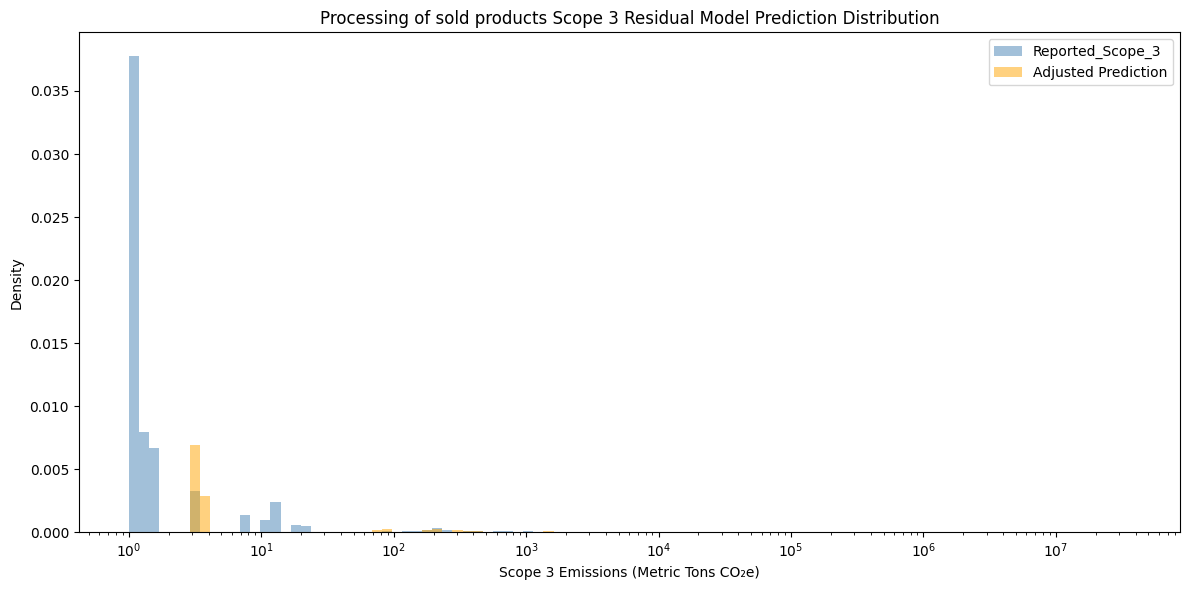

Converged using optimizer: lbfgs for group Purchased goods and services
Variance across Primary_sector: 6.7943

Group: Purchased goods and services --- Top 10 Influential Factors
                                coef        pvalue
Company Var                 6.390223  1.079506e-70
C(Year)[T.2023]             0.553447  1.627431e-20
C(Year)[T.2022]             0.418106  6.002567e-13
log_Revenue_USD             0.062767  1.069773e-04
C(Country)[T.South Africa] -2.710470  3.971596e-04
C(Country)[T.Brazil]       -2.679152  2.210376e-03
C(Country)[T.USA]           1.886704  3.425347e-03
C(Country)[T.Japan]         1.760601  6.599739e-03
C(Year)[T.2021]             0.156457  7.446048e-03
C(Country)[T.Bermuda]      -5.022028  1.121453e-02


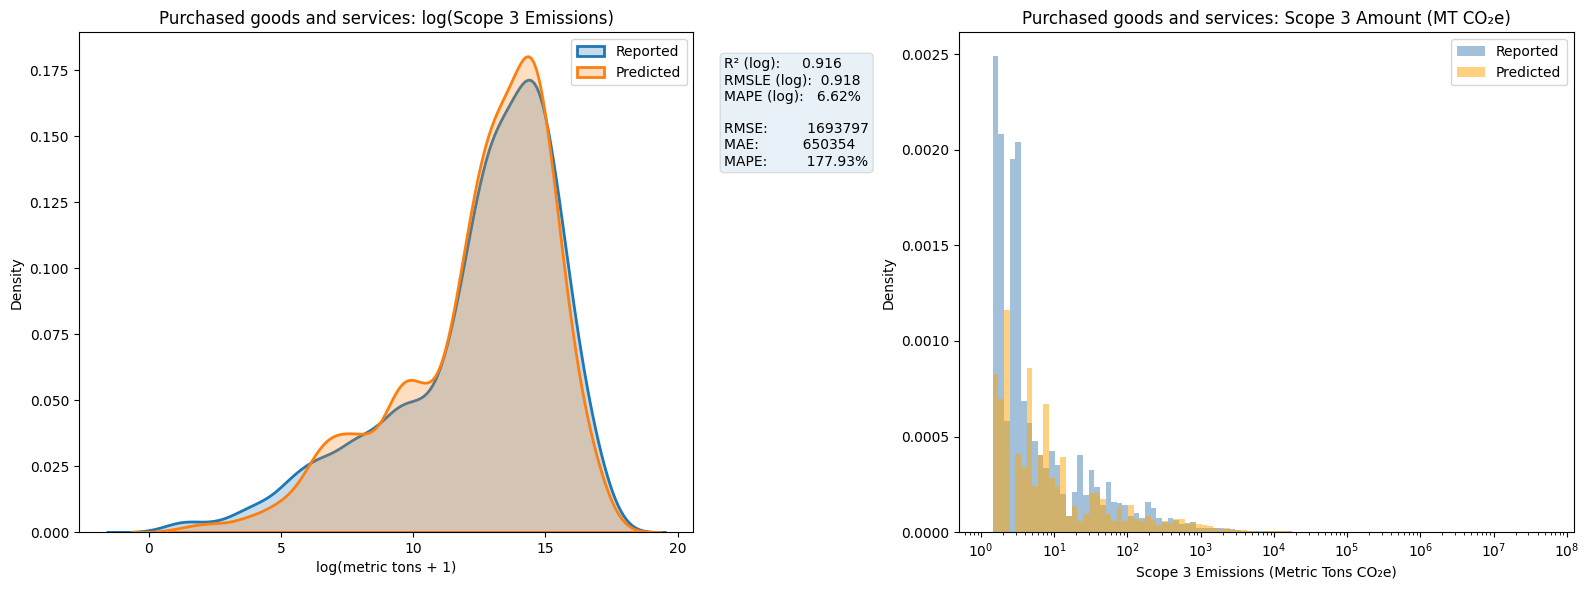

C:\Users\cliff\AppData\Local\Temp\ipykernel_11024\932212720.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tail_df.loc[:, "weight"] = 1 / (tail_df["Reported_Scope_3"] + 1)


 MAE Before:  650,354.14
 MAE After:   660,577.47
 MAPE Before: 177.93%
 MAPE After:  97.46%
 RMSLE Before: 0.9184
 RMSLE After:  2.4617


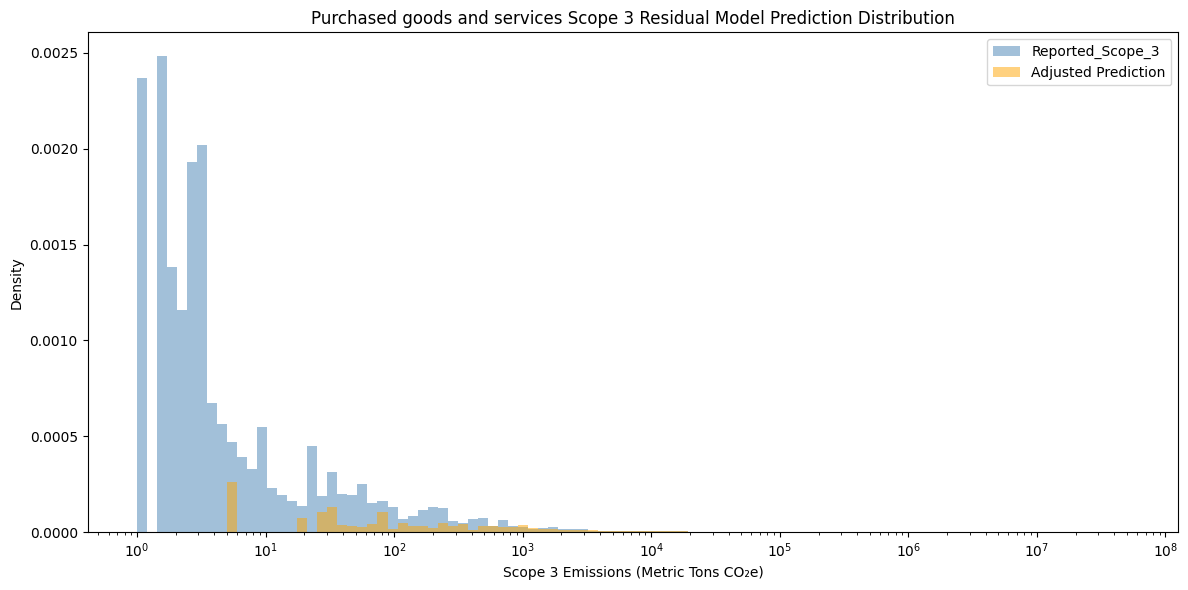

Converged using optimizer: lbfgs for group Upstream leased assets
Variance across Primary_sector: 3.7574

Group: Upstream leased assets --- Top 10 Influential Factors
                           coef        pvalue
Company Var            4.804494  7.238127e-21
log_Revenue_USD        0.659876  2.383992e-08
C(Year)[T.2022]       -0.466380  3.562782e-05
C(Country)[T.Japan]   -2.366911  8.121176e-04
C(Country)[T.Finland] -4.343995  1.765041e-03
C(Year)[T.2023]       -0.335565  3.343384e-03
C(Country)[T.China]   -2.606710  4.127949e-03
C(Country)[T.Canada]  -2.343394  5.126568e-03
C(Country)[T.USA]     -1.930925  5.303827e-03
C(Country)[T.Brazil]  -3.097157  1.120924e-02


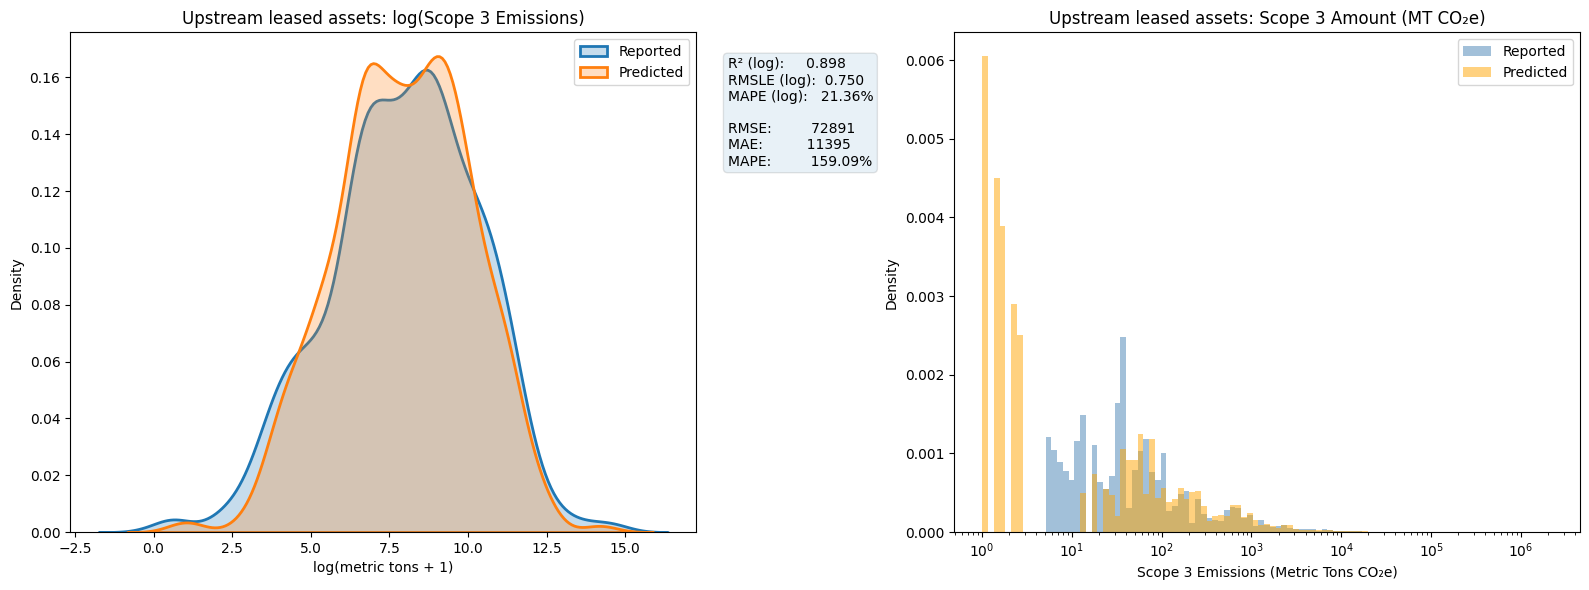

C:\Users\cliff\AppData\Local\Temp\ipykernel_11024\932212720.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tail_df.loc[:, "weight"] = 1 / (tail_df["Reported_Scope_3"] + 1)


 MAE Before:  11,395.10
 MAE After:   11,478.84
 MAPE Before: 159.09%
 MAPE After:  68.43%
 RMSLE Before: 0.7503
 RMSLE After:  1.4749


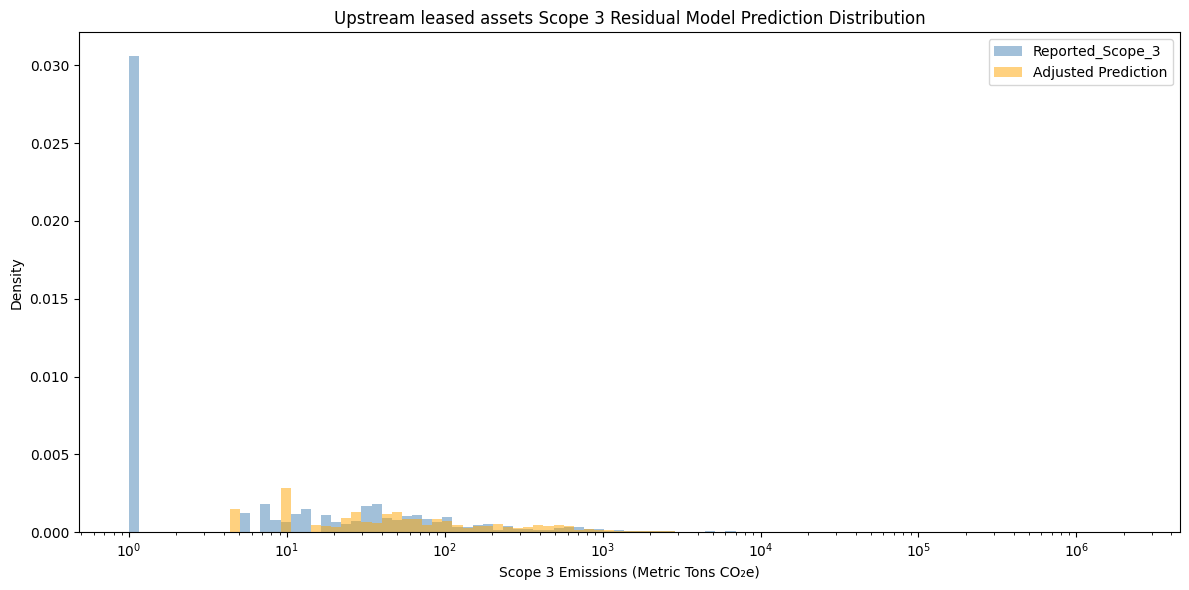

Converged using optimizer: lbfgs for group Upstream transportation and distribution
Variance across Primary_sector: 4.8841

Group: Upstream transportation and distribution --- Top 10 Influential Factors
                              coef        pvalue
Company Var               6.135599  9.085294e-56
C(Year)[T.2023]           0.464658  1.246772e-14
C(Year)[T.2022]           0.290975  7.562103e-07
log_Revenue_USD           0.089223  2.766261e-05
C(Country)[T.Singapore]  -4.492629  2.969783e-03
log_totalDebt_USD         0.040293  1.648298e-02
C(Country)[T.Bermuda]    -5.311505  2.467301e-02
C(Country)[T.Canada]     -1.859632  2.484357e-02
C(Country)[T.Peru]       -5.186321  2.693187e-02
C(Country)[T.Luxembourg]  5.031344  3.241354e-02


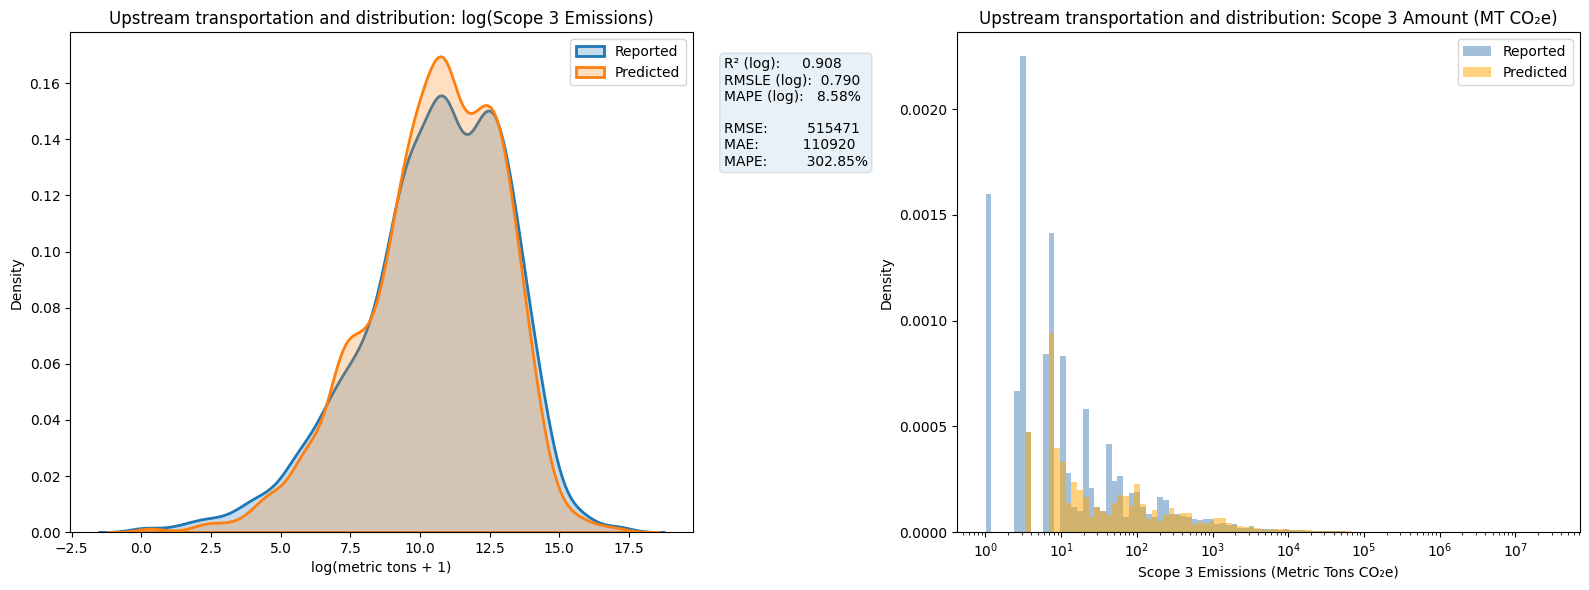

C:\Users\cliff\AppData\Local\Temp\ipykernel_11024\932212720.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tail_df.loc[:, "weight"] = 1 / (tail_df["Reported_Scope_3"] + 1)


 MAE Before:  110,920.12
 MAE After:   112,077.58
 MAPE Before: 302.85%
 MAPE After:  102.43%
 RMSLE Before: 0.7904
 RMSLE After:  1.8548


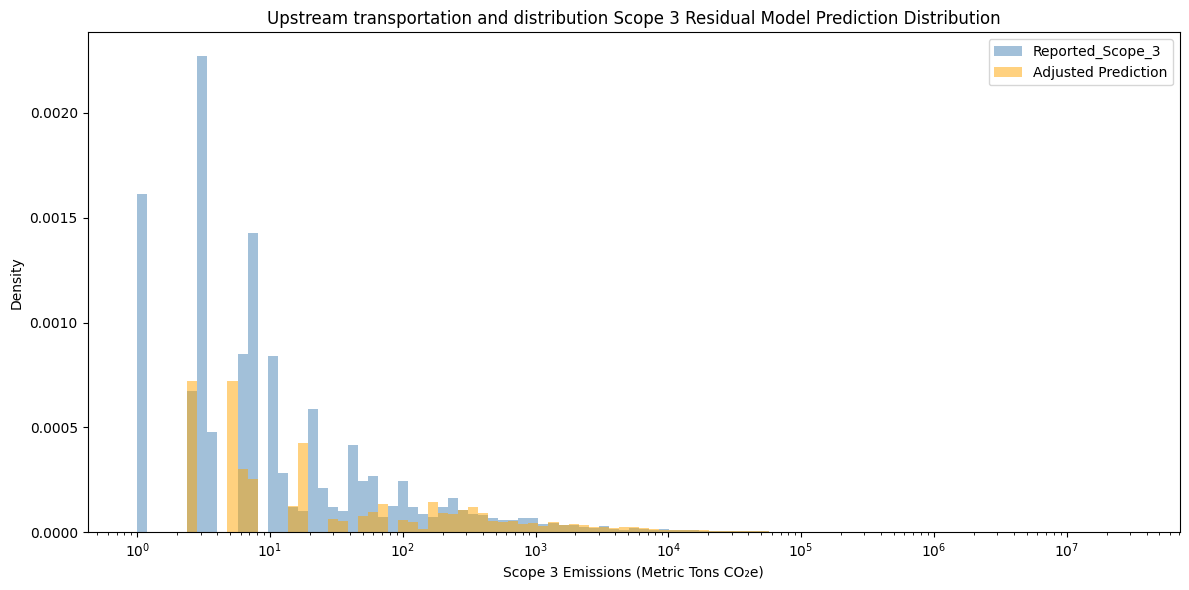

Converged using optimizer: lbfgs for group Use of sold products
Variance across Primary_sector: 7.6039

Group: Use of sold products --- Top 10 Influential Factors
                                     coef        pvalue
Company Var                     12.304400  2.679879e-39
C(Country)[T.South Korea]       -2.326124  5.382008e-02
C(Country)[T.Hungary]           -4.985897  9.138597e-02
C(Country)[T.Spain]             -2.071582  9.737809e-02
C(Country)[T.United Kingdom]    -1.705881  1.117340e-01
C(Country)[T.Netherlands]       -2.300906  1.285881e-01
log_cashAndCashEquivalents_USD   0.072323  1.390919e-01
C(Country)[T.Finland]           -1.869245  1.526429e-01
log_totalAssets_USD              0.217535  1.686027e-01
C(Country)[T.Switzerland]       -1.766788  1.765892e-01


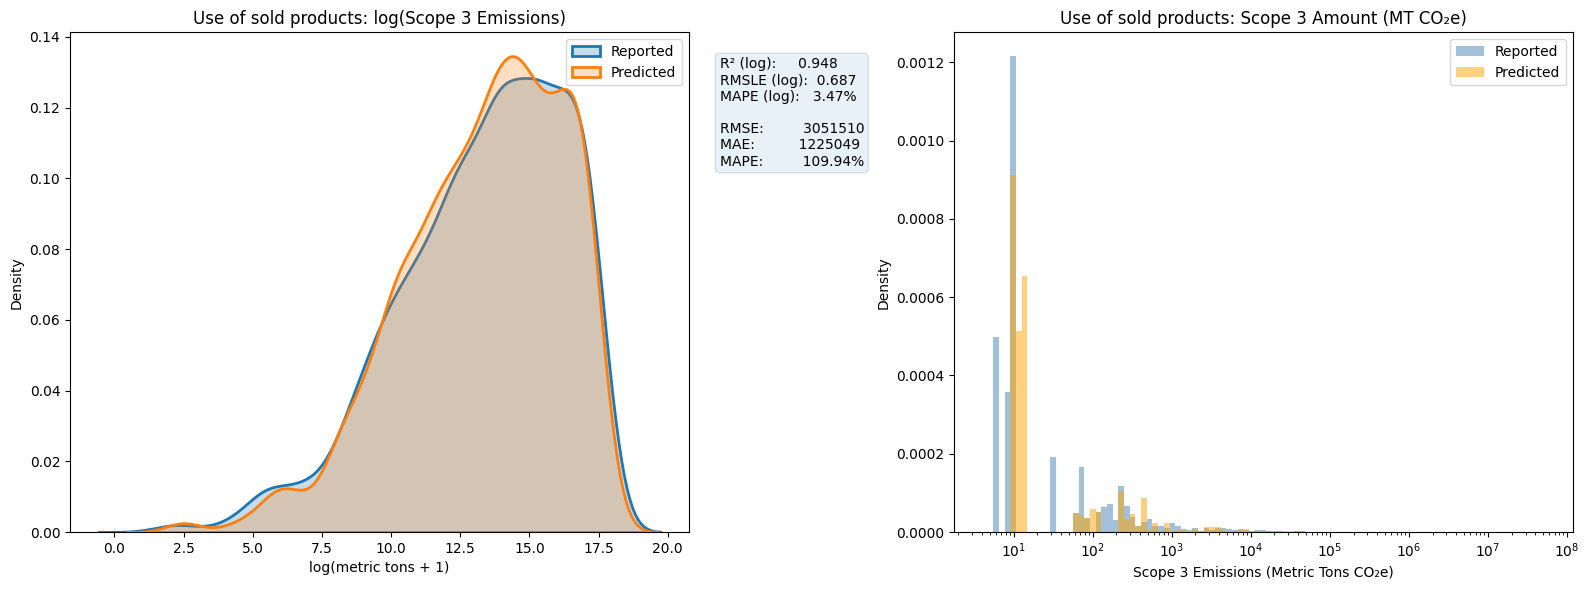

C:\Users\cliff\AppData\Local\Temp\ipykernel_11024\932212720.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tail_df.loc[:, "weight"] = 1 / (tail_df["Reported_Scope_3"] + 1)


 MAE Before:  1,225,049.46
 MAE After:   1,238,450.90
 MAPE Before: 109.94%
 MAPE After:  54.15%
 RMSLE Before: 0.6870
 RMSLE After:  2.3056


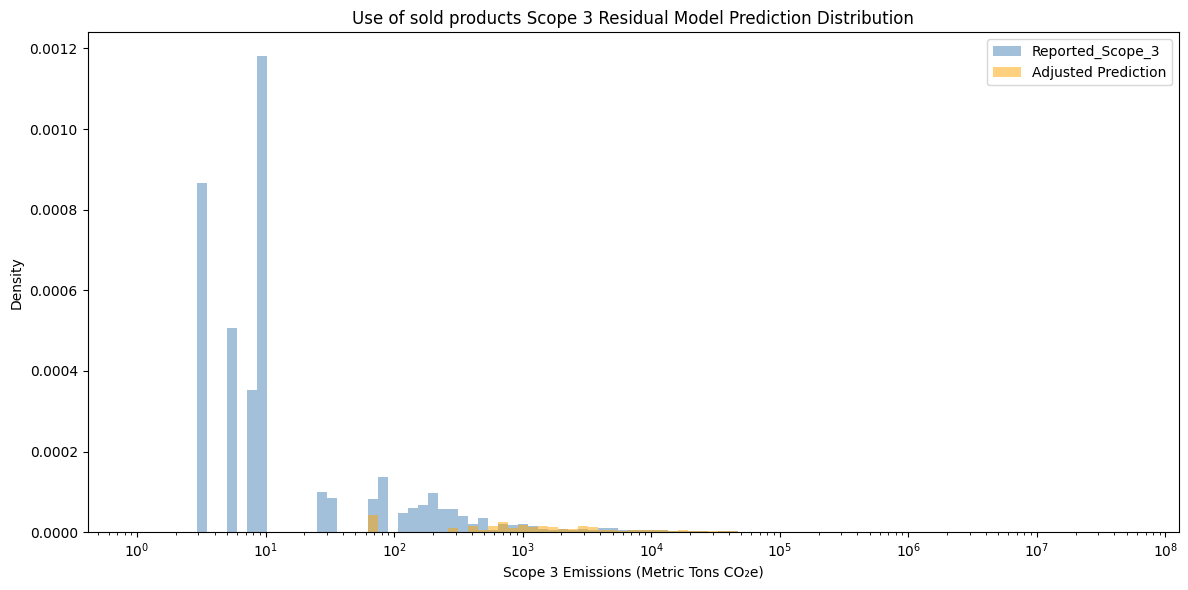

Converged using optimizer: lbfgs for group Waste generated in operations
Variance across Primary_sector: 4.4372

Group: Waste generated in operations --- Top 10 Influential Factors
                                  coef        pvalue
Company Var                   5.587234  5.233184e-67
log_Market_Cap_USD            0.112264  2.646501e-04
log_Revenue_USD               0.040291  3.695185e-04
C(Country)[T.Bermuda]        -4.916465  2.060976e-03
C(Country)[T.Norway]         -2.123574  2.771494e-03
C(Year)[T.2023]               0.136964  1.026144e-02
log_grossProfit_USD          -0.015123  1.060548e-02
C(Country)[T.India]          -1.879138  2.035166e-02
log_totalDebt_USD             0.033337  3.078751e-02
C(Country)[T.United Kingdom] -1.122852  3.452070e-02


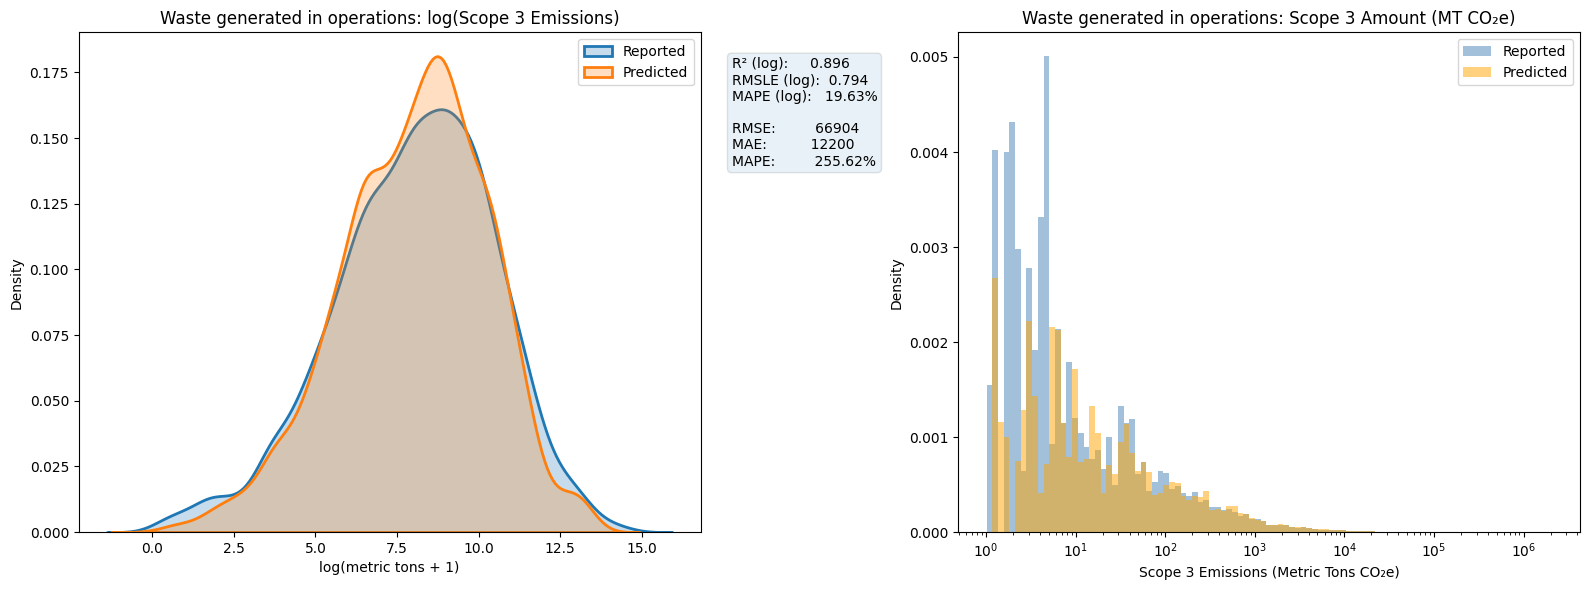

C:\Users\cliff\AppData\Local\Temp\ipykernel_11024\932212720.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tail_df.loc[:, "weight"] = 1 / (tail_df["Reported_Scope_3"] + 1)


 MAE Before:  12,199.62
 MAE After:   12,281.49
 MAPE Before: 255.62%
 MAPE After:  65.80%
 RMSLE Before: 0.7936
 RMSLE After:  1.3266


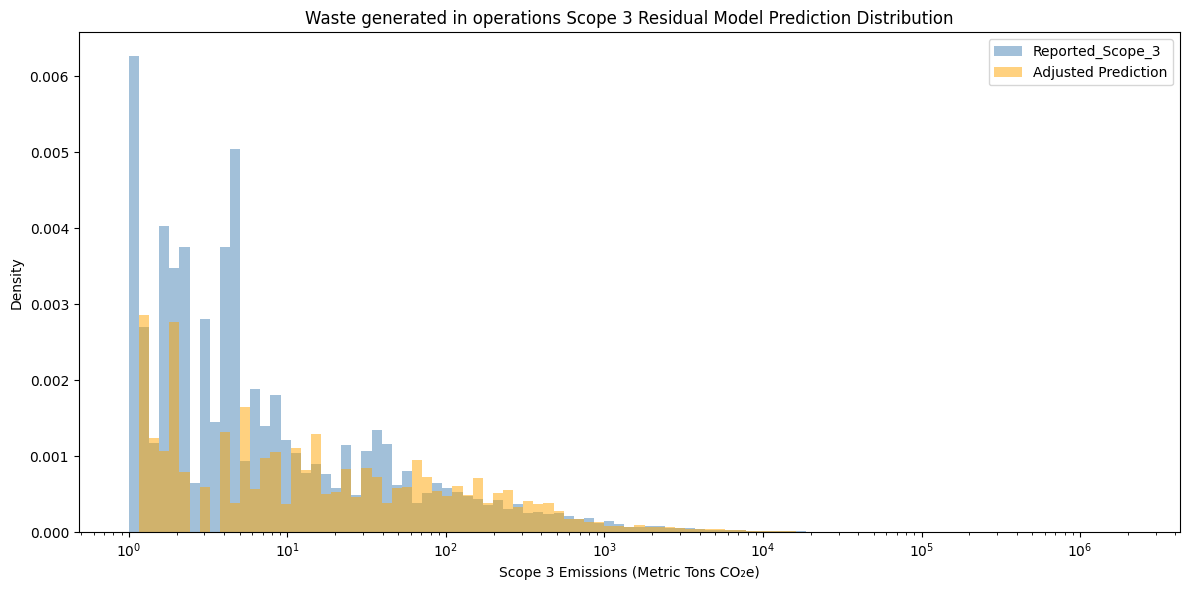


Summary of Model Performance Metrics by Scope-3 Source:



R²(log)%  \
financial_feature_stats                                                 NaN   
Business travel                                                        85.2   
Capital goods                                                          86.1   
Downstream leased assets                                               94.2   
Downstream transportation and distribution                             89.3   
Employee commuting                                                     89.9   
End of life treatment of sold products                                 92.4   
Franchises                                                             95.9   
Fuel-and-energy-related activities (not included in Scope 1 or 2)      89.3   
Investments                                                            89.8   
Other (downstream)                                                     98.3   
Other (upstream)                                                       98.6   
Processing of sold products                                            94.2   
Purchased goods and services                                           91.6   
Upstream leased assets                                                 89.8   
Upstream transportation and distribution                               90.8   
Use of sold products                                                   94.8   
Waste generated in operations                                          89.6   

                                                                   MAPE_orig%  \
financial_feature_stats                                                   NaN   
Business travel                                                          61.6   
Capital goods                                                           147.2   
Downstream leased assets                                                 57.8   
Downstream transportation and distribution                               74.9   
Employee commuting                                                       50.5   
End of life treatment of sold products                                   94.3   
Franchises                                                               70.0   
Fuel-and-energy-related activities (not included in Scope 1 or 2)       156.7   
Investments                                                              85.7   
Other (downstream)                                                       32.4   
Other (upstream)                                                         26.2   
Processing of sold products                                              56.1   
Purchased goods and services                                             97.5   
Upstream leased assets                                                   68.4   
Upstream transportation and distribution                                102.4   
Use of sold products                                                     54.1   
Waste generated in operations                                            65.8   

                                                                   MAPE_log%  \
financial_feature_stats                                                  NaN   
Business travel                                                          8.2   
Capital goods                                                           10.1   
Downstream leased assets                                                 5.6   
Downstream transportation and distribution                             111.7   
Employee commuting                                                      15.4   
End of life treatment of sold products                                  14.1   
Franchises                                                               4.7   
Fuel-and-energy-related activities (not included in Scope 1 or 2)        6.6   
Investments                                                              7.5   
Other (downstream)                                                       5.0   
Other (upstream)                                                 

In [61]:


# Remove zero values BEFORE log transformation and create a log target column.
prepped_df = prepped_df[prepped_df["Scope 3 Amount"] > 0].copy()
prepped_df["log_Scope_3_Amount"] = np.log1p(prepped_df["Scope 3 Amount"])

# Then group by "Scope 3 Sources" to create the dictionary of dataframes.
grouped_dfs = {
    group_name: group_df.copy()
    for group_name, group_df in prepped_df.groupby('Scope 3 Sources')
}

# Define the list of continuous variables.
numeric_cols = ['Scope 3 Amount', 'Revenue_USD', 'Market_Cap_USD', 
                'ebitda_USD', 'grossProfit_USD', 'netIncome_USD', 'cashAndCashEquivalents_USD', 
                'longTermInvestments_USD', 'totalAssets_USD', 'totalLiabilities_USD', 
                'totalInvestments_USD', 'totalDebt_USD', 'totalEquity_USD', 'country_ghg_avg', 'country_population_avg']

# Signed log transformation function.
def signed_log(x):
    return np.sign(x) * np.log(np.abs(x) + 1)

# Dictionary to collect metrics for each group.
metrics_results = {}

feature_pvals = {}
feature_coefs = {}

# Only the “financial” predictors from numeric_cols (exclude Scope 3 Amount and country averages)
fin_cols = [col for col in numeric_cols 
            if col not in ('Scope 3 Amount', 'country_ghg_avg', 'country_population_avg')]

# Build the list of model feature names
all_feats = [f'log_{col.replace(" ", "_").replace("/", "_")}' for col in fin_cols]


# Loop over each group in the dictionary.
for group_name, df in grouped_dfs.items():
    for col in numeric_cols:
        new_col = f'log_{col.replace(" ", "_").replace("/", "_")}'
        df[new_col] = df[col].apply(signed_log)

    df['Year'] = df['Year of Data'].astype(str)
    df['Scope3_Source'] = df['Scope 3 Sources'].astype(str)
    df['Country'] = df['Countries'].astype(str)
    df['Company'] = df['Company Name'].astype(str)
    
    df['ThirdParty_Verification'] = df['Third_Party_Verification'].astype(str)
    df['Primary_activity'] = df['Primary activity'].astype(str)
    df['Primary_sector'] = df['Primary sector'].astype(str)

        # Drop rows with NA after transformations
    df = df.dropna(subset=[  # Include all needed predictors here
        'log_Revenue_USD', 'log_Market_Cap_USD', 'log_ebitda_USD', 
        'log_grossProfit_USD', 'log_netIncome_USD', 'log_cashAndCashEquivalents_USD',
        'log_longTermInvestments_USD', 'log_totalAssets_USD', 'log_totalLiabilities_USD',
        'log_totalInvestments_USD', 'log_totalDebt_USD', 'log_totalEquity_USD',
        'log_Scope_3_Amount'
    ]).reset_index(drop=True)


    formula = (
        "log_Scope_3_Amount ~ log_Revenue_USD + "
        "log_Market_Cap_USD + log_grossProfit_USD + " #log_netIncome_USD + "   # + log_ebitda_USD
        "log_cashAndCashEquivalents_USD + log_totalAssets_USD + "  # + log_longTermInvestments_USD
        "log_totalLiabilities_USD + log_totalDebt_USD + "  # + log_totalInvestments_USD log_totalEquity_USD + 
        "C(Year) + C(Country)"  #+ C(Primary_activity) 
    )

    model = smf.mixedlm(formula, df, groups=df["Primary_sector"],
                        vc_formula={"Company": "0 + C(Company)"})
    result = None



    # Try multiple optimizers
    optimizers = ['lbfgs', 'cg', 'bfgs', 'nm']
    for opt in optimizers:
        try:
            with warnings.catch_warnings():
                warnings.filterwarnings("ignore")
                result = model.fit(method=opt, reml=False)
            if result.converged:
                print(f"Converged using optimizer: {opt} for group {group_name}")
                break
        except Exception as e:
            print(f"Failed with optimizer {opt} for group {group_name}: {e}")

    if result is None or not result.converged:
        print(f"Model did not converge for group {group_name}.")
        continue
    # Store p-values and coefficients
    coef_df = pd.DataFrame({
        'coef': result.params,
        'pvalue': result.pvalues
    })

        # Extract p-values and coefficients for each feature
    pvals = {feat: result.pvalues.get(feat, np.nan) for feat in all_feats}
    coefs = {feat: result.params.get(feat, np.nan)  for feat in all_feats}
    
    feature_pvals[group_name] = pvals
    feature_coefs[group_name] = coefs
    # Remove intercept for ranking
    if "Intercept" in coef_df.index:
        coef_df = coef_df.drop(index="Intercept")

    # Collect only financial feature results
    financial_vars = [f'log_{col.replace(" ", "_").replace("/", "_")}' for col in numeric_cols if 'Scope' not in col]
    financial_pvals = coef_df.loc[coef_df.index.isin(financial_vars)][['coef', 'pvalue']]

    # Store in dictionary
    if 'financial_feature_stats' not in metrics_results:
        metrics_results['financial_feature_stats'] = {}

    for var in financial_pvals.index:
        if var not in metrics_results['financial_feature_stats']:
            metrics_results['financial_feature_stats'][var] = []
        metrics_results['financial_feature_stats'][var].append({
            'group': group_name,
            'coef': financial_pvals.loc[var, 'coef'],
            'pvalue': financial_pvals.loc[var, 'pvalue']
        })

    # Print the top 10 most influential overall (based on p-value)
    coef_df = coef_df.sort_values(by='pvalue')
    top10 = coef_df.head(10)


    try:
        group_var = result.vcomp[0]  # Primary_sector
        company_var = result.vcomp[1] if len(result.vcomp) > 1 else np.nan
        residual_var = result.vcomp[-1]
        print(f"Variance across Primary_sector: {group_var:.4f}")

    except Exception as e:
        print(f"Could not extract variance components for group {group_name}: {e}")

    print(f"\nGroup: {group_name} --- Top 10 Influential Factors")
    print(top10)

    df['Predicted_log_Scope_3'] = result.fittedvalues
    df['Reported_log_Scope_3'] = df["log_Scope_3_Amount"]
    df['Predicted_Scope_3'] = np.expm1(df['Predicted_log_Scope_3'])
    df['Reported_Scope_3'] = np.expm1(df['Reported_log_Scope_3'])


    r2_log = r2_score(df['Reported_log_Scope_3'], df['Predicted_log_Scope_3'])
    # percentage version of R² on the log scale
    r2_pct = r2_log * 100

    rmsle_log = np.sqrt(((df['Reported_log_Scope_3'] - df['Predicted_log_Scope_3']) ** 2).mean())
    epsilon = 1e-10
    mape_log = np.mean(np.abs((df['Reported_log_Scope_3'] - df['Predicted_log_Scope_3']) / (df['Reported_log_Scope_3'] + epsilon))) * 100
    rmse_orig = np.sqrt(mean_squared_error(df['Reported_Scope_3'], df['Predicted_Scope_3']))
    mae_orig = mean_absolute_error(df['Reported_Scope_3'], df['Predicted_Scope_3'])
    mape_orig = np.mean(np.abs((df['Reported_Scope_3'] - df['Predicted_Scope_3']) / df['Reported_Scope_3'])) * 100

    metrics_results[group_name] = {
        "R2_log": r2_log,
        "RMSLE_log": rmsle_log,
        "MAPE_log": mape_log,
        "RMSE_orig": rmse_orig,
        "MAE_orig": mae_orig,
        "MAPE_orig": mape_orig,
    }

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    sns.kdeplot(df['Reported_log_Scope_3'], label='Reported', linewidth=2, fill=True, ax=axes[0])
    sns.kdeplot(df['Predicted_log_Scope_3'], label='Predicted', linewidth=2, fill=True, ax=axes[0])
    axes[0].set_title(f"{group_name}: log(Scope 3 Emissions)")
    axes[0].set_xlabel("log(metric tons + 1)")
    axes[0].set_ylabel("Density")
    axes[0].legend()

    metrics_text = (
        f"R² (log):     {r2_log:.3f}\n"
        f"RMSLE (log):  {rmsle_log:.3f}\n"
        f"MAPE (log):   {mape_log:.2f}%\n\n"
        f"RMSE:         {rmse_orig:.0f}\n"
        f"MAE:          {mae_orig:.0f}\n"
        f"MAPE:         {mape_orig:.2f}%"
    )
    axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                 verticalalignment='top', fontsize=10, bbox=dict(boxstyle='round', alpha=0.1))

    y_test_exp = df['Reported_Scope_3']
    y_pred_exp = df['Predicted_Scope_3']
    min_val = min(y_test_exp.min(), y_pred_exp.min())
    max_val = max(y_test_exp.max(), y_pred_exp.max())
    log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)

    sns.histplot(y_test_exp, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported", ax=axes[1])
    sns.histplot(y_pred_exp, bins=log_bins, stat="density", color="orange", alpha=0.5, label="Predicted", ax=axes[1])
    axes[1].set_xscale("log")
    axes[1].set_title(f"{group_name}: Scope 3 Amount (MT CO₂e)")
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    axes[1].set_ylabel("Density")
    axes[1].legend()

    plt.tight_layout()
    plt.show()



    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_absolute_error, mean_squared_log_error
    import numpy as np
    
    # Compute residuals
    df['residual'] = df['Reported_Scope_3'] - df['Predicted_Scope_3']
    
    #  Select features for residual modeling
    features_for_resid = [
        'log_Revenue_USD', 'log_Market_Cap_USD', 'log_ebitda_USD',
        'log_grossProfit_USD', 'log_cashAndCashEquivalents_USD',
        'log_totalAssets_USD', 'log_totalLiabilities_USD', 'log_totalDebt_USD'
    ]

    #  focus on lower 25% of true values for training residual model
    q25 = df['Reported_Scope_3'].quantile(0.25)
    tail_df = df[df['Reported_Scope_3'] < q25]
    

    # Compute weights: inverse of actual values to down-weight large emitters
    tail_df.loc[:, "weight"] = 1 / (tail_df["Reported_Scope_3"] + 1)

    #Train residual model
    residual_model = RandomForestRegressor(n_estimators=100, random_state=0)
    residual_model.fit(tail_df[features_for_resid], tail_df['residual'], sample_weight=tail_df['weight'])
    
    #Predict residuals for all data
    df['residual_adjustment'] = residual_model.predict(df[features_for_resid])
    
    #Adjust the original predictions
    df['adjusted_prediction'] = df['Predicted_Scope_3'] + df['residual_adjustment']
    df['adjusted_prediction'] = df['adjusted_prediction'].clip(lower=0)  # Avoid negatives
    
    #Evaluation metrics
    mae_before = mean_absolute_error(df['Reported_Scope_3'], df['Predicted_Scope_3'])
    mae_after = mean_absolute_error(df['Reported_Scope_3'], df['adjusted_prediction'])
    
    mape_safe = lambda y_true, y_pred: np.mean(
        np.abs((y_true - y_pred) / np.clip(y_true, 1e-10, None))) * 100
    
    mape_before = mape_safe(df['Reported_Scope_3'], df['Predicted_Scope_3'])
    mape_after = mape_safe(df['Reported_Scope_3'], df['adjusted_prediction'])
    
    rmsle_before = np.sqrt(mean_squared_log_error(df['Reported_Scope_3'], df['Predicted_Scope_3']))
    rmsle_after = np.sqrt(mean_squared_log_error(df['Reported_Scope_3'], df['adjusted_prediction']))

    # update results dict
    metrics_results[group_name] = {
        "R²(log)%":   f"{r2_pct:.1f}",
        "MAPE_orig%": f"{mape_after:.1f}",
        "MAPE_log%":  f"{mape_log:.1f}",
        "RMSLE":      f"{rmsle_after:.2f}",
        "RMSE_orig":  f"{rmse_orig:.2f}",
        "MAE_orig":   f"{mae_after:.2f}",
    }

    
    #Print results
    print(f" MAE Before:  {mae_before:,.2f}")
    print(f" MAE After:   {mae_after:,.2f}")
    print(f" MAPE Before: {mape_before:.2f}%")
    print(f" MAPE After:  {mape_after:.2f}%")
    print(f" RMSLE Before: {rmsle_before:.4f}")
    print(f" RMSLE After:  {rmsle_after:.4f}")

    # Histogram comparison styled like your reference
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    
    y_pred_exp = df['Reported_Scope_3']
    y_adj_exp = df['adjusted_prediction']
    min_val = min(y_pred_exp.min(), y_adj_exp.min())
    max_val = max(y_pred_exp.max(), y_adj_exp.max())
    log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)
    
    sns.histplot(y_pred_exp, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported_Scope_3", ax=ax)
    sns.histplot(y_adj_exp, bins=log_bins, stat="density", color="orange", alpha=0.5, label="Adjusted Prediction", ax=ax)
    
    ax.set_xscale("log")
    ax.set_title(f"{group_name} Scope 3 Residual Model Prediction Distribution")
    ax.set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    ax.set_ylabel("Density")
    ax.legend()
    
    plt.tight_layout()
    plt.show()

# Convert to DataFrames
pvals_df = pd.DataFrame(feature_pvals)
coefs_df = pd.DataFrame(feature_coefs)

# Convert the nested metrics_results dictionary to a DataFrame
metrics_df = pd.DataFrame.from_dict(metrics_results, orient='index')

# Optionally, sort the index for readability
metrics_df = metrics_df.sort_index()

# drop the 'financial_feature_stats' row if it exists
metrics_df = metrics_df.drop(index='financial_feature_stats', errors='ignore')

# ───────────────── summary display ───────────────────────────────────────
summary_cols = ["R²(log)%","MAPE_orig%","MAPE_log%","RMSLE","RMSE_orig","MAE_orig"]
print("\nSummary of Model Performance Metrics by Scope-3 Source:\n")
display(pd.DataFrame(metrics_results).T[summary_cols].astype(float).round(2))

ghg_df_feature_red_Residual_mod = pd.DataFrame(metrics_results).T[summary_cols].astype(float).round(2)
ghg_df_feature_red_Residual_modeling = ghg_df_feature_red_Residual_mod[summary_cols].copy()

In [ ]:
# ───────────────── summary display ───────────────────────────────────────
summary_cols = ["R²(log)%","MAPE_orig%","MAPE_log%","RMSLE","RMSE_orig","MAE_orig"]
print("\nSummary of Model Performance Metrics by Scope-3 Source:\n")
display(pd.DataFrame(metrics_results).T[summary_cols].astype(float).round(2))

ghg_df_feature_red_Residual_mod = pd.DataFrame(metrics_results).T[summary_cols].astype(float).round(2)
ghg_df_feature_red_Residual_modeling = ghg_df_feature_red_Residual_mod[summary_cols].copy()

In [ ]:

ghg_df_feature_red_Residual_modeling.to_csv(
    r"C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\Corporate_Data\ghg_HLM_feat_reduced_w_resid_mod.csv"
)

# References:

Bobbitt, Z. (2021, May 10). How to interpret MAPE values. Statology. https://www.statology.org/how-to-interpret-mape/
GHG Protocol. (n.d.). Scope 3 calculation guidance: Making corporate value chain accounting easier than ever. World Resources Institute. Retrieved April 29, 2025, from https://ghgprotocol.org/scope-3-calculation-guidance-2

Brownlee, J. (2020, April 24). How to model residual errors to correct time series forecasts with Python. Machine Learning Mastery. Retrieved from https://machinelearningmastery.com/model-residual-errors-correct-time-series-forecasts-python/

Hearts of Science, LLC, & Python for Data Science, LLC. (2025). Mixed-effects regression in Python. In Python for Data Science. https://www.pythonfordatascience.org/mixed-effects-regression-python/

Koshur, AI. (2024, February 20). Demystifying RMSLE: A comprehensive guide to root mean squared logarithmic error. Medium. https://koshurai.medium.com/demystifying-rmsle-a-comprehensive-guide-to-root-mean-squared-logarithmic-error-661820cb292d

Rocca, R. (2024, February 19). Interpreting R²: A narrative guide for the perplexed. Towards Data Science. https://towardsdatascience.com/interpreting-r%C2%B2-a-narrative-guide-for-the-perplexed-086a9a69c1ec/

Serafeim, G., & Vélez Caicedo, G. (2022). Machine learning models for prediction of Scope 3 carbon emissions (Working Paper No. 22-080). Harvard Business School.


